## PROBLEM STATEMENT

### To predict the person heart disease, using the machine learning algorithms specifically binary logistic regression

## DATA DICTIONARY

### This is a Heart disease dataset containing 14 attributes

1. Age (person age in years) 
2. sex refers the gender of the person
    * 1 - male
    * 0 - female
3. cp represents chest pain types
    * 0 - typical angina (all criteria present)
    * 1 - atypical angina (two of three criteria satisfied)
    * 2 - non-anginal pain (less than one criteria satisfied)
    * 3 - asymptomatic (none of the criteria are satisfied)
4. trestbps refers resting blood pressure in ( mm Hg) upon admission to the hospital
5. chol refers cholestoral in (mg/dl) fetched via BMI sensor
6. fbs refers fasting blood sugar > 120 mg/dl (likely to be diabetic)
    * 0 - false
    * 1 - true
7. restecg refers resting electrocardiographic results
    * 0 - normal
    * 1 - having ST-T wave abnormality (T wave inversions / ST elevation or depression of > 0.05mV)
    * 2 - showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach refers maximum heart achieved during all - out strenuous exercise
9. exang refers exercise induced angina
    * 0 - no
    * 1 - yes
10. oldpeak means ST depression induced by exercise relative to rest(in mm, achieved by subtracting the lowest ST segment points during exercise and rest)
11. slope refers the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia
     * 0 - upsloping
     * 1 - flat
     * 2 - downsloping
12. ca refers number of major vessels (0-3) colored by flourospy. Major cardial vessels are as goes: 
    * aorta
    * superior vena cava
    * inferior vena cava
    * pulmonary artery (oxygen-poor blood from heart to lungs)
    * pulmonary veins (oxygen-rich blood from lungs to heart)
    * coronary arteries (supplies blood to heart tissue).
13. 0 - normal
    * 1 - fixed defect (heart tissue can't absorb thallium both under stress and in rest)
    * 2 - reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)
14. target refers the heart patients
    * 0 - Healthy
    * 1 - Heart defect

# 1. Importing The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format='{:.6f}'.format

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

from statsmodels.api import add_constant
# from statsmodels.tools import add_constant

from sklearn.feature_selection import RFE


In [2]:
plt.rc("font", size = 14)
plt.rcParams['figure.figsize']=[25,15]

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# 2. Data Preparation


## 2.1 Read the Data

In [3]:
#loading the csv data to a pandas dataframe
heart_data=pd.read_csv('data.csv')

In [4]:
# getting first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1


**Let us now see the number of variables and observations in the data**

In [5]:
heart_data.shape

(303, 14)

**Interpretation:** The data has 303 observations and 14 variables

## 2.2 Check the Data Type

In [6]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Interpretation:** The variables `age`, `trestbps`,`chol`,`thalach` and `oldpeak` are numerical.

From the above output `sex`,`cp`,`fbs`,`restecg`,`exang`,`slope`,`ca`,`thal` and `target` are 'int64'.

But according to the data definition, `sex`,`cp`,`fbs`,`restecg`,`exang`,`slope`,`ca`,`thal` and `target` are categorical variables.

For further analysis numerical data types and categorical data types are filtered and stored in the different dataframes.

In [7]:
num_data=heart_data[['age','trestbps','chol','thalach','oldpeak']]
num_data.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.300000
1,37,130,250,187,3.500000
2,41,130,204,172,1.400000
3,56,120,236,178,0.800000
4,57,120,354,163,0.600000


In [8]:
cat_data=heart_data.drop(columns=['age','trestbps','chol','thalach','oldpeak'])
cat_data.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


In [9]:
# getting statistical summary
num_data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


**Describe() is to calculate various statistical metrics, including measures of central tendency (such as mean and median), measures of dispersion (such as standard deviation and range) and quartiles.**

 ## 2.3 Missing Value Treatment
 
 First run and check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [10]:
Total=heart_data.isnull().sum().sort_values(ascending=False)

Percent=(heart_data.isnull().sum()*100/heart_data.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([Total,Percent],axis=1,keys=['Total','Percentage of Missing Values'])
missing_data

,Total,Percentage of Missing Values
age,0,0.000000
sex,0,0.000000
cp,0,0.000000
trestbps,0,0.000000
chol,0,0.000000
fbs,0,0.000000
restecg,0,0.000000
thalach,0,0.000000
exang,0,0.000000
oldpeak,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

## 2.4 Distribution of variables

**Distribution of numeric and categoric independent variables.**

#### Univariate Analysis

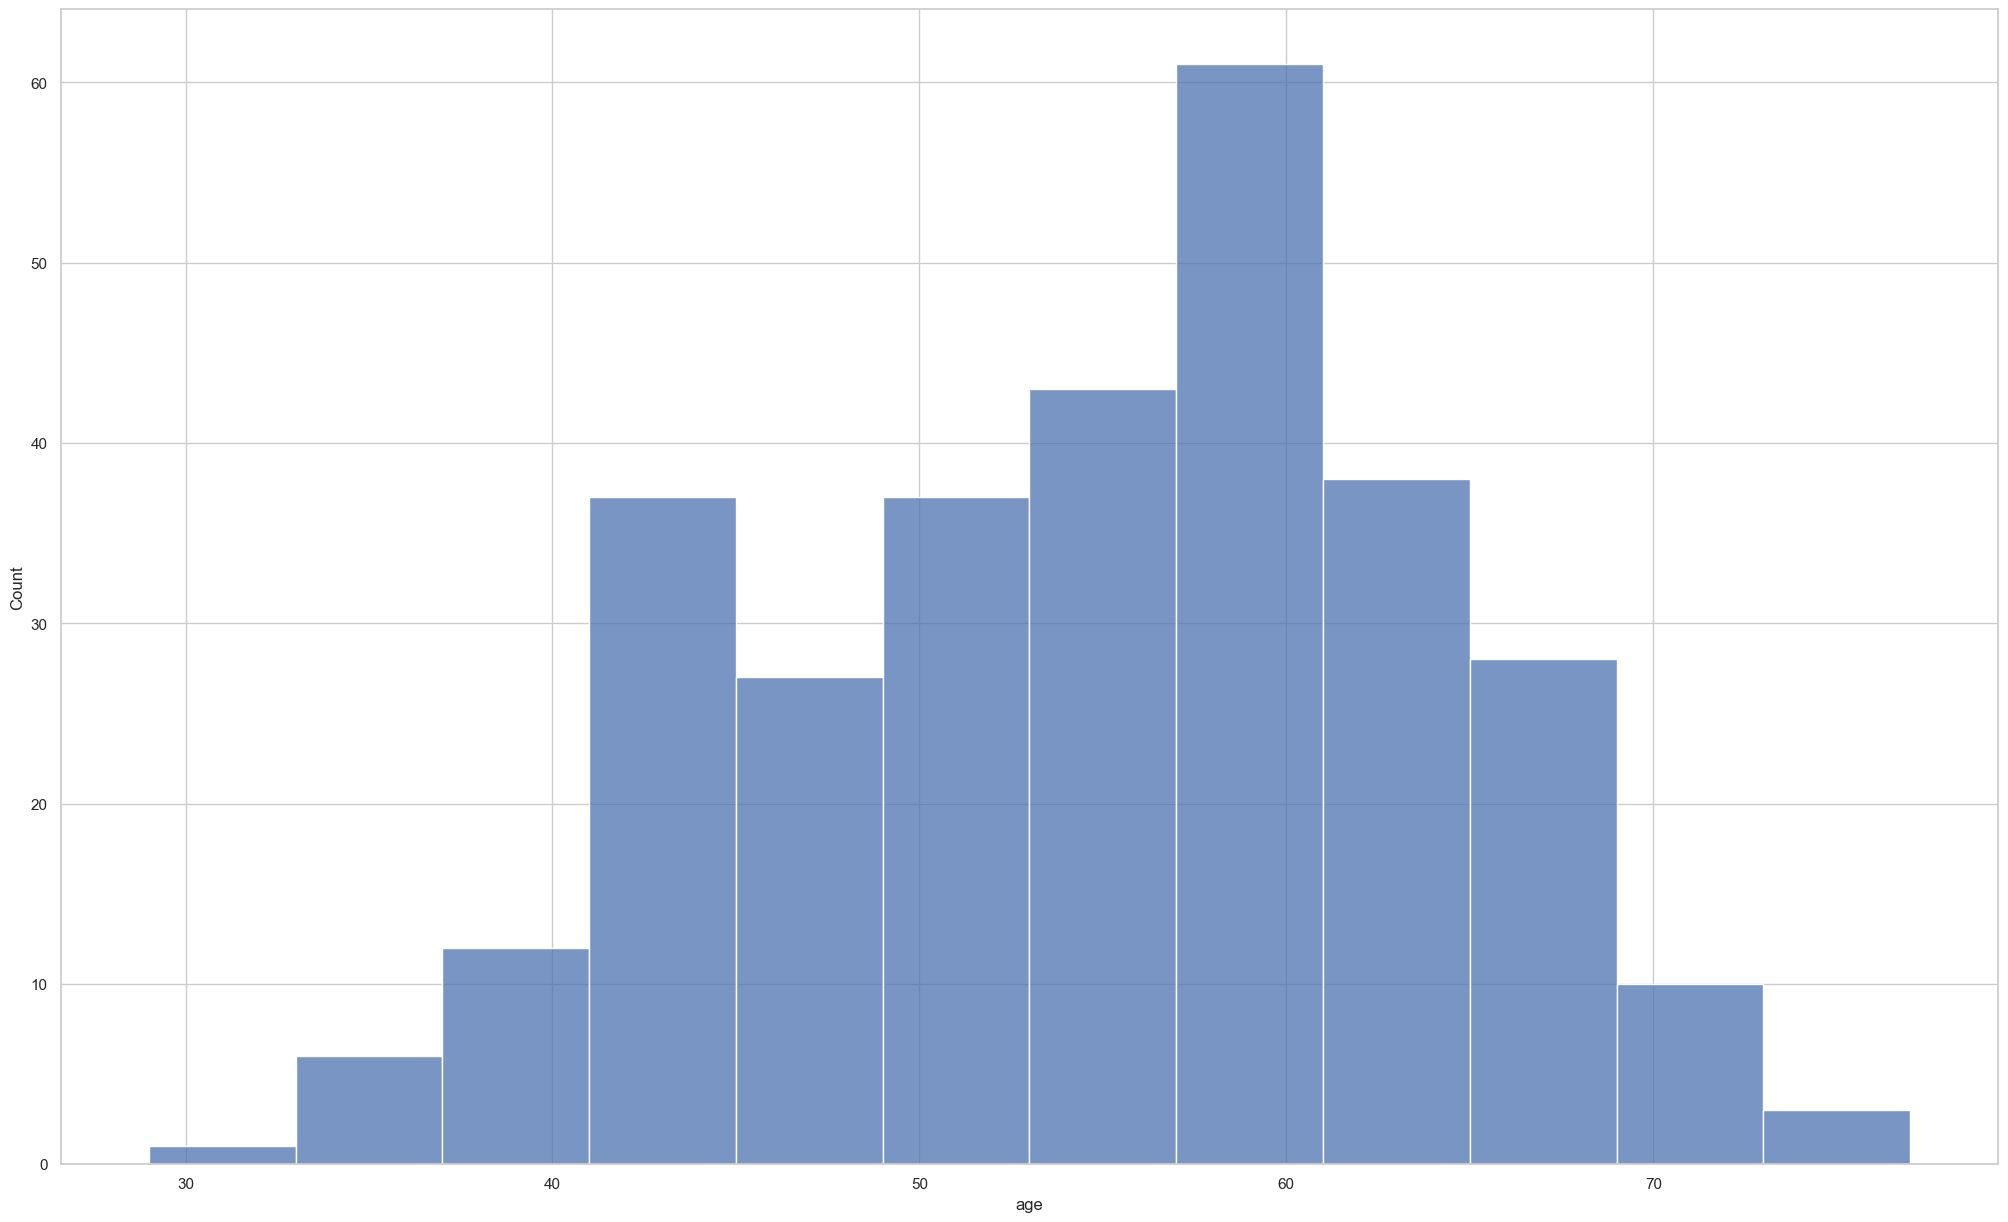

In [11]:

sns.histplot(x='age', data=heart_data)
plt.show()

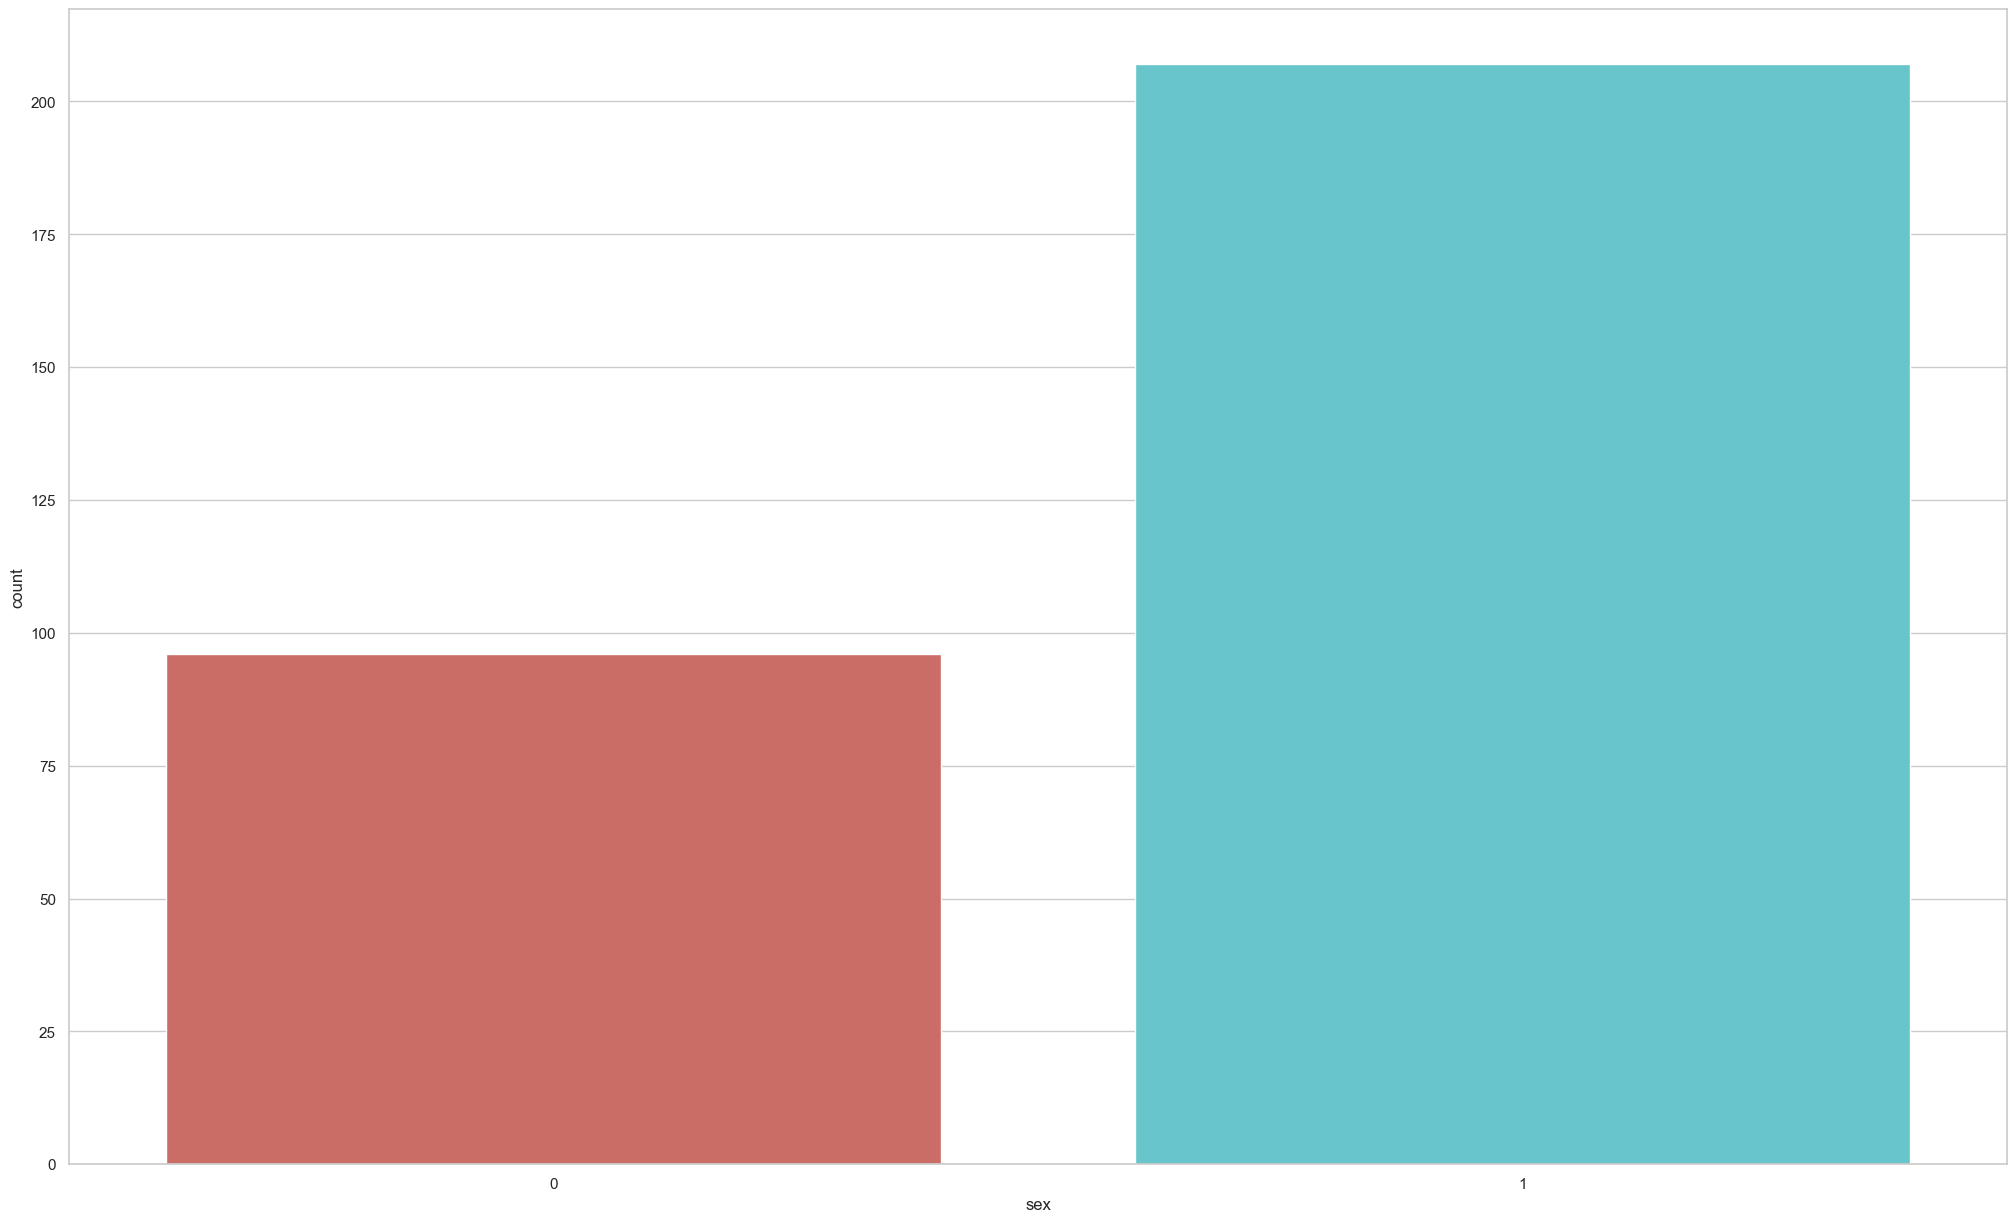

In [12]:

sns.countplot(x='sex',data=heart_data, palette= 'hls')
plt.show()

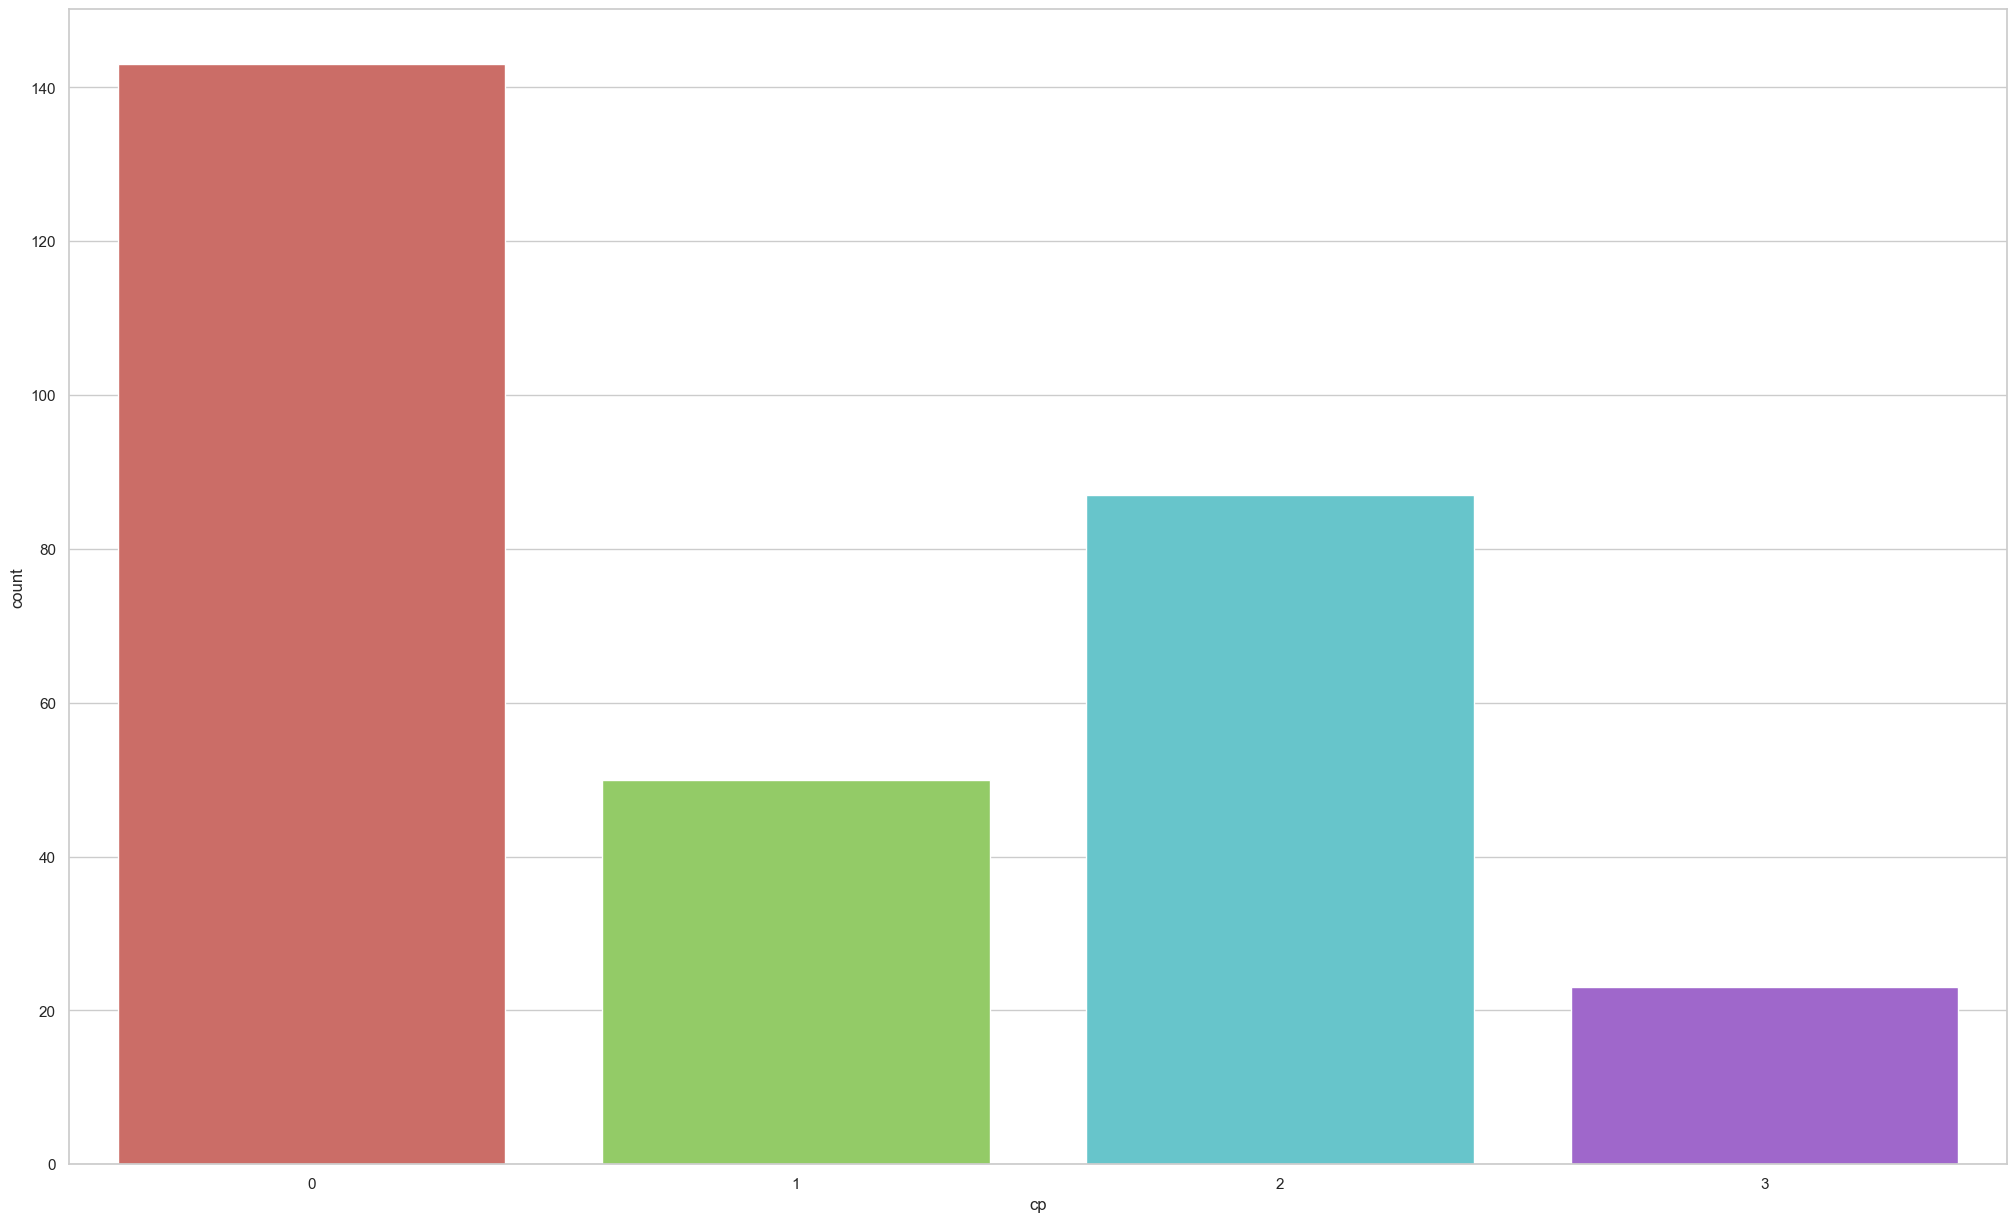

In [13]:

sns.countplot(x='cp',data=heart_data, palette= 'hls')
plt.show()

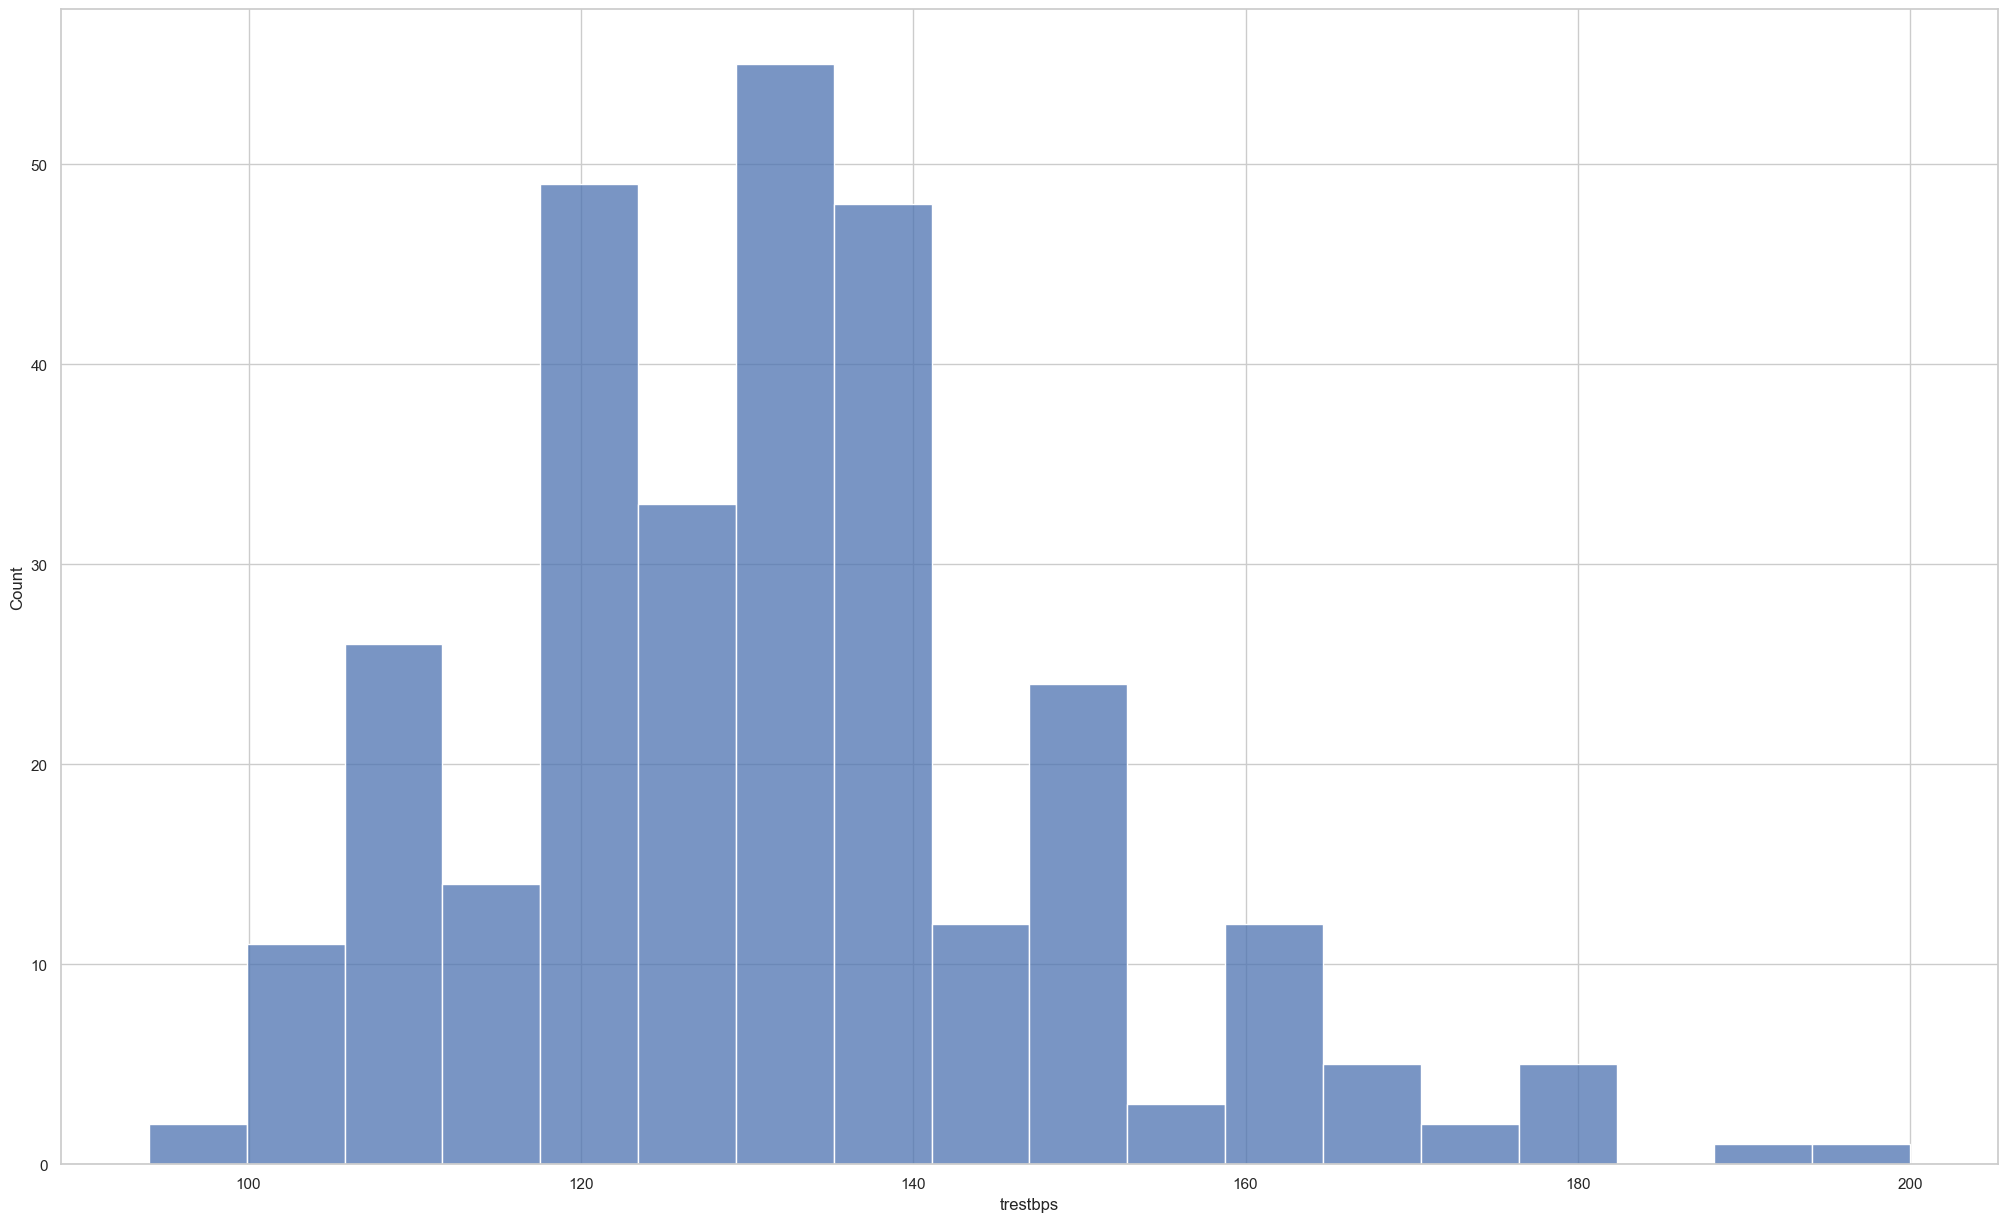

In [14]:

sns.histplot(x='trestbps', data=heart_data,palette='hls')
plt.show()

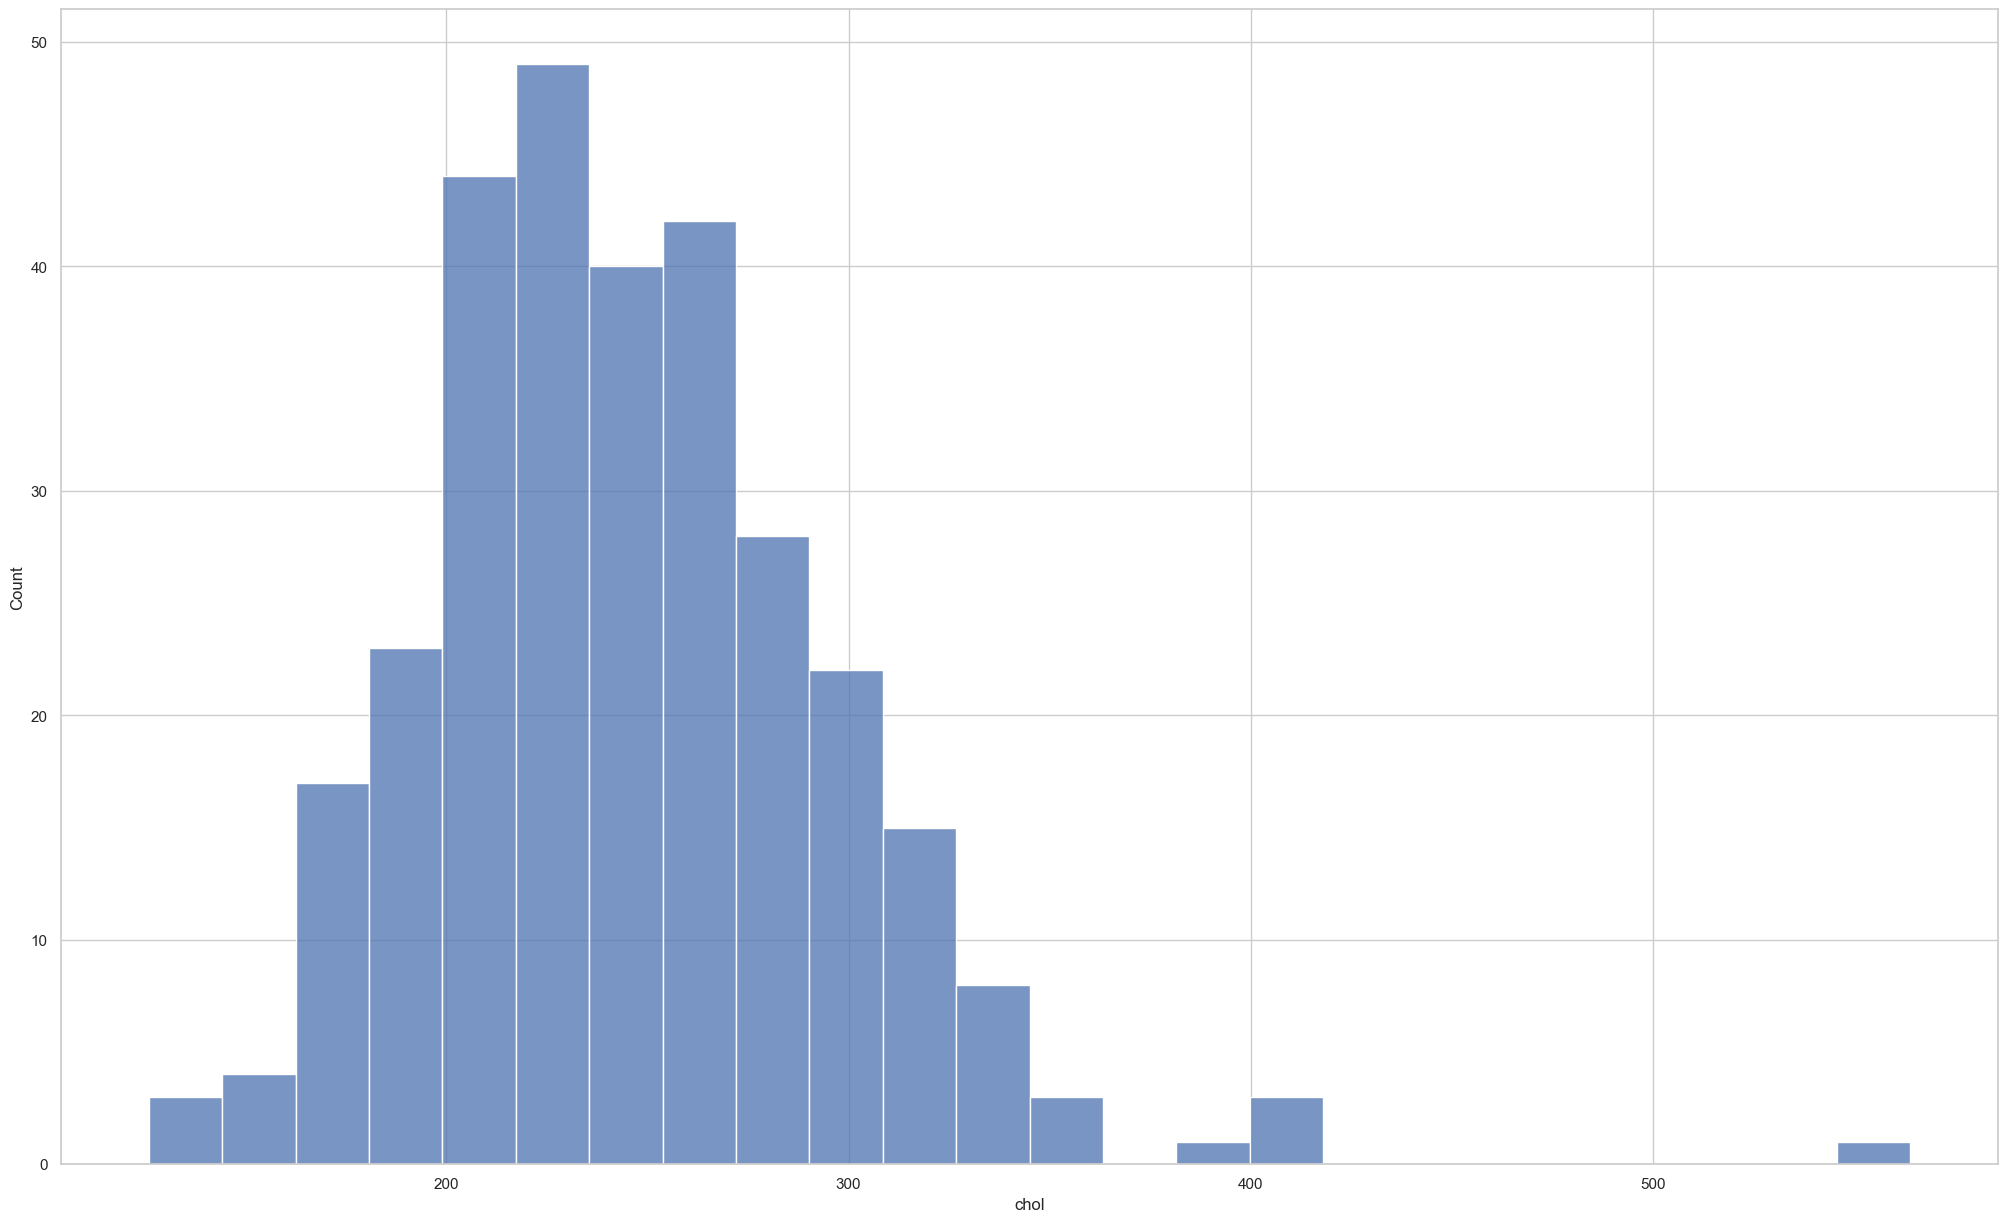

In [15]:

sns.histplot(x='chol', data=heart_data,palette='hls')
plt.show()

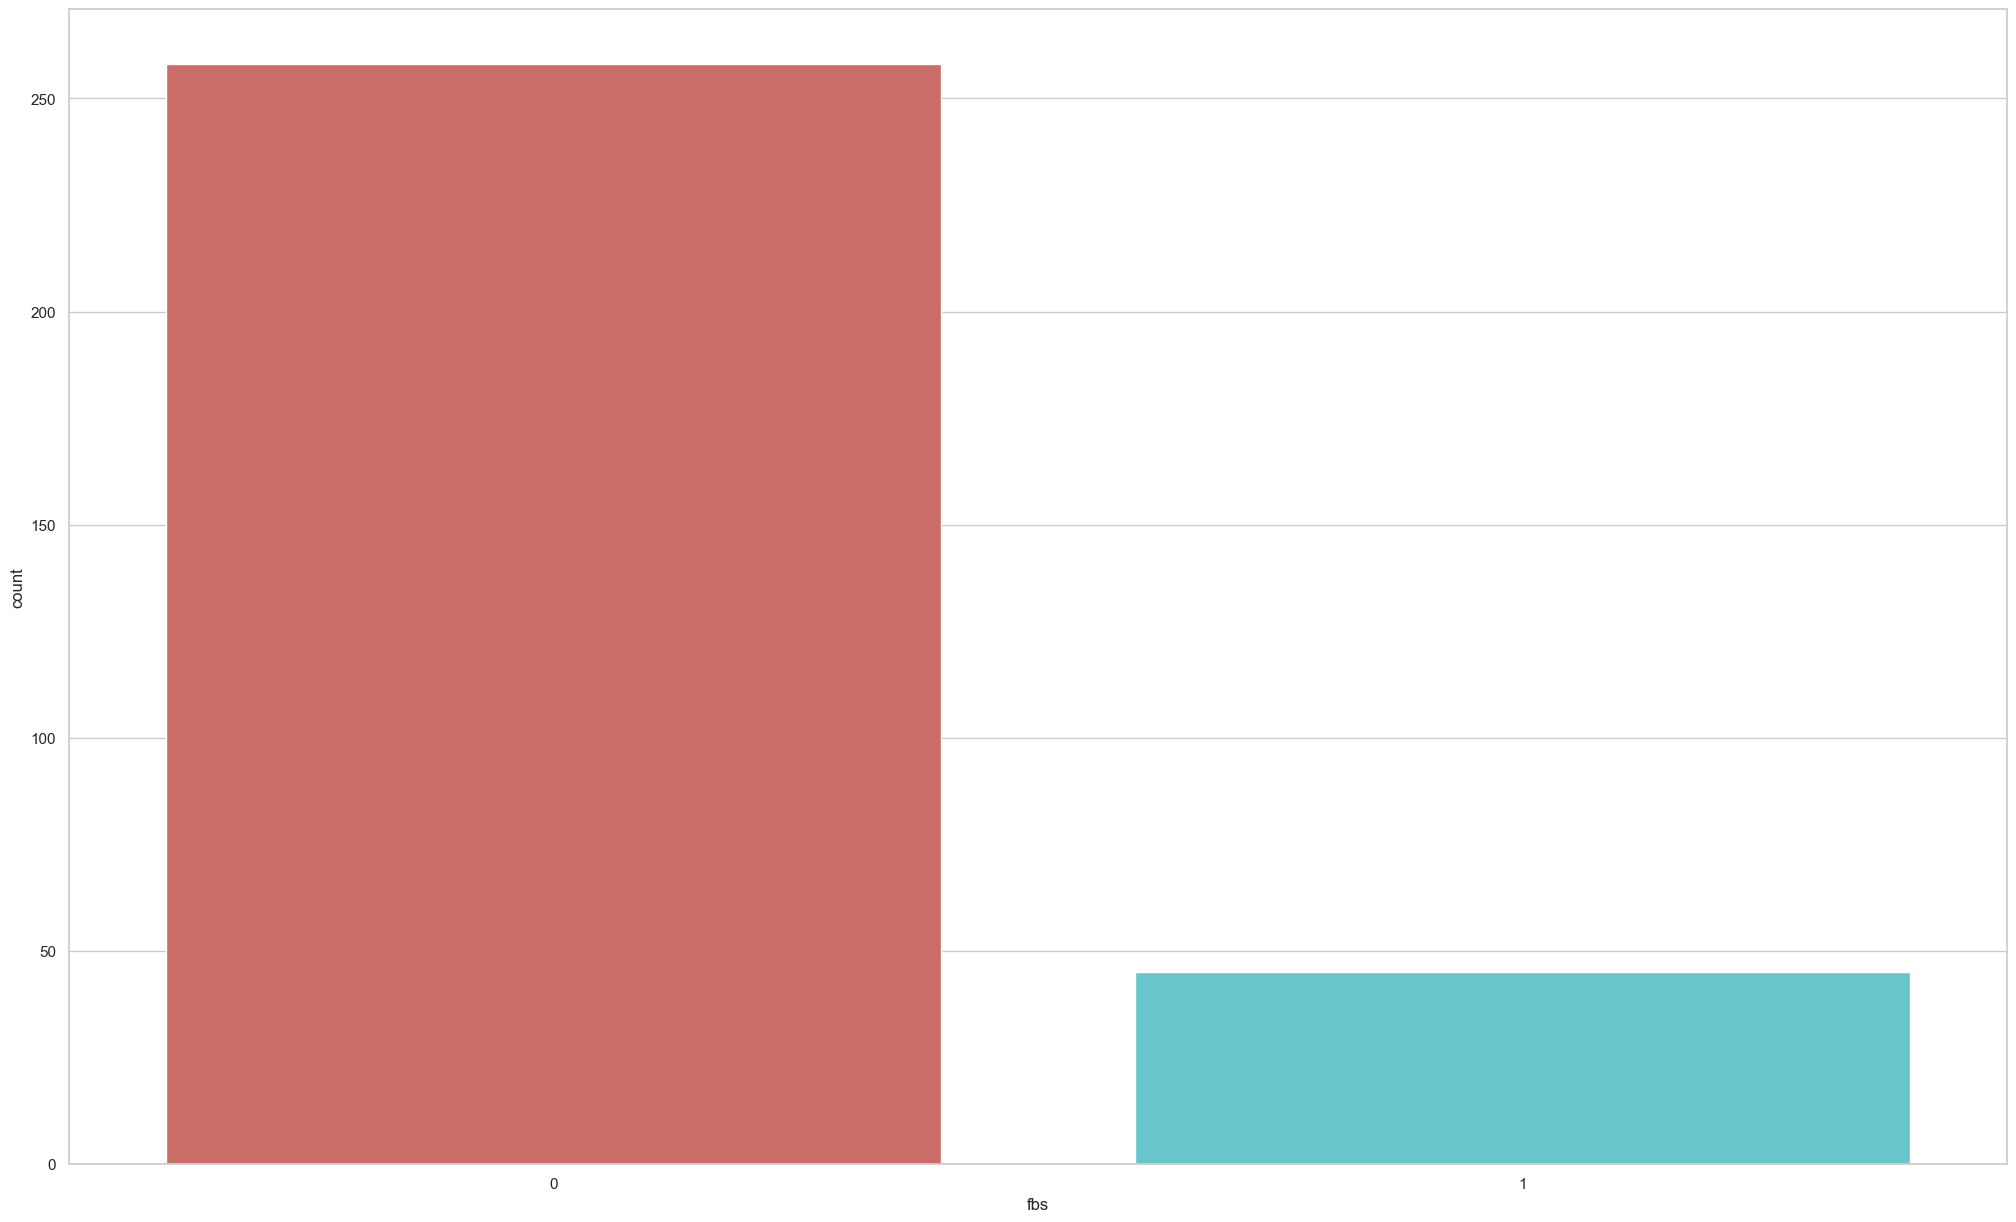

In [16]:

sns.countplot(x='fbs',data=heart_data, palette= 'hls')
plt.show()


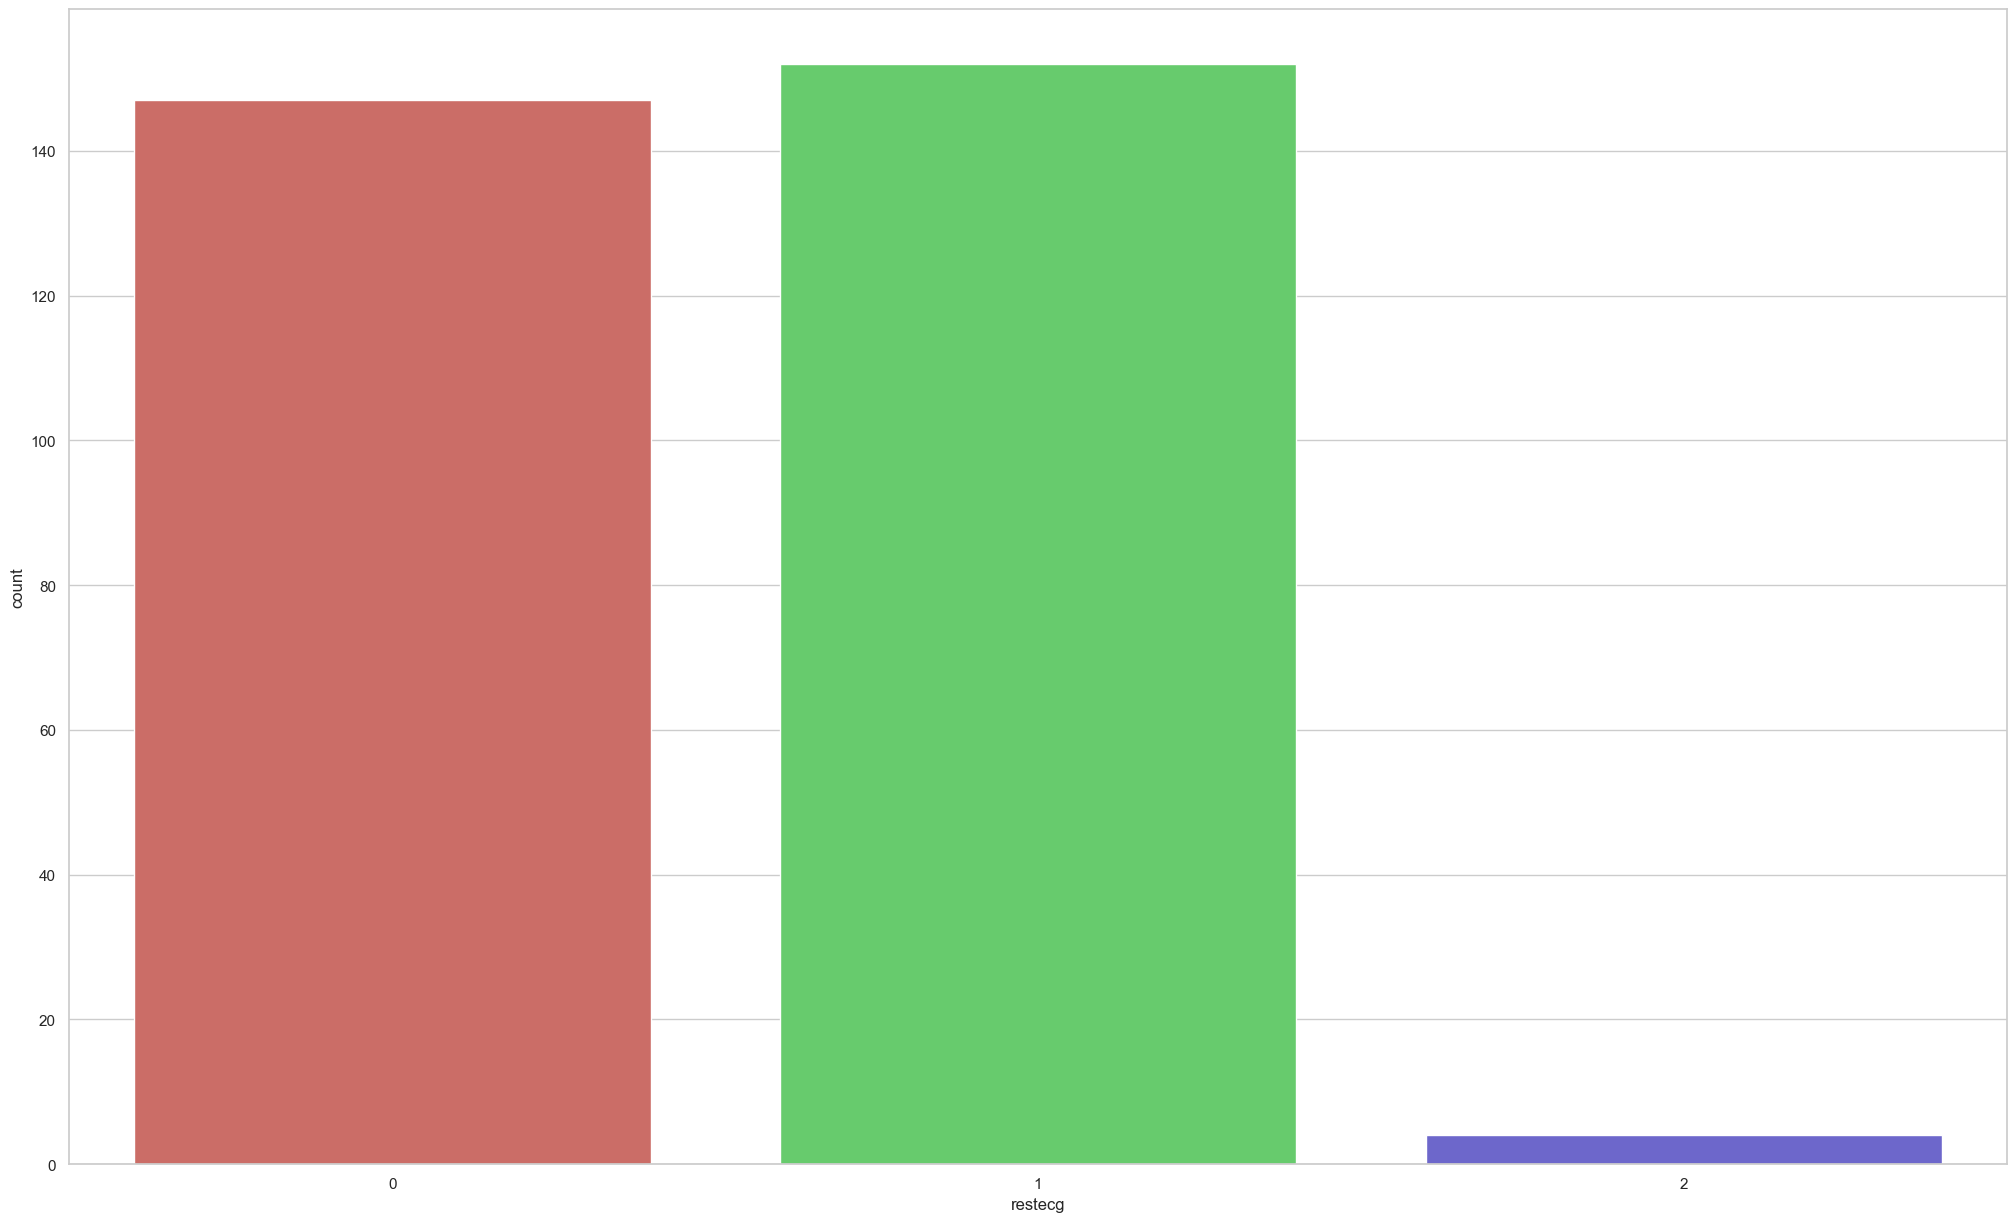

In [17]:
sns.countplot(x='restecg',data=heart_data, palette= 'hls')
plt.show()


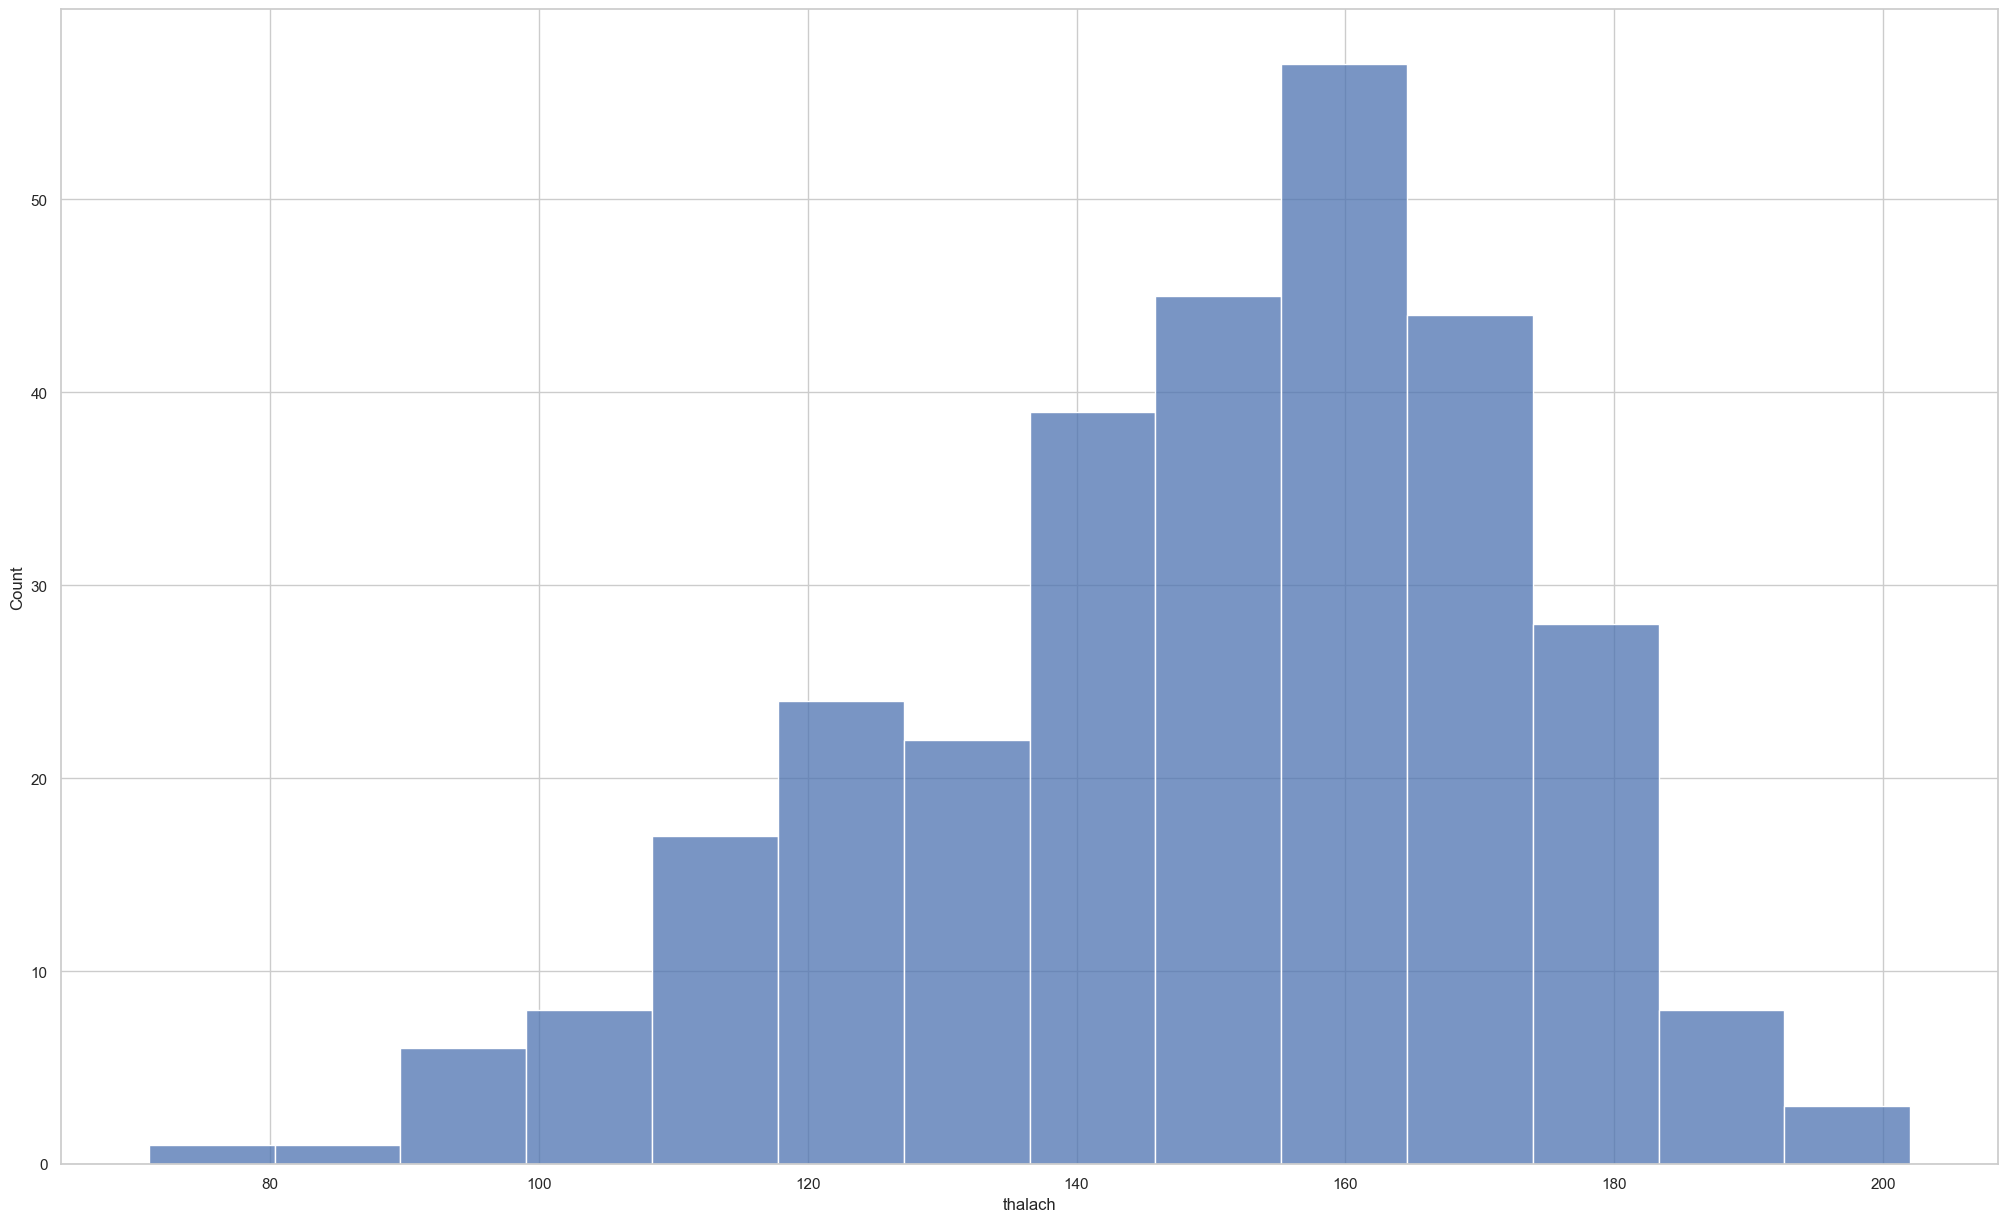

In [18]:
sns.histplot(x='thalach',data=heart_data, palette= 'hls')
plt.show()


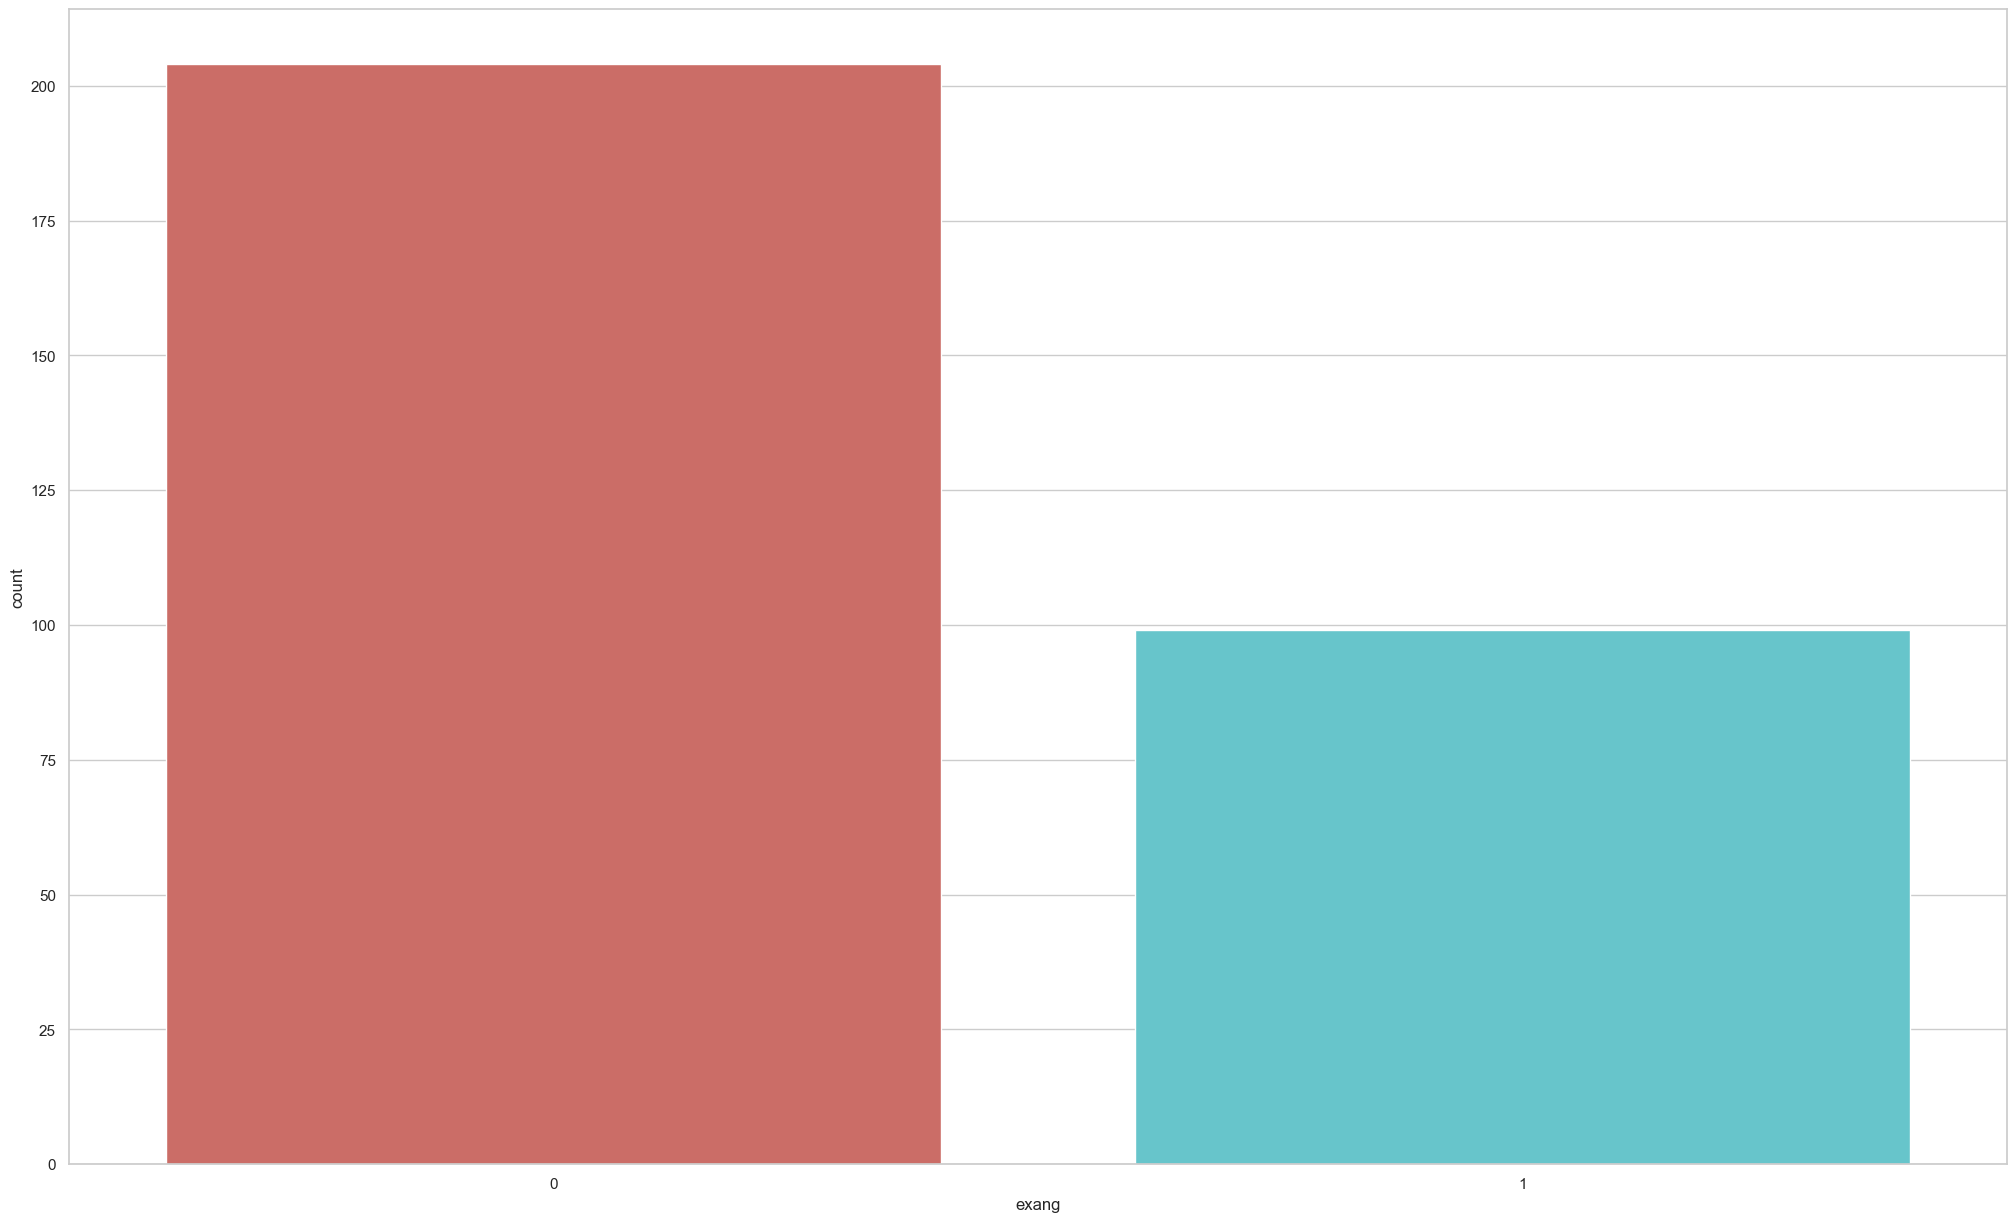

In [19]:
sns.countplot(x='exang',data=heart_data, palette= 'hls')
plt.show()


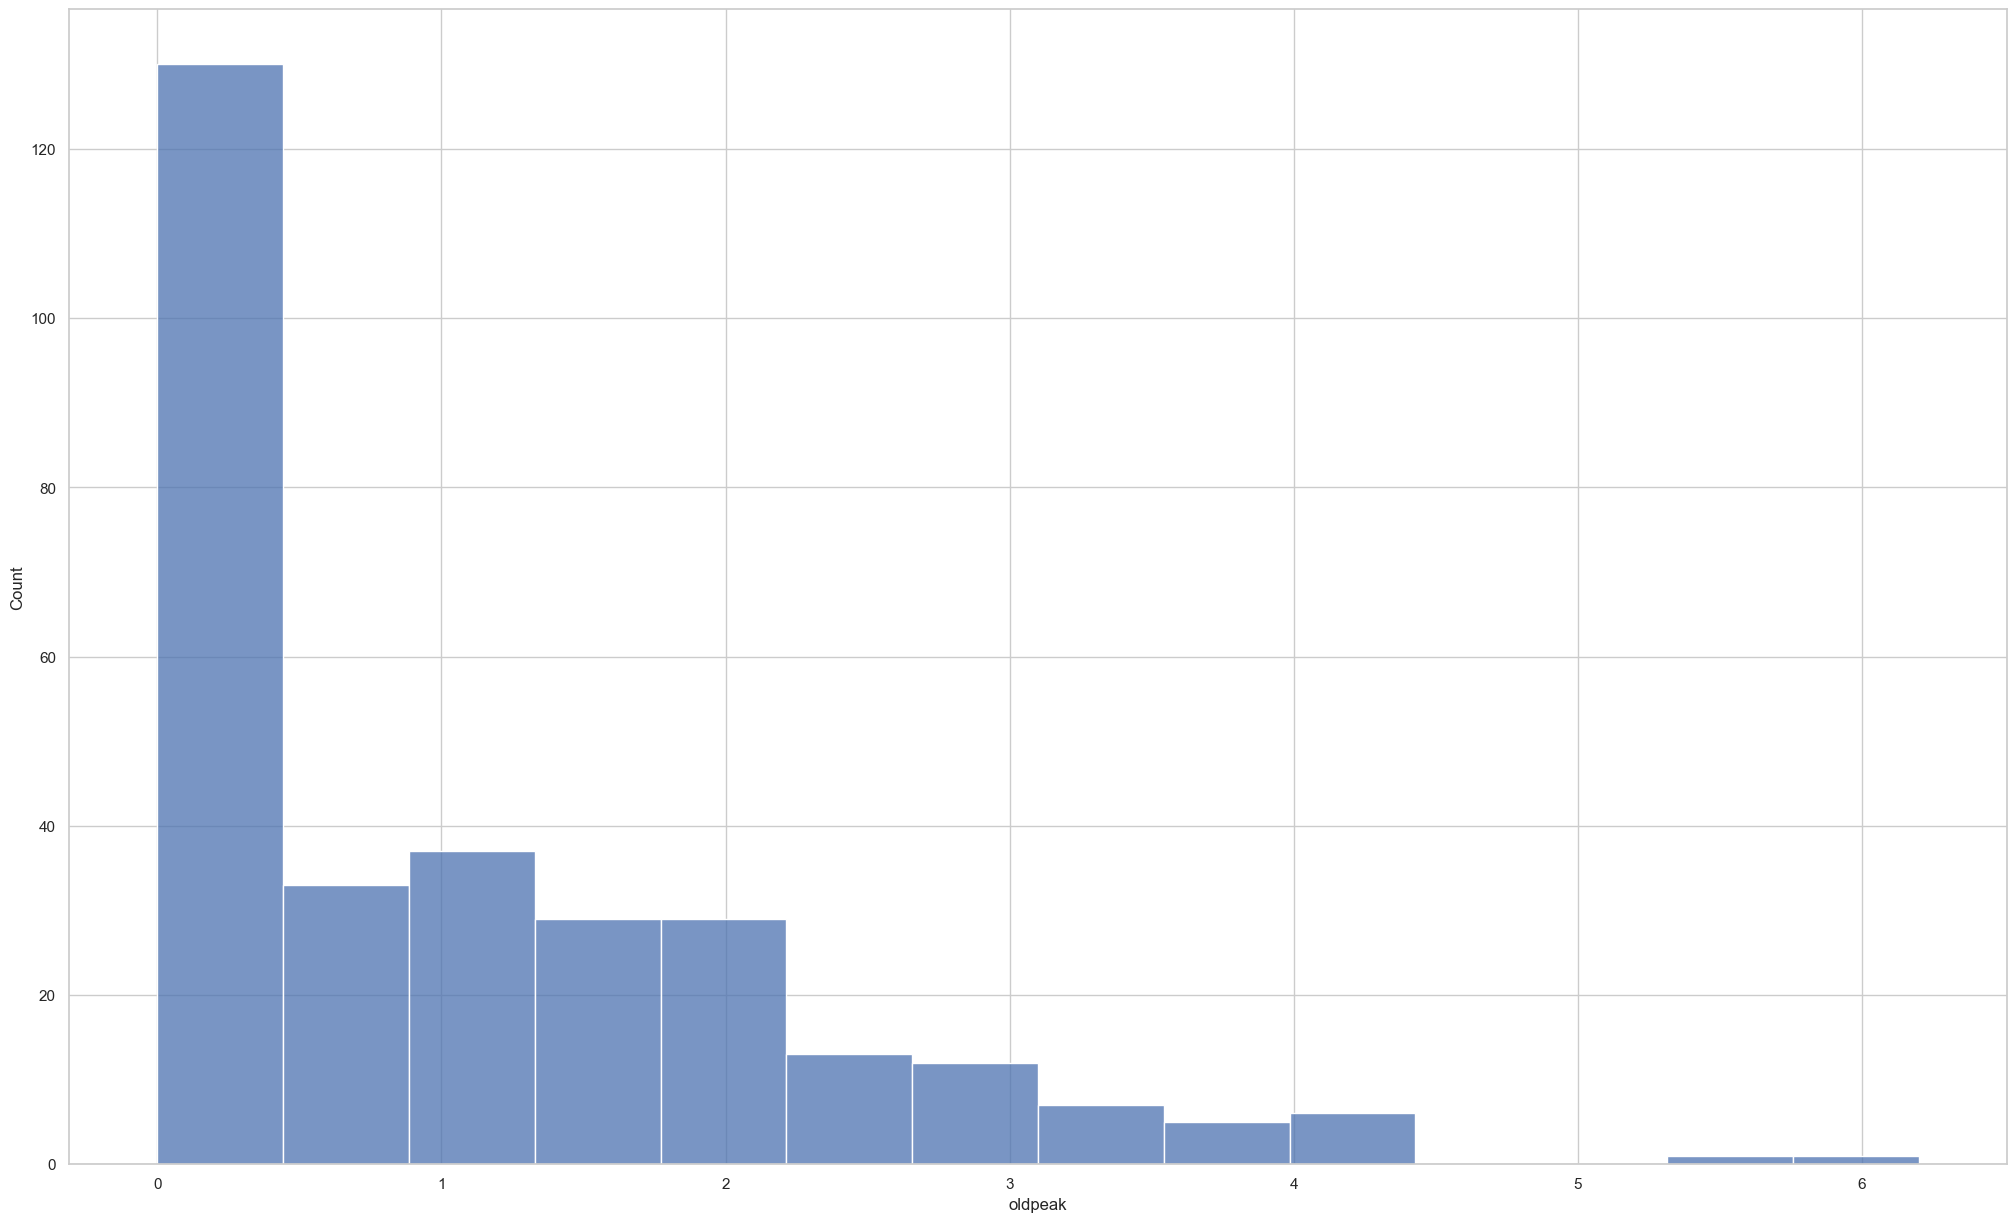

In [20]:
sns.histplot(x='oldpeak',data=heart_data, palette= 'hls')
plt.show()


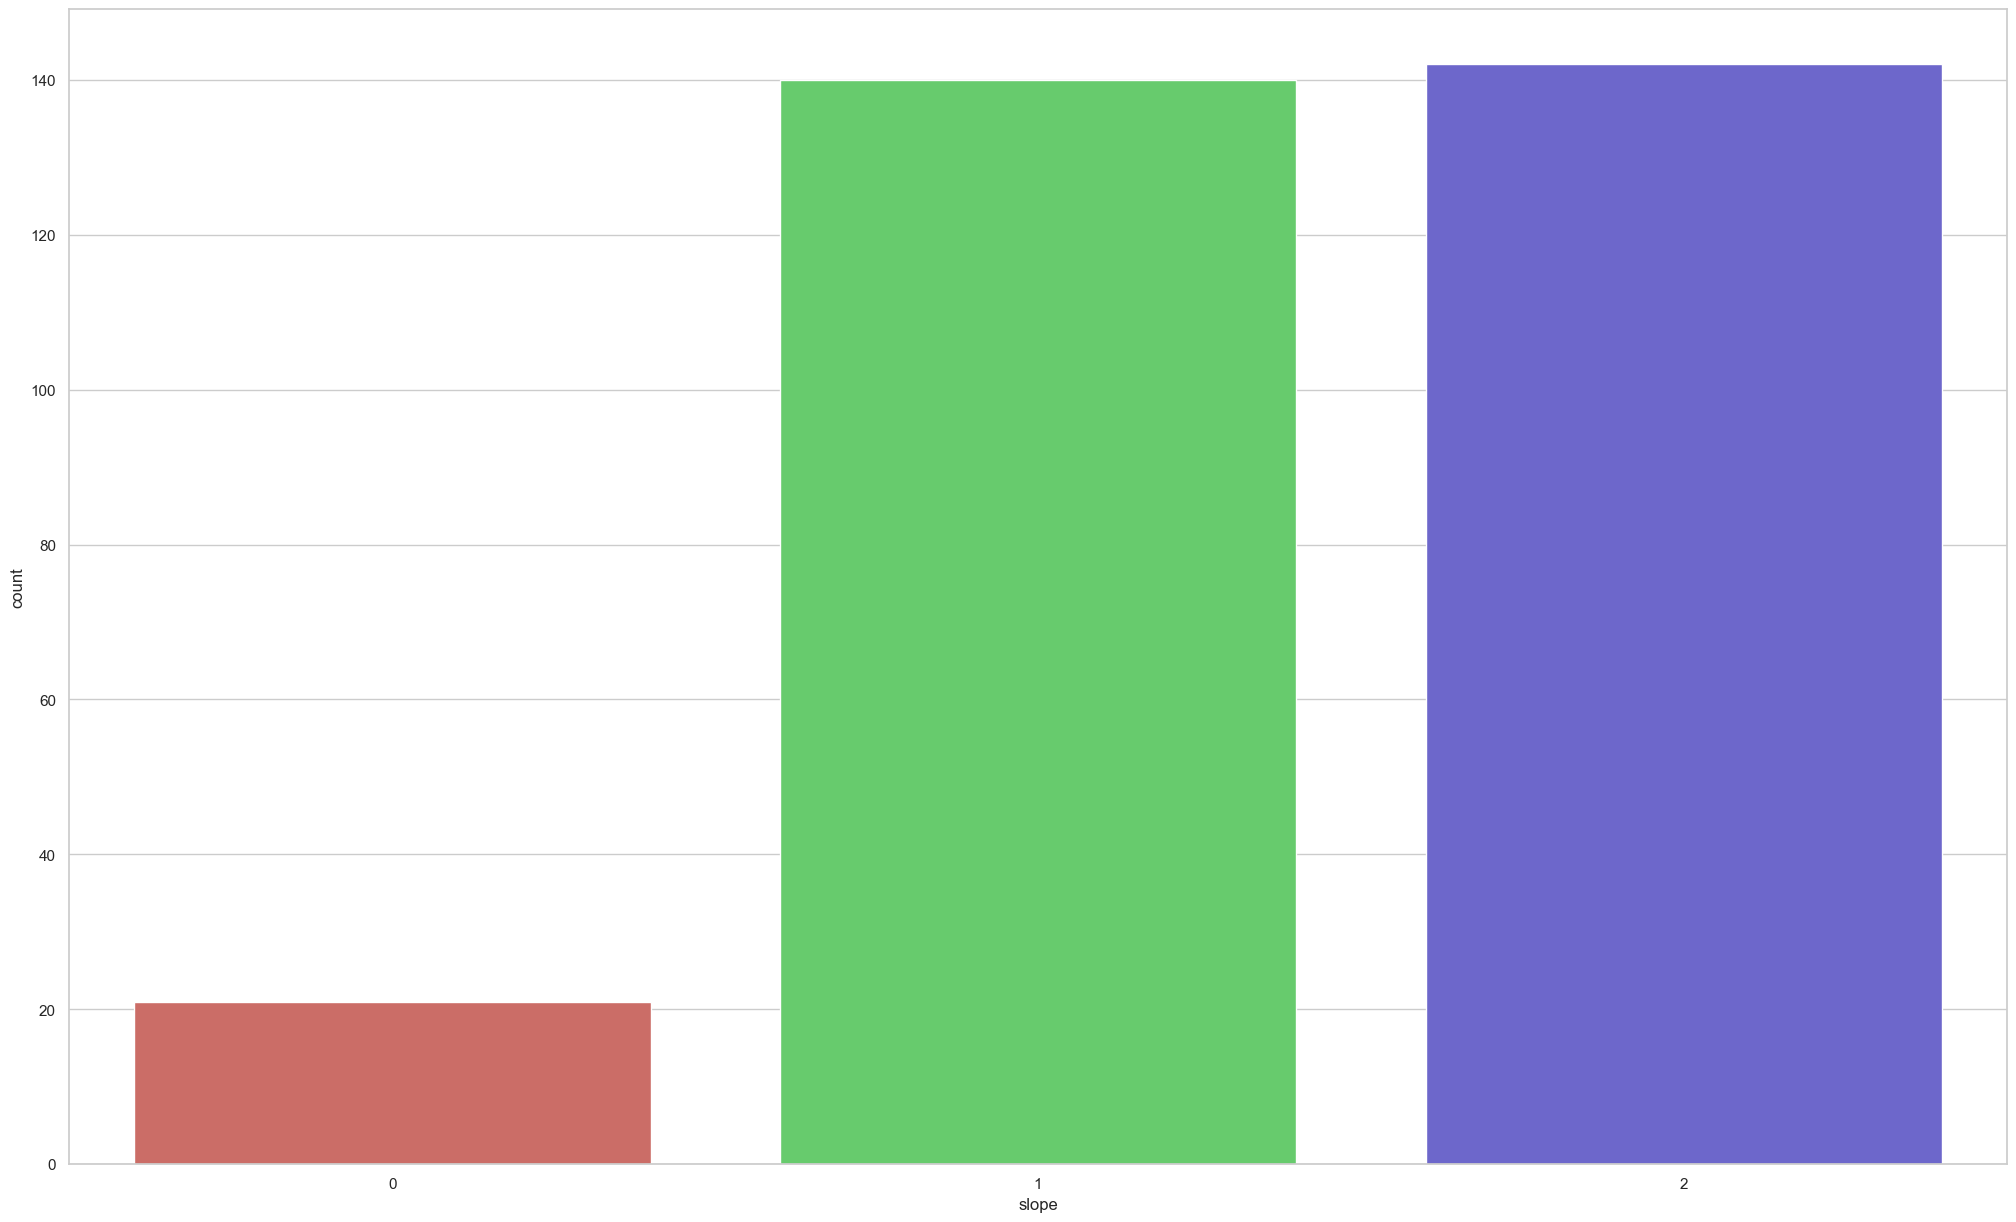

In [21]:
sns.countplot(x='slope',data=heart_data, palette= 'hls')
plt.show()


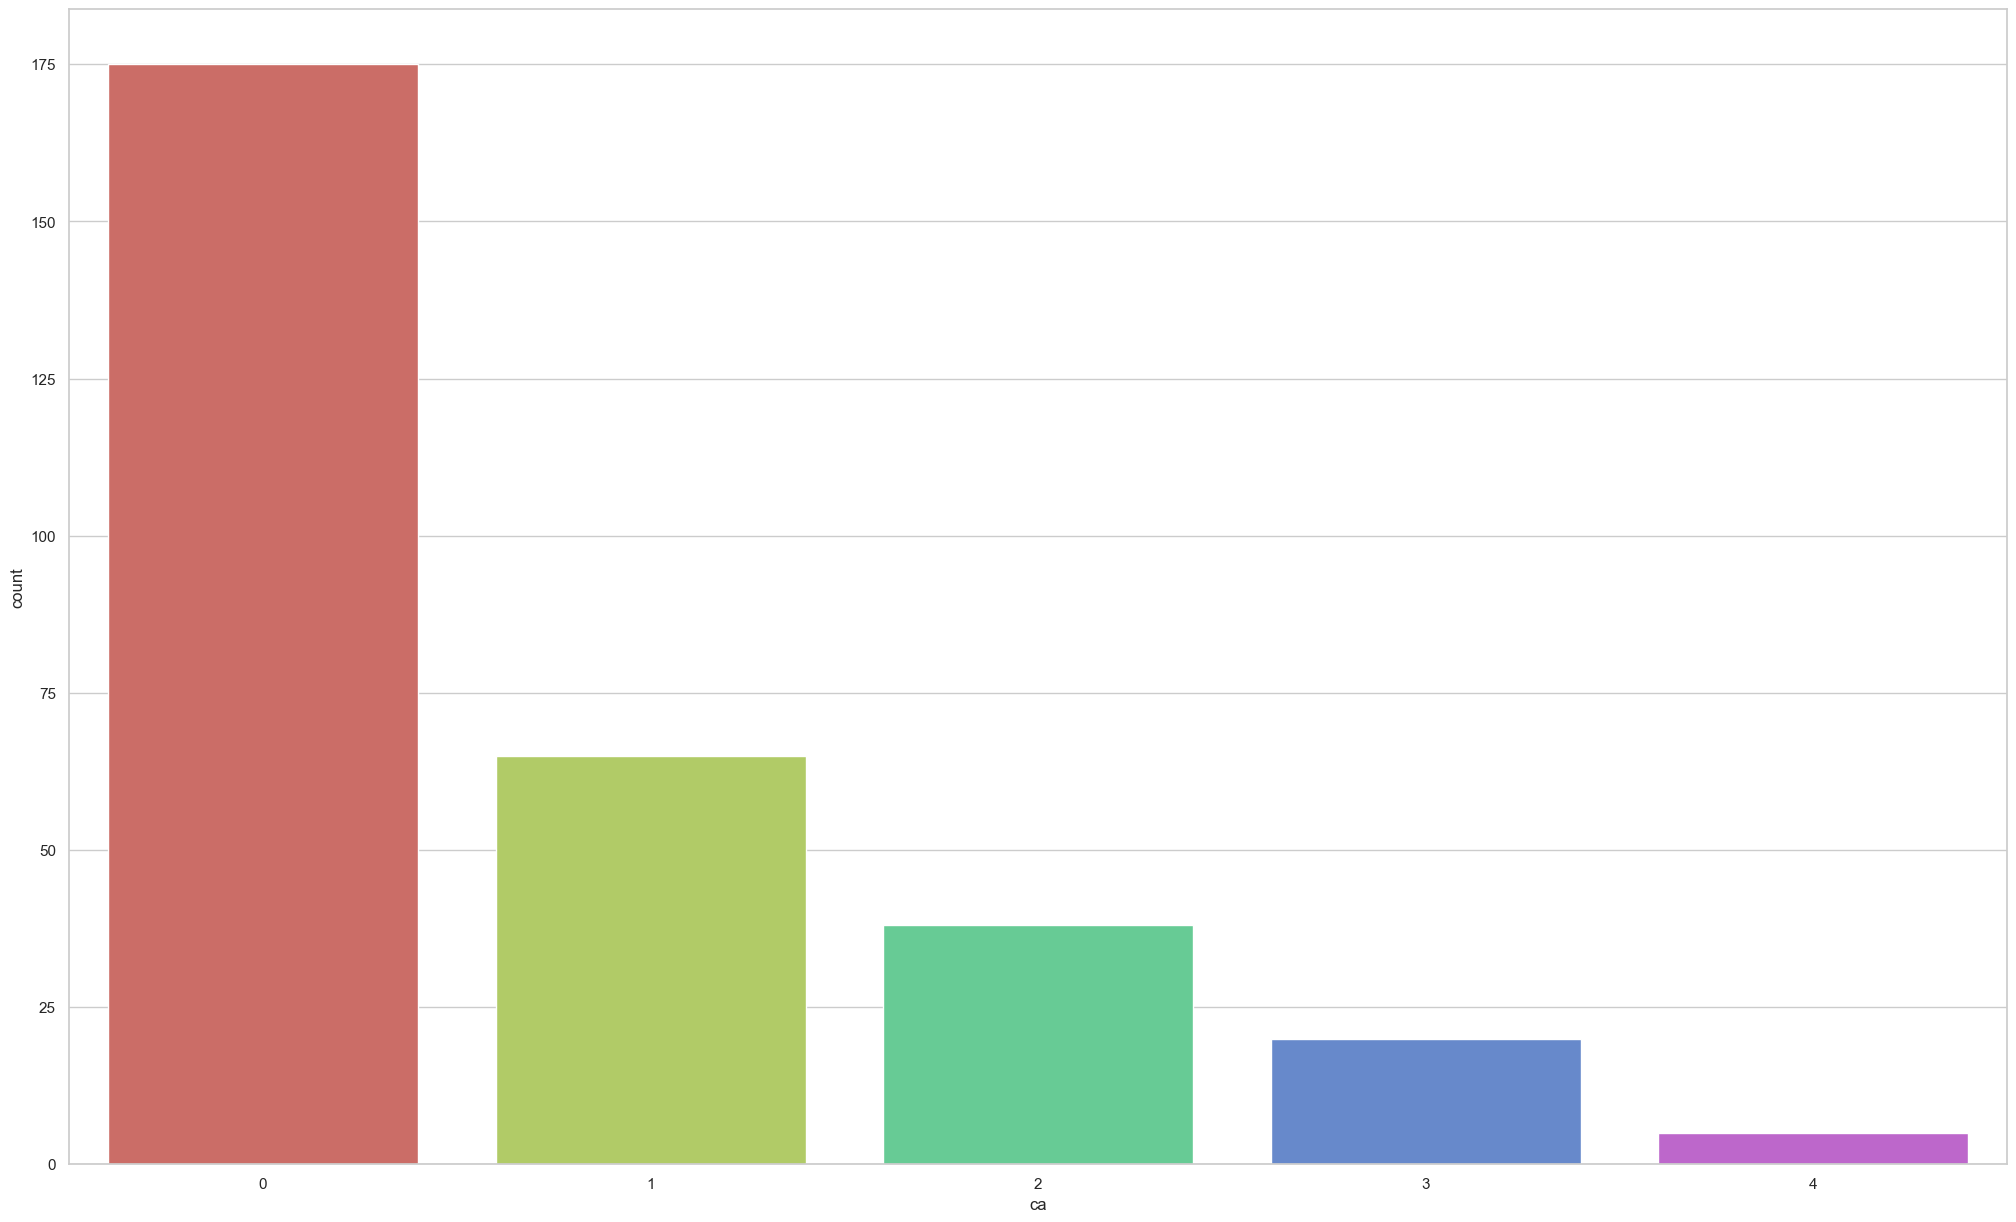

In [22]:
sns.countplot(x='ca',data=heart_data, palette= 'hls')
plt.show()


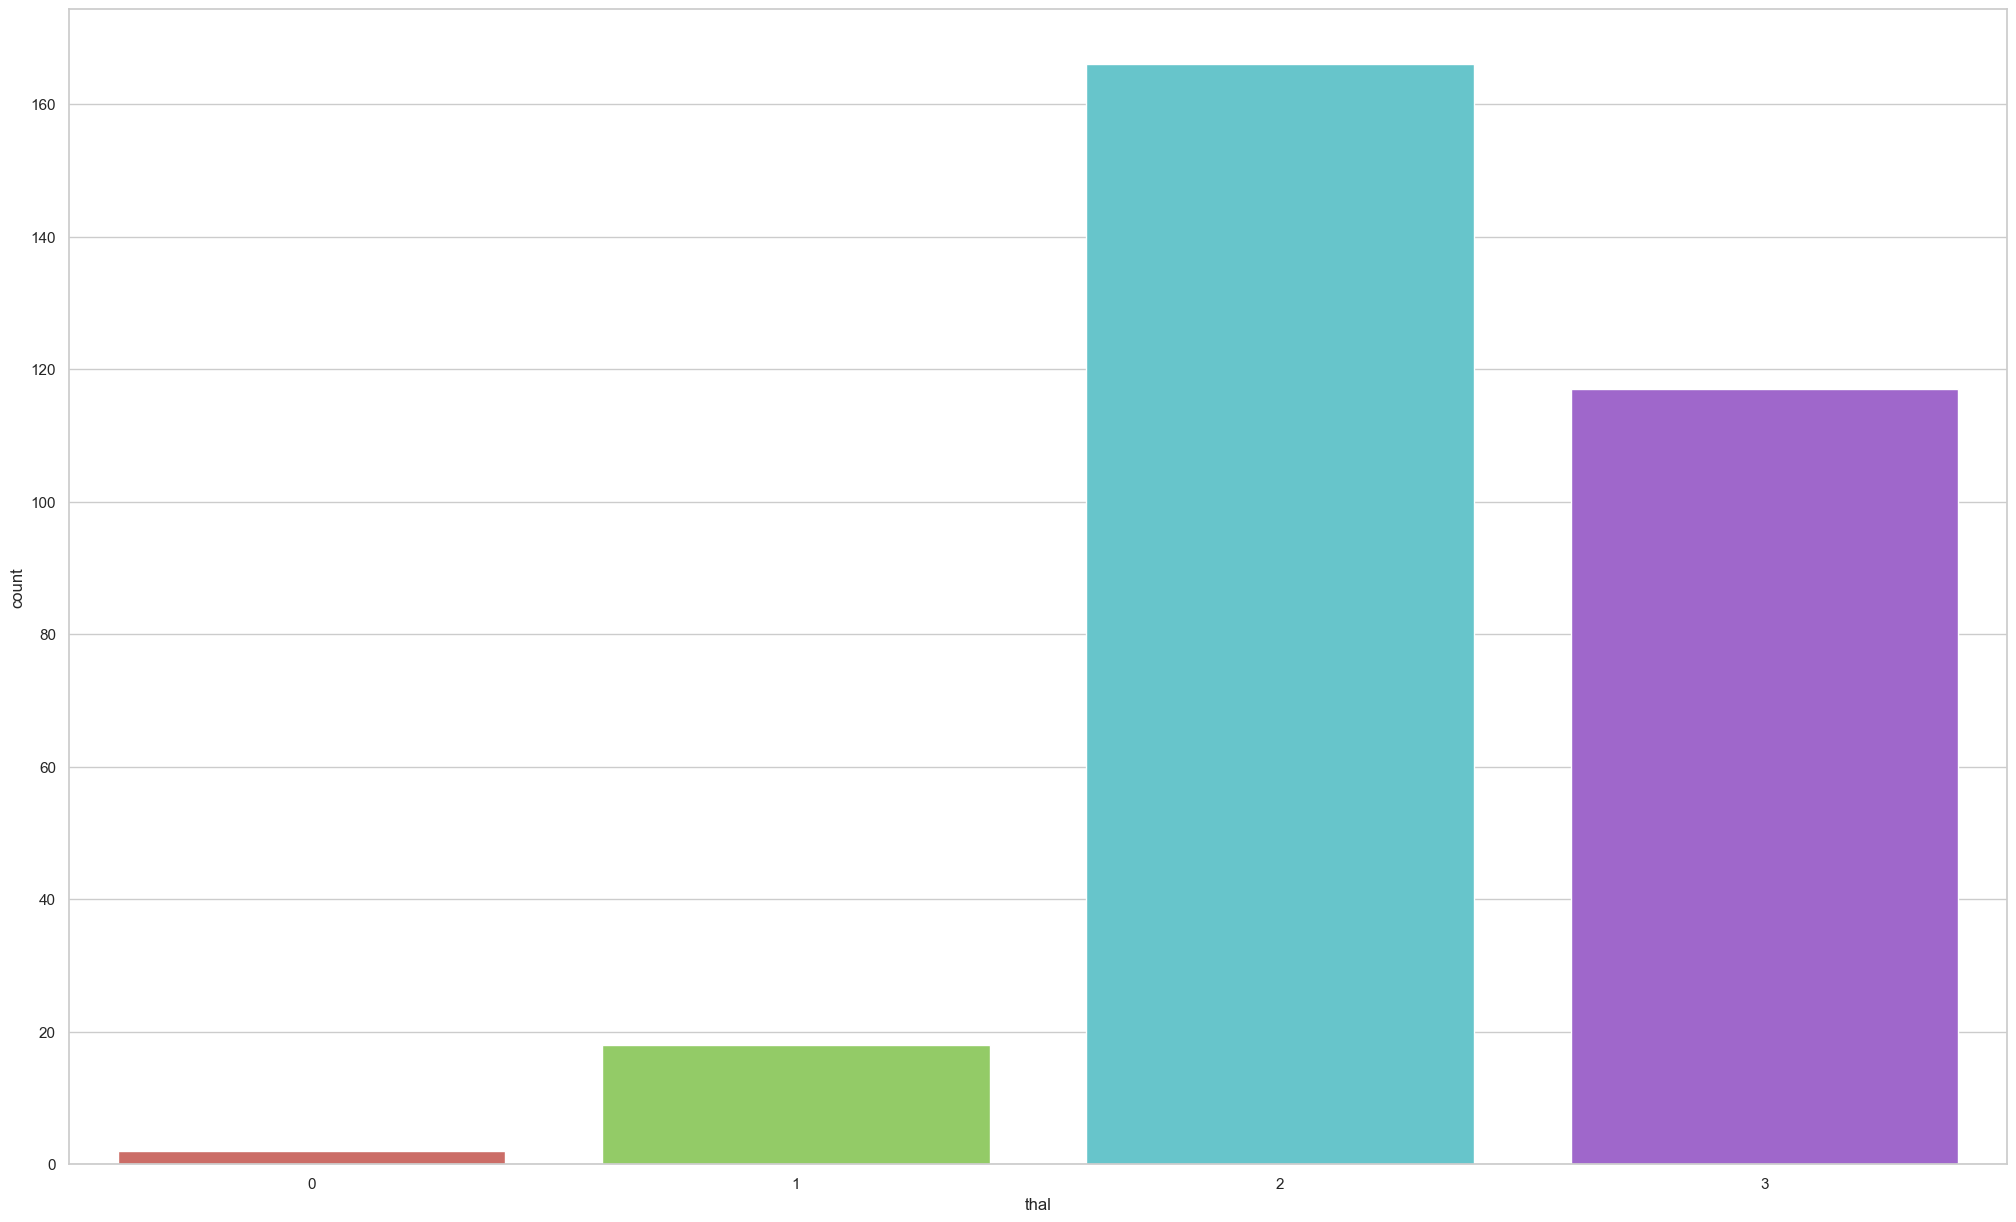

In [23]:
sns.countplot(x='thal',data=heart_data, palette= 'hls')
plt.show()


**Distribution of dependent variable.**

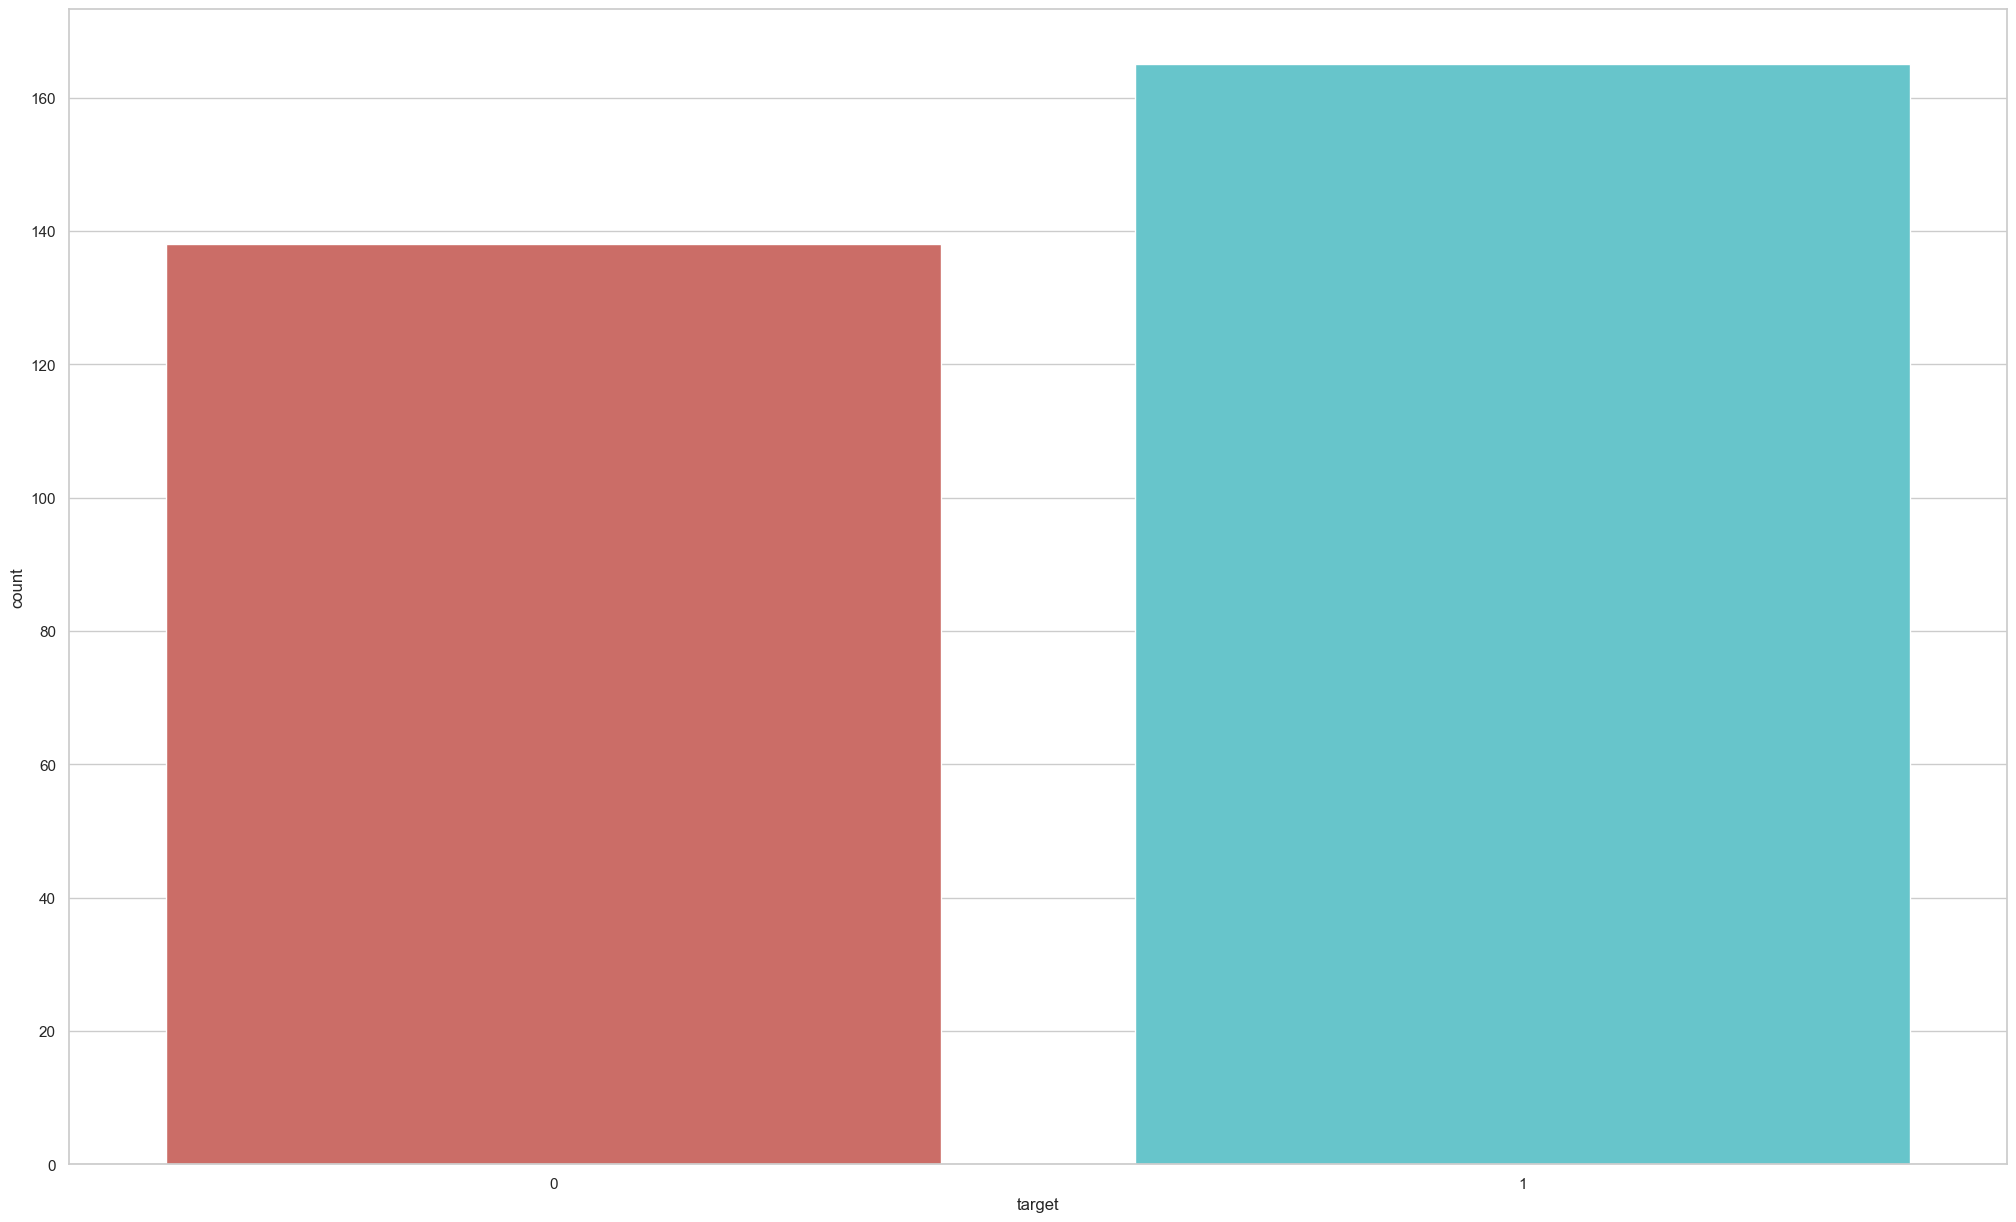

In [24]:
sns.countplot(x='target',data=heart_data, palette= 'hls')
plt.show()


### BIVARIATE ANALYSIS

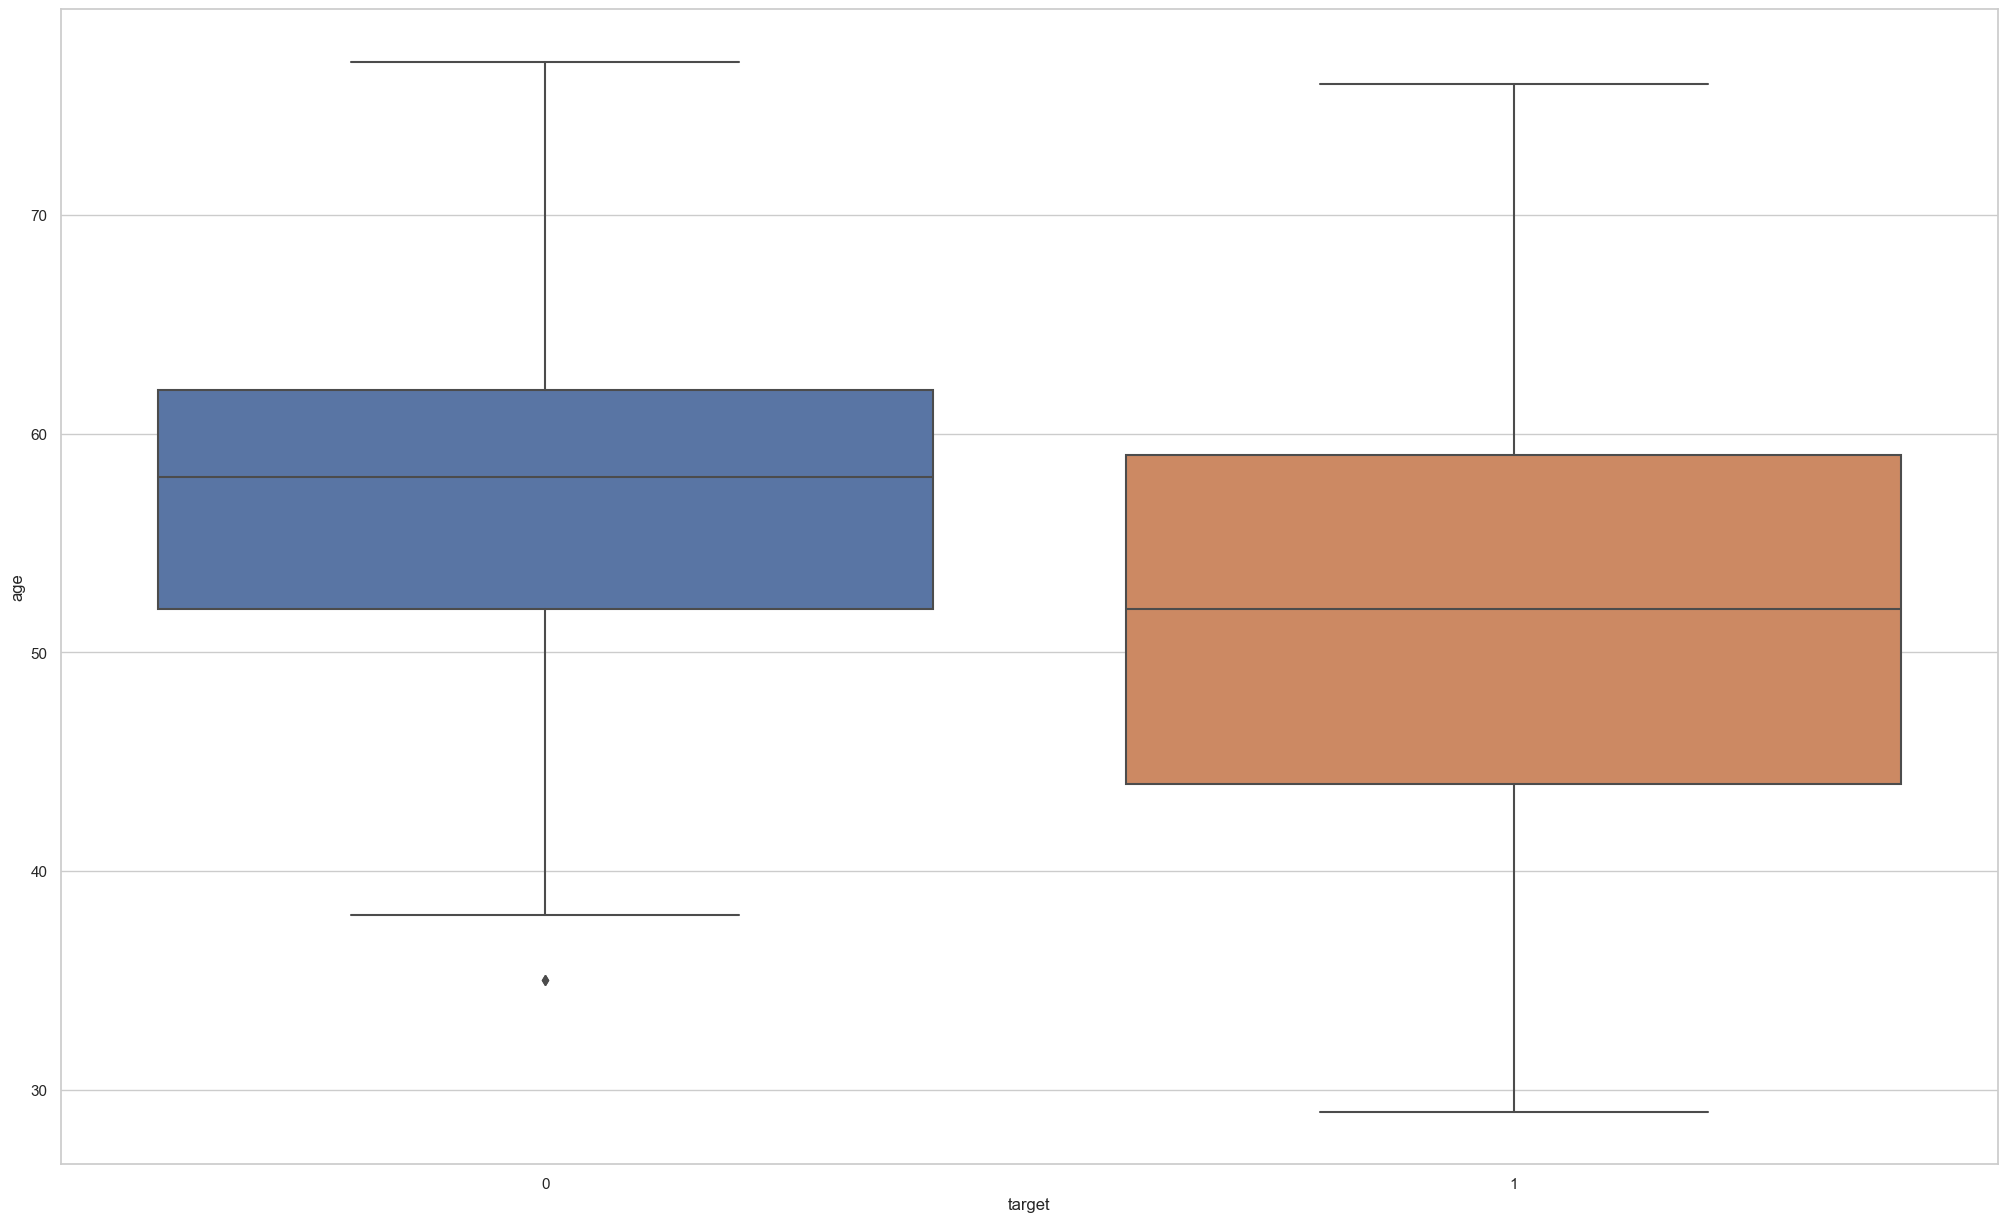

In [25]:
sns.boxplot(data=heart_data,x='target',y='age')
plt.show()

Text(0, 0.5, 'count')

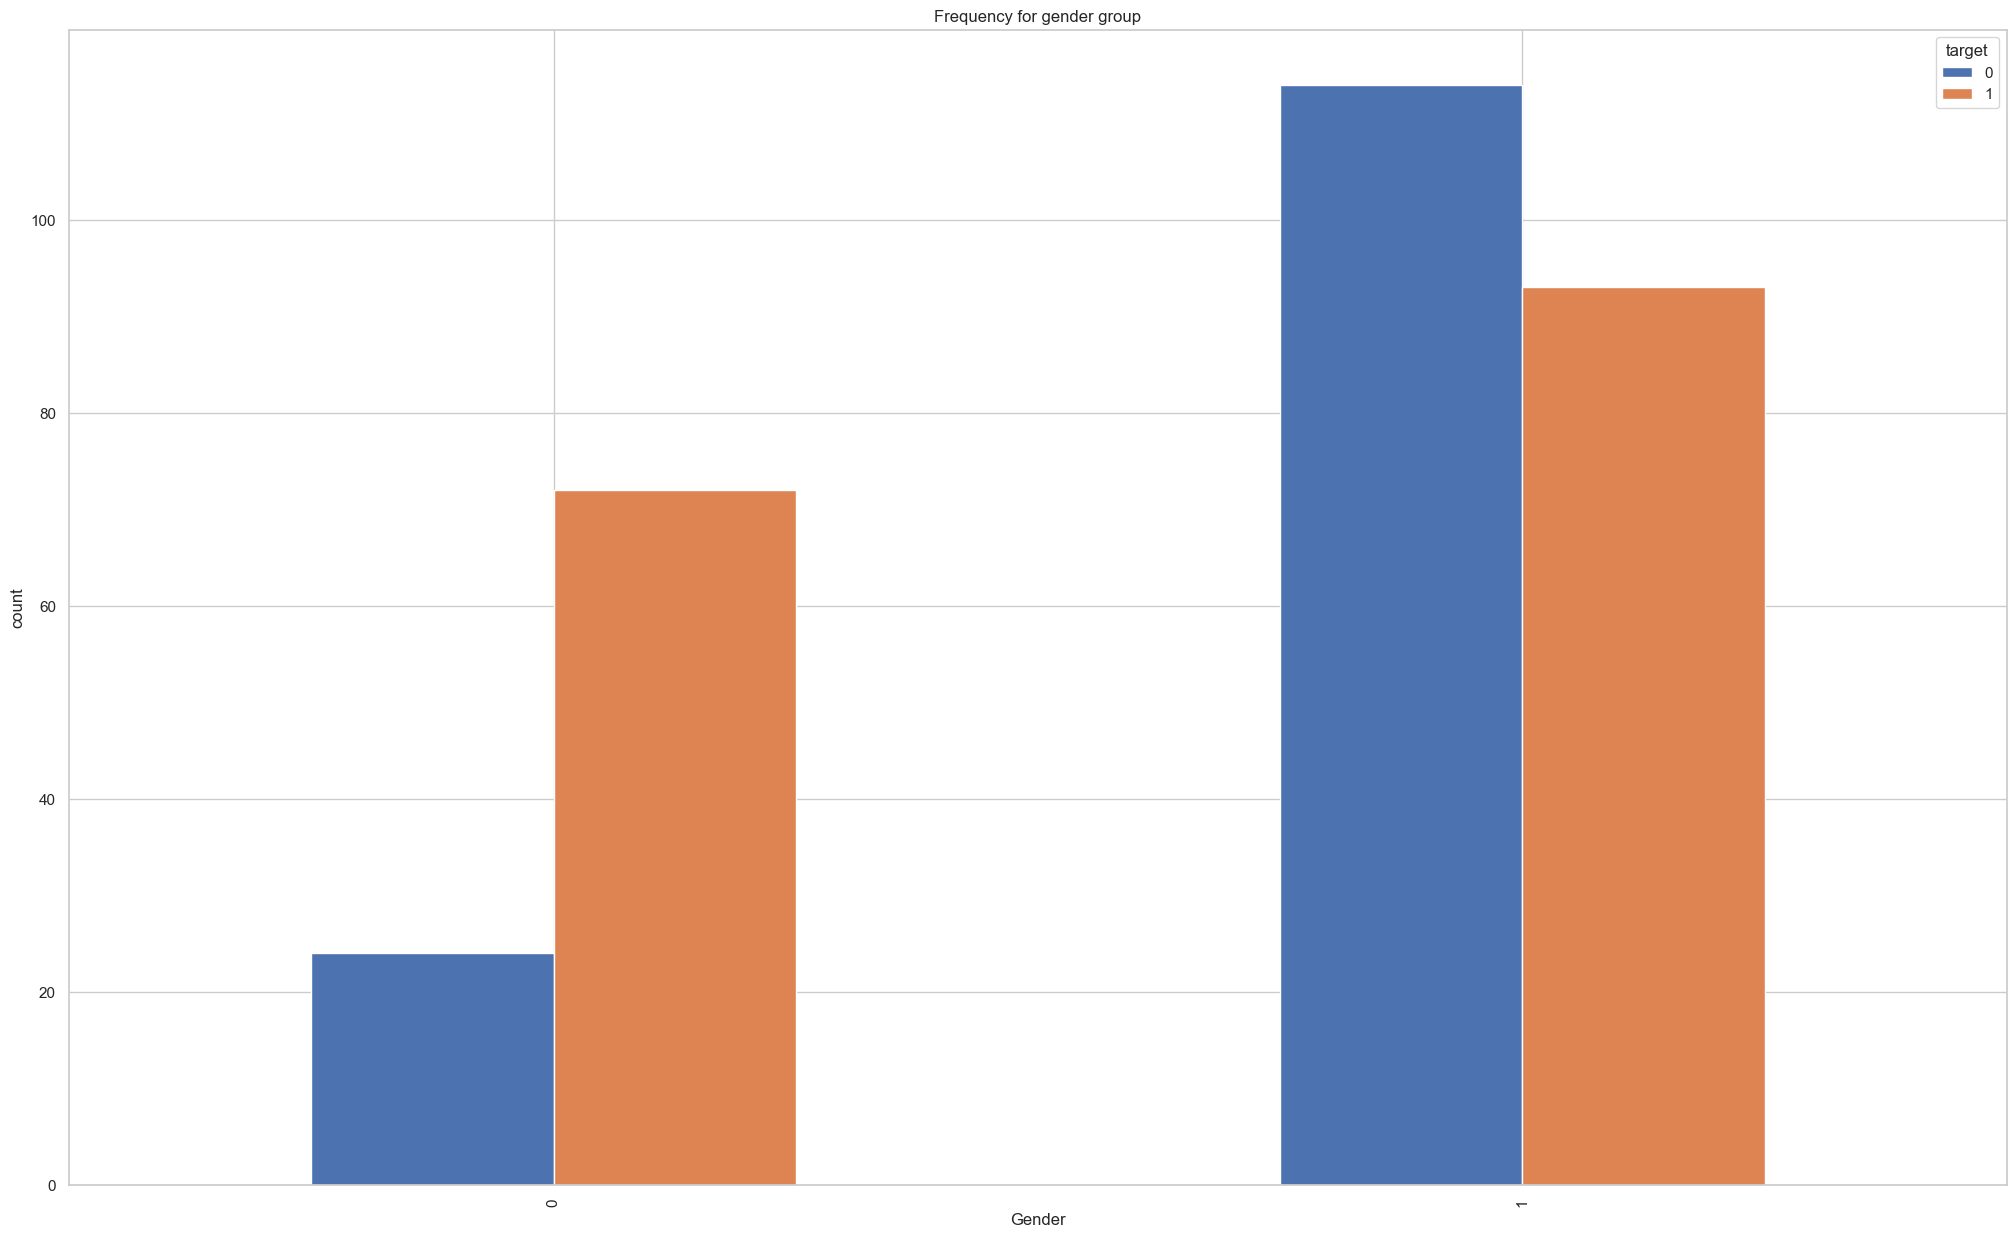

In [26]:
# %matplotlib inline
pd.crosstab(heart_data.sex, heart_data.target).plot(kind='bar')
plt.title('Frequency for gender group')
plt.xlabel('Gender')
plt.ylabel('count')
# plt.savefig('gender_frequency')

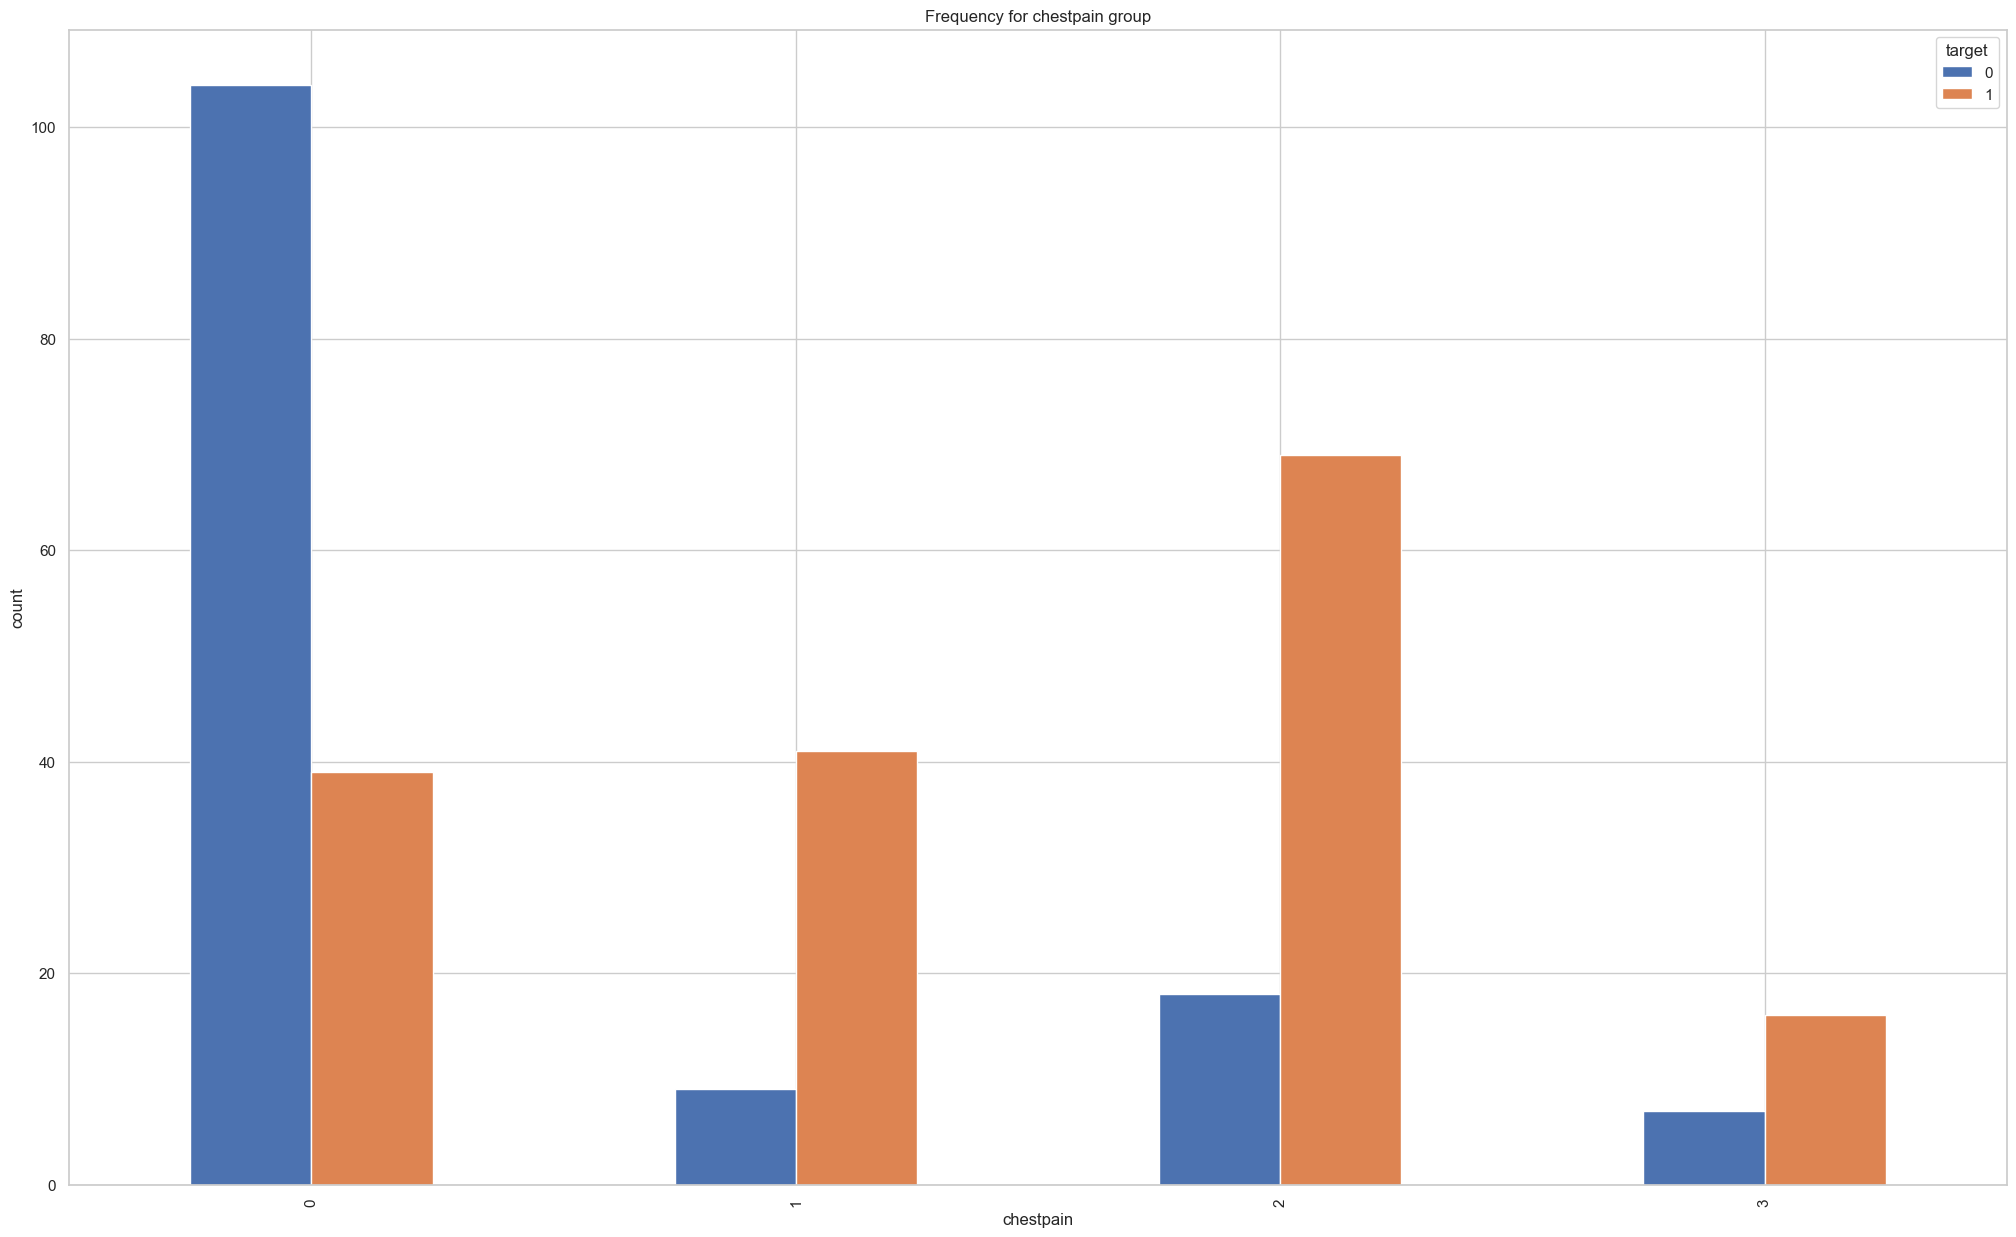

In [27]:
# %matplotlib inline
pd.crosstab(heart_data.cp, heart_data.target).plot(kind='bar')
plt.title('Frequency for chestpain group')
plt.xlabel('chestpain')
plt.ylabel('count')
plt.savefig('chestpain_frequency')

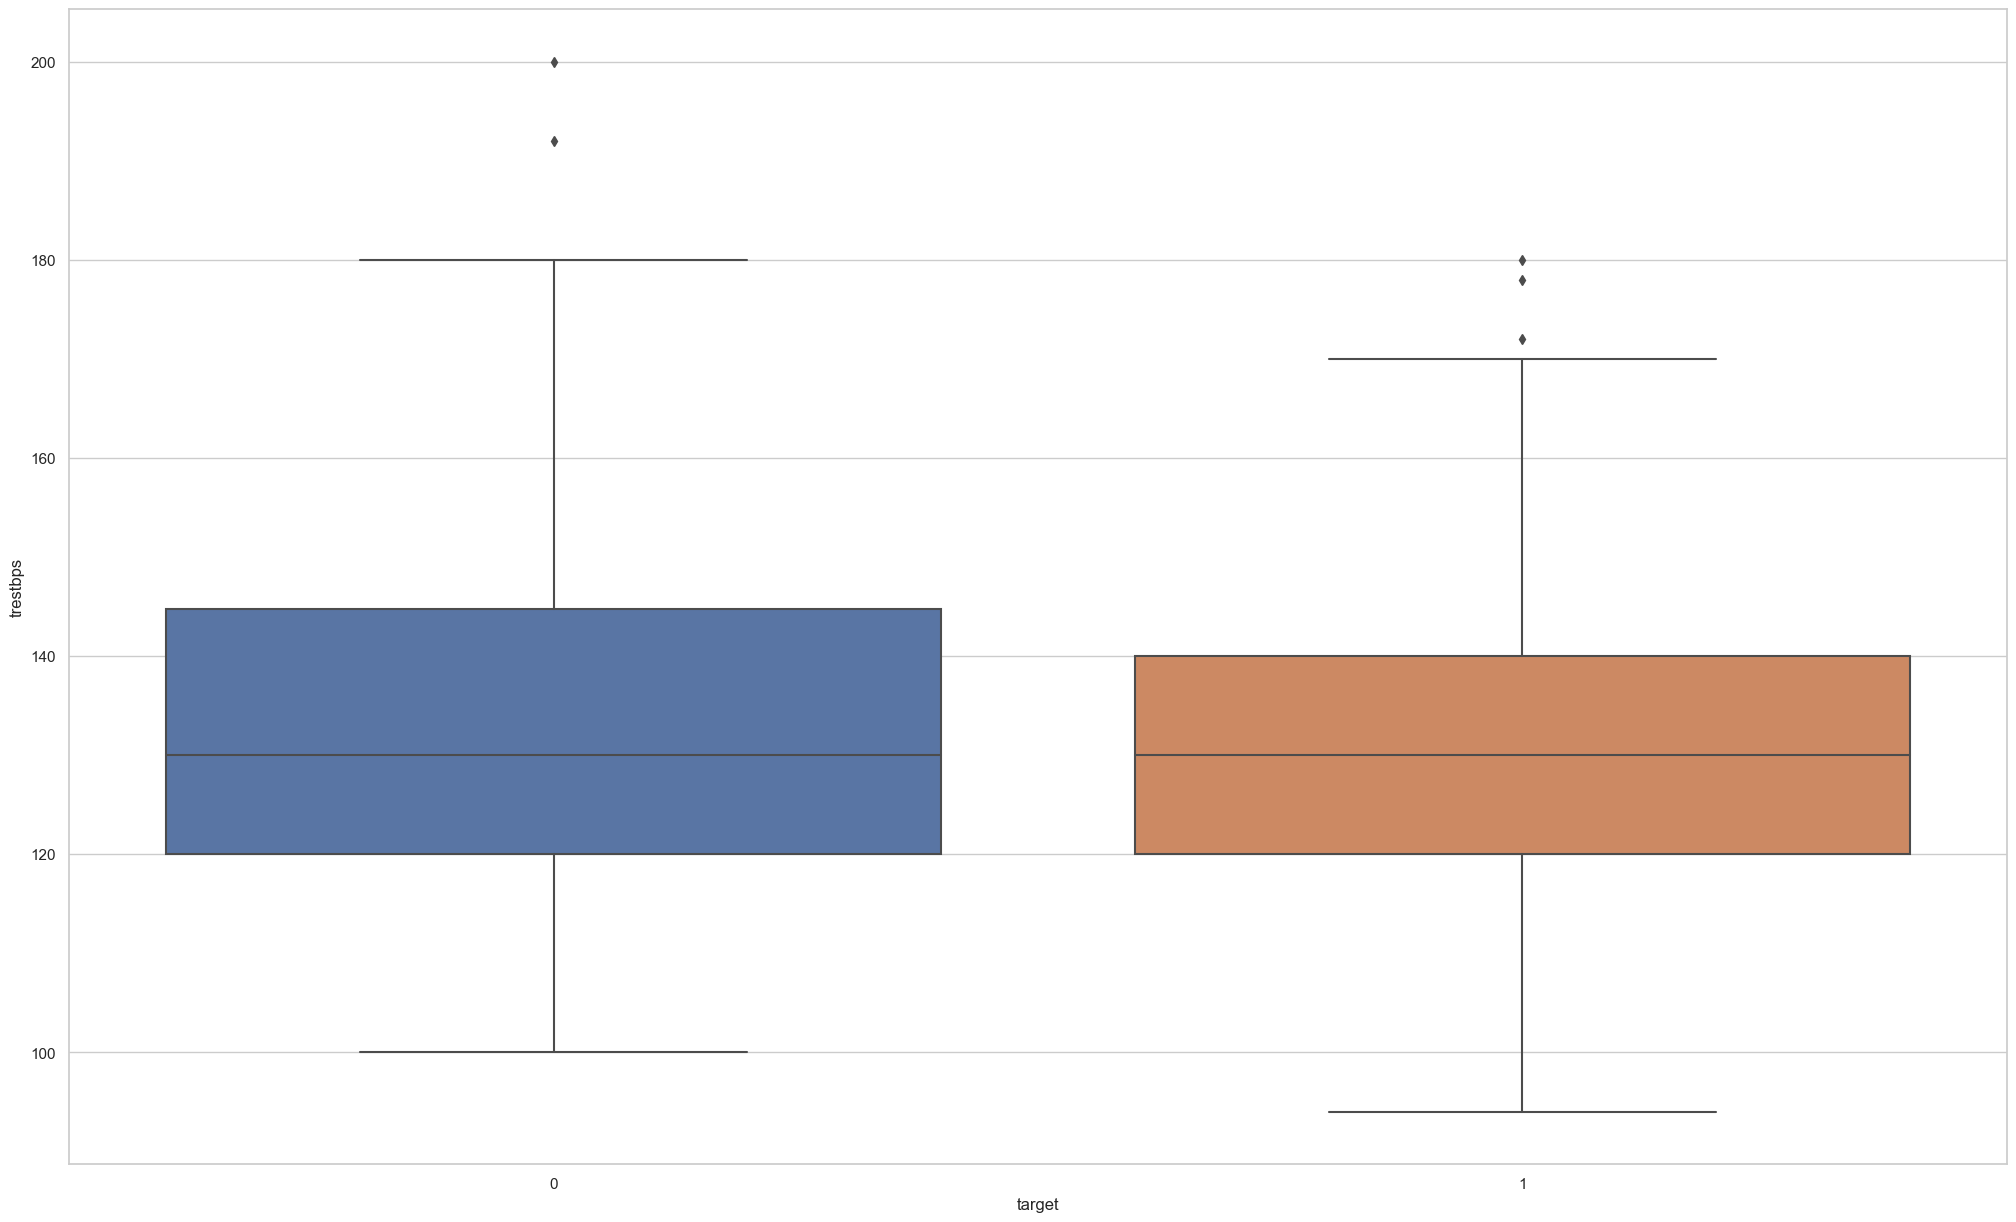

In [28]:
sns.boxplot(data=heart_data,x='target',y='trestbps')
plt.show()

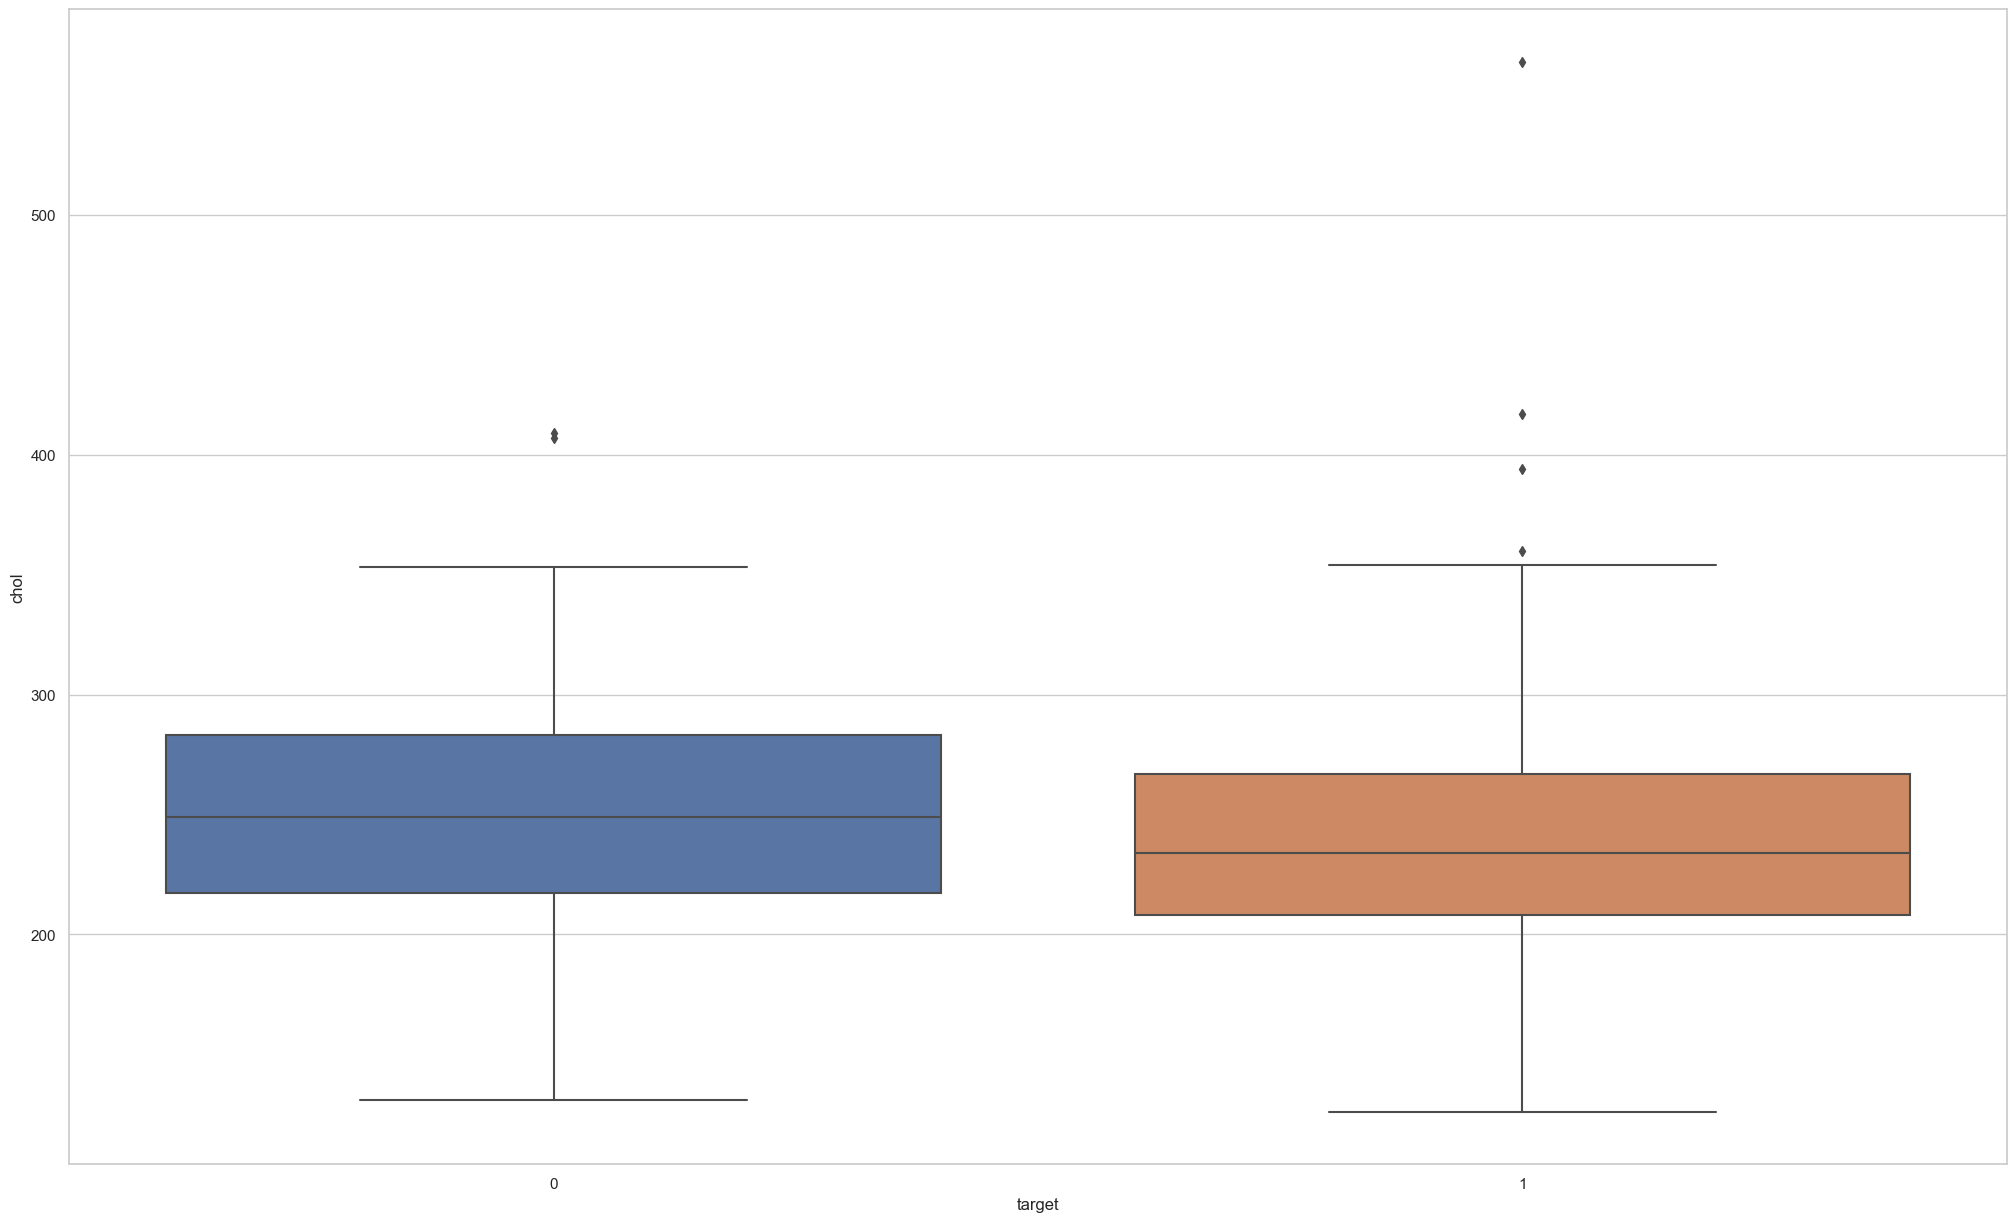

In [29]:
sns.boxplot(data=heart_data,x='target',y='chol')
plt.show()

Text(0, 0.5, 'count')

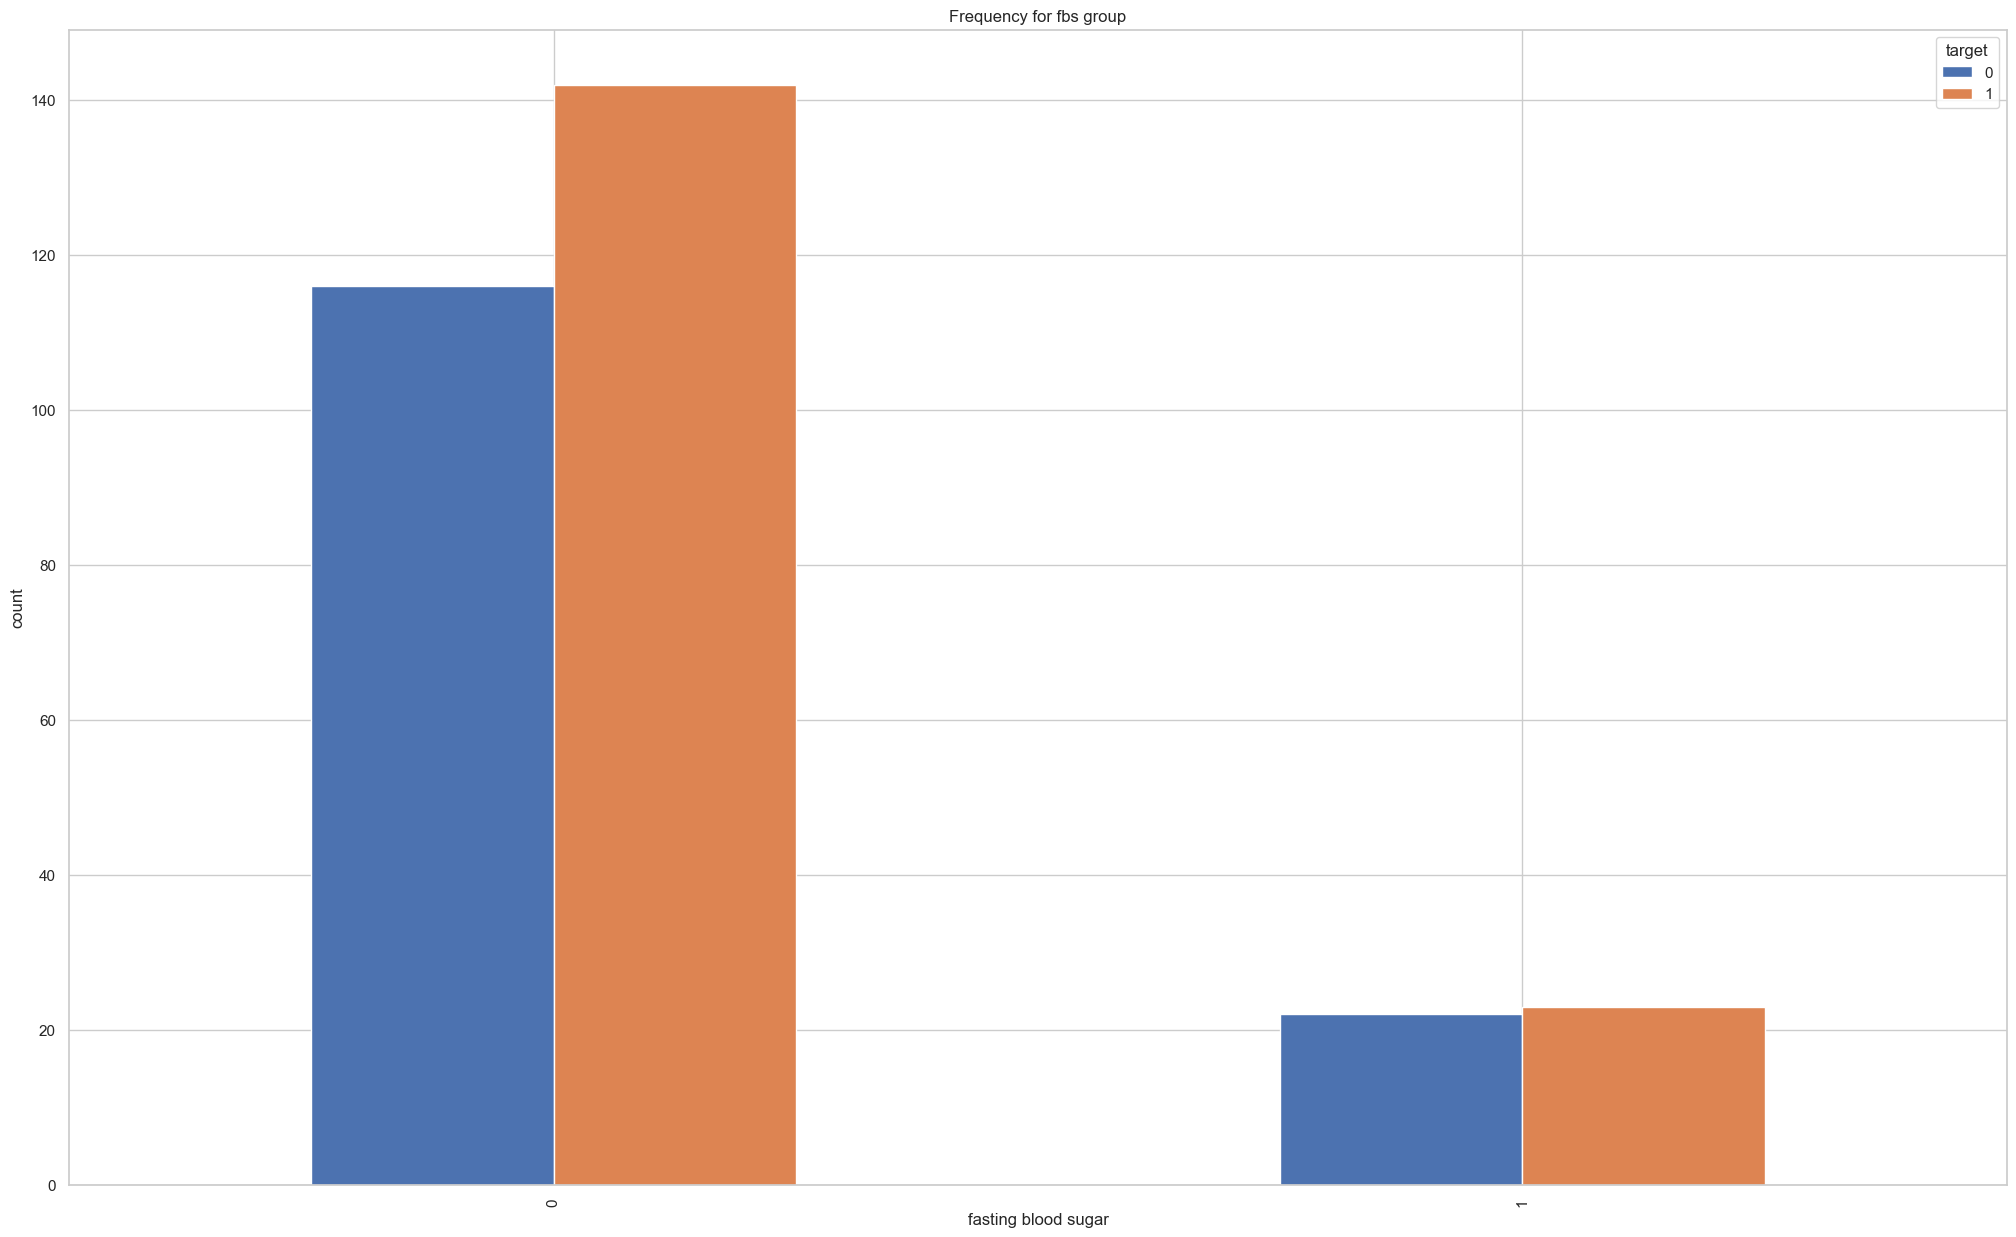

In [30]:
# %matplotlib inline
pd.crosstab(heart_data.fbs, heart_data.target).plot(kind='bar')
plt.title('Frequency for fbs group')
plt.xlabel('fasting blood sugar')
plt.ylabel('count')
# plt.savefig('fbs_frequency')

Text(0, 0.5, 'count')

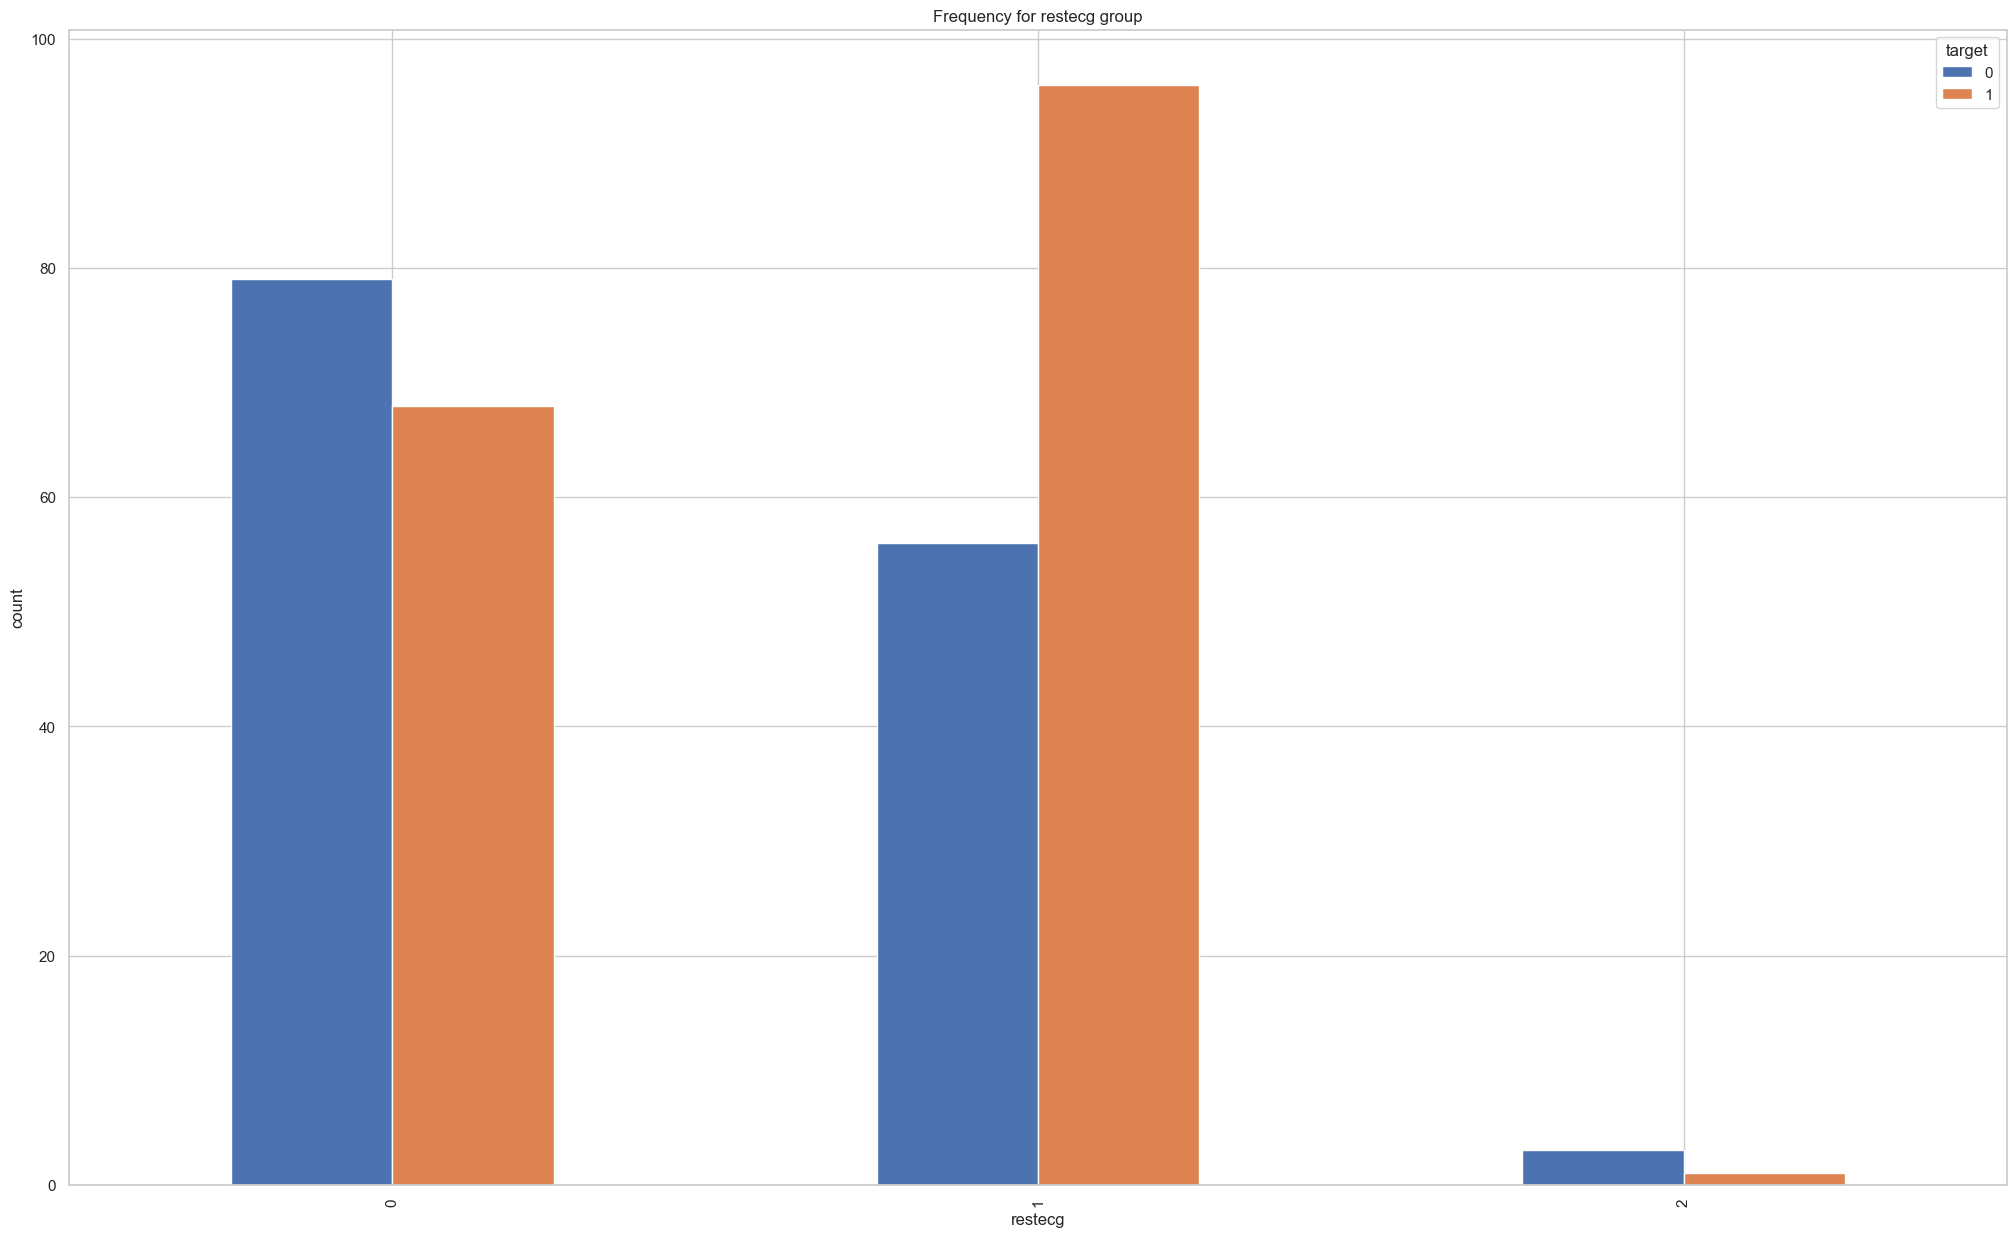

In [31]:
# %matplotlib inline
pd.crosstab(heart_data.restecg, heart_data.target).plot(kind='bar')
plt.title('Frequency for restecg group')
plt.xlabel('restecg')
plt.ylabel('count')
# plt.savefig('restecg_frequency')

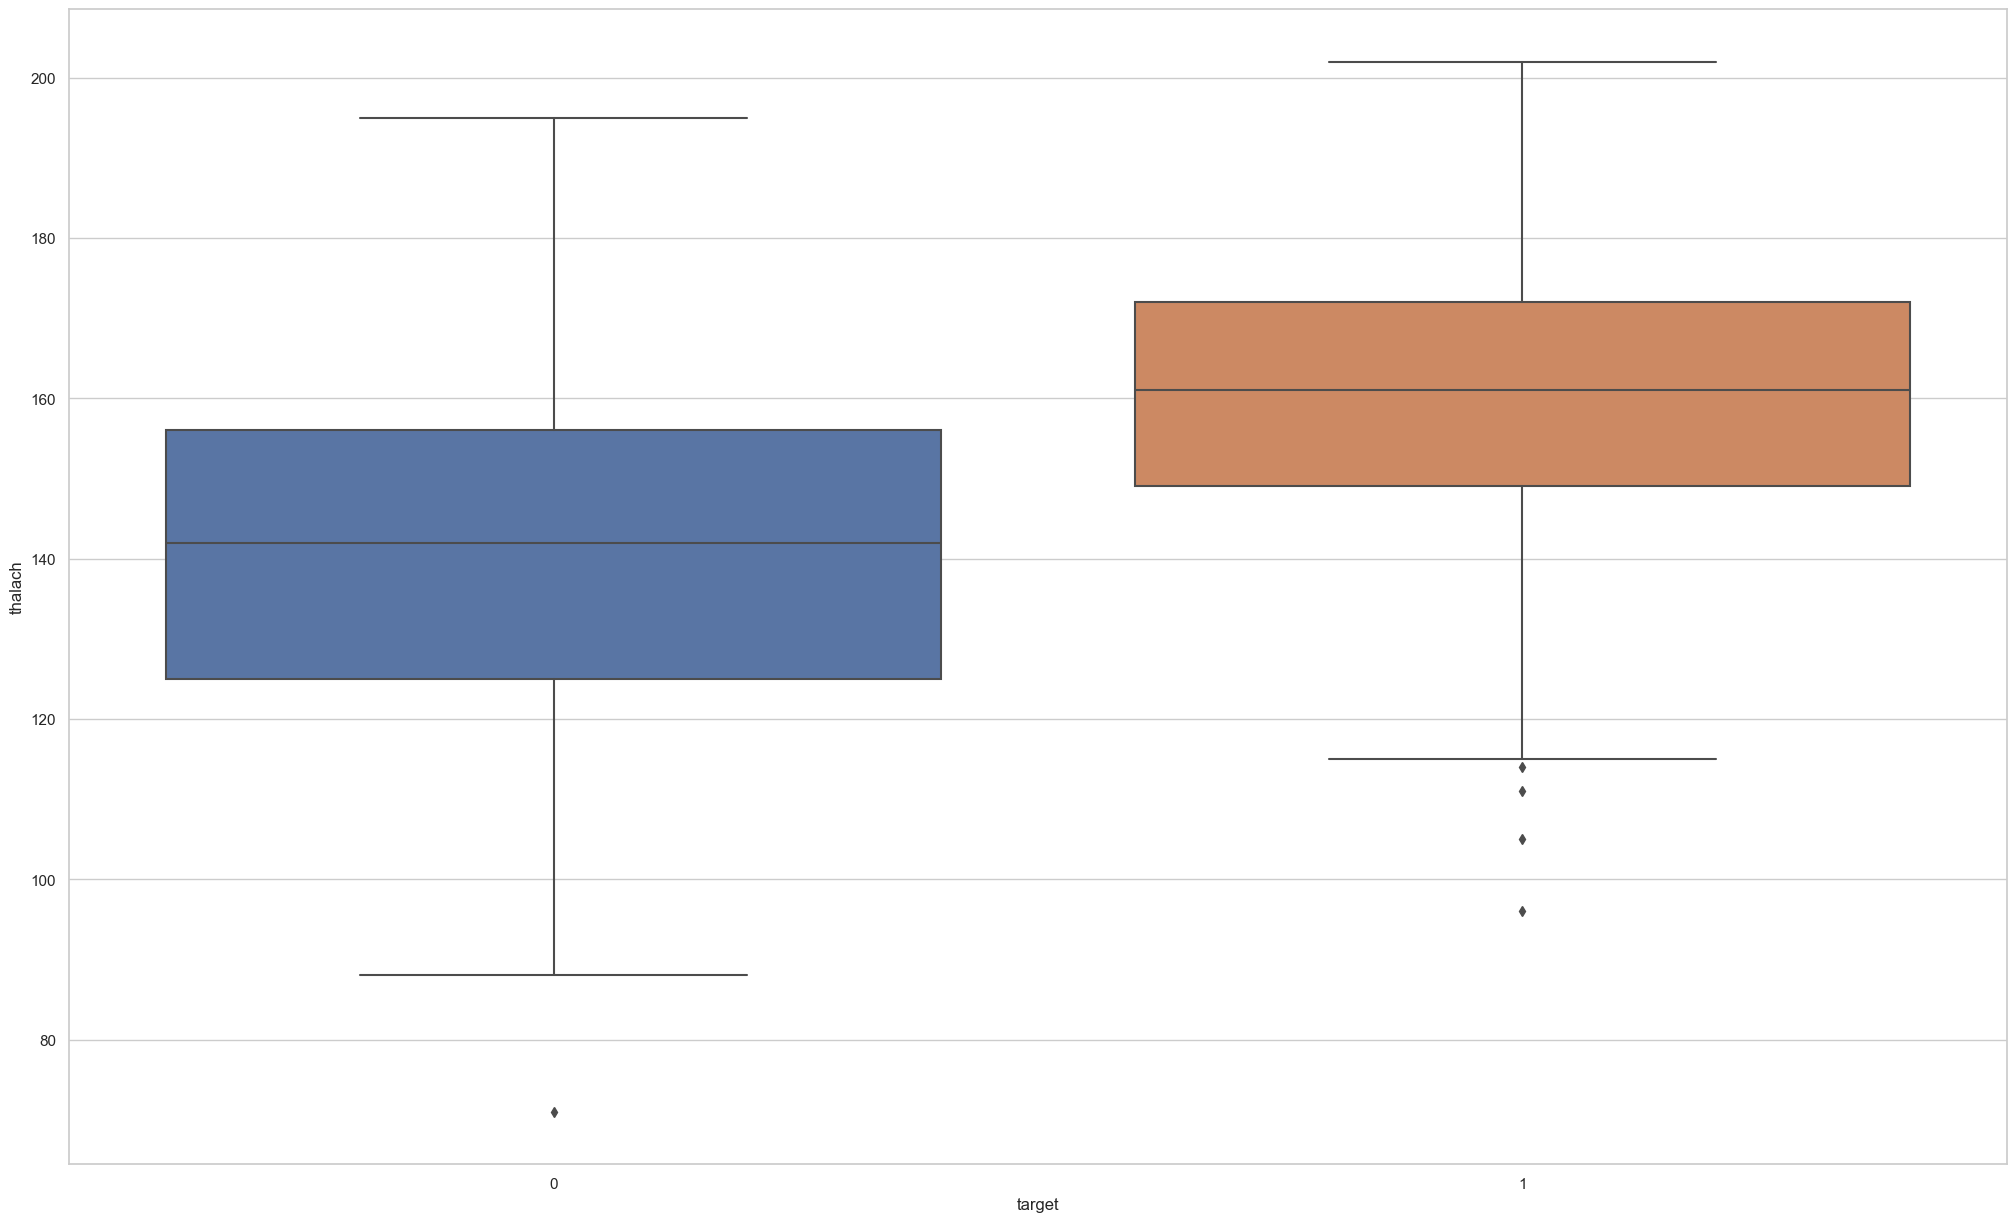

In [32]:
sns.boxplot(data=heart_data,x='target',y='thalach')
plt.show()

Text(0, 0.5, 'count')

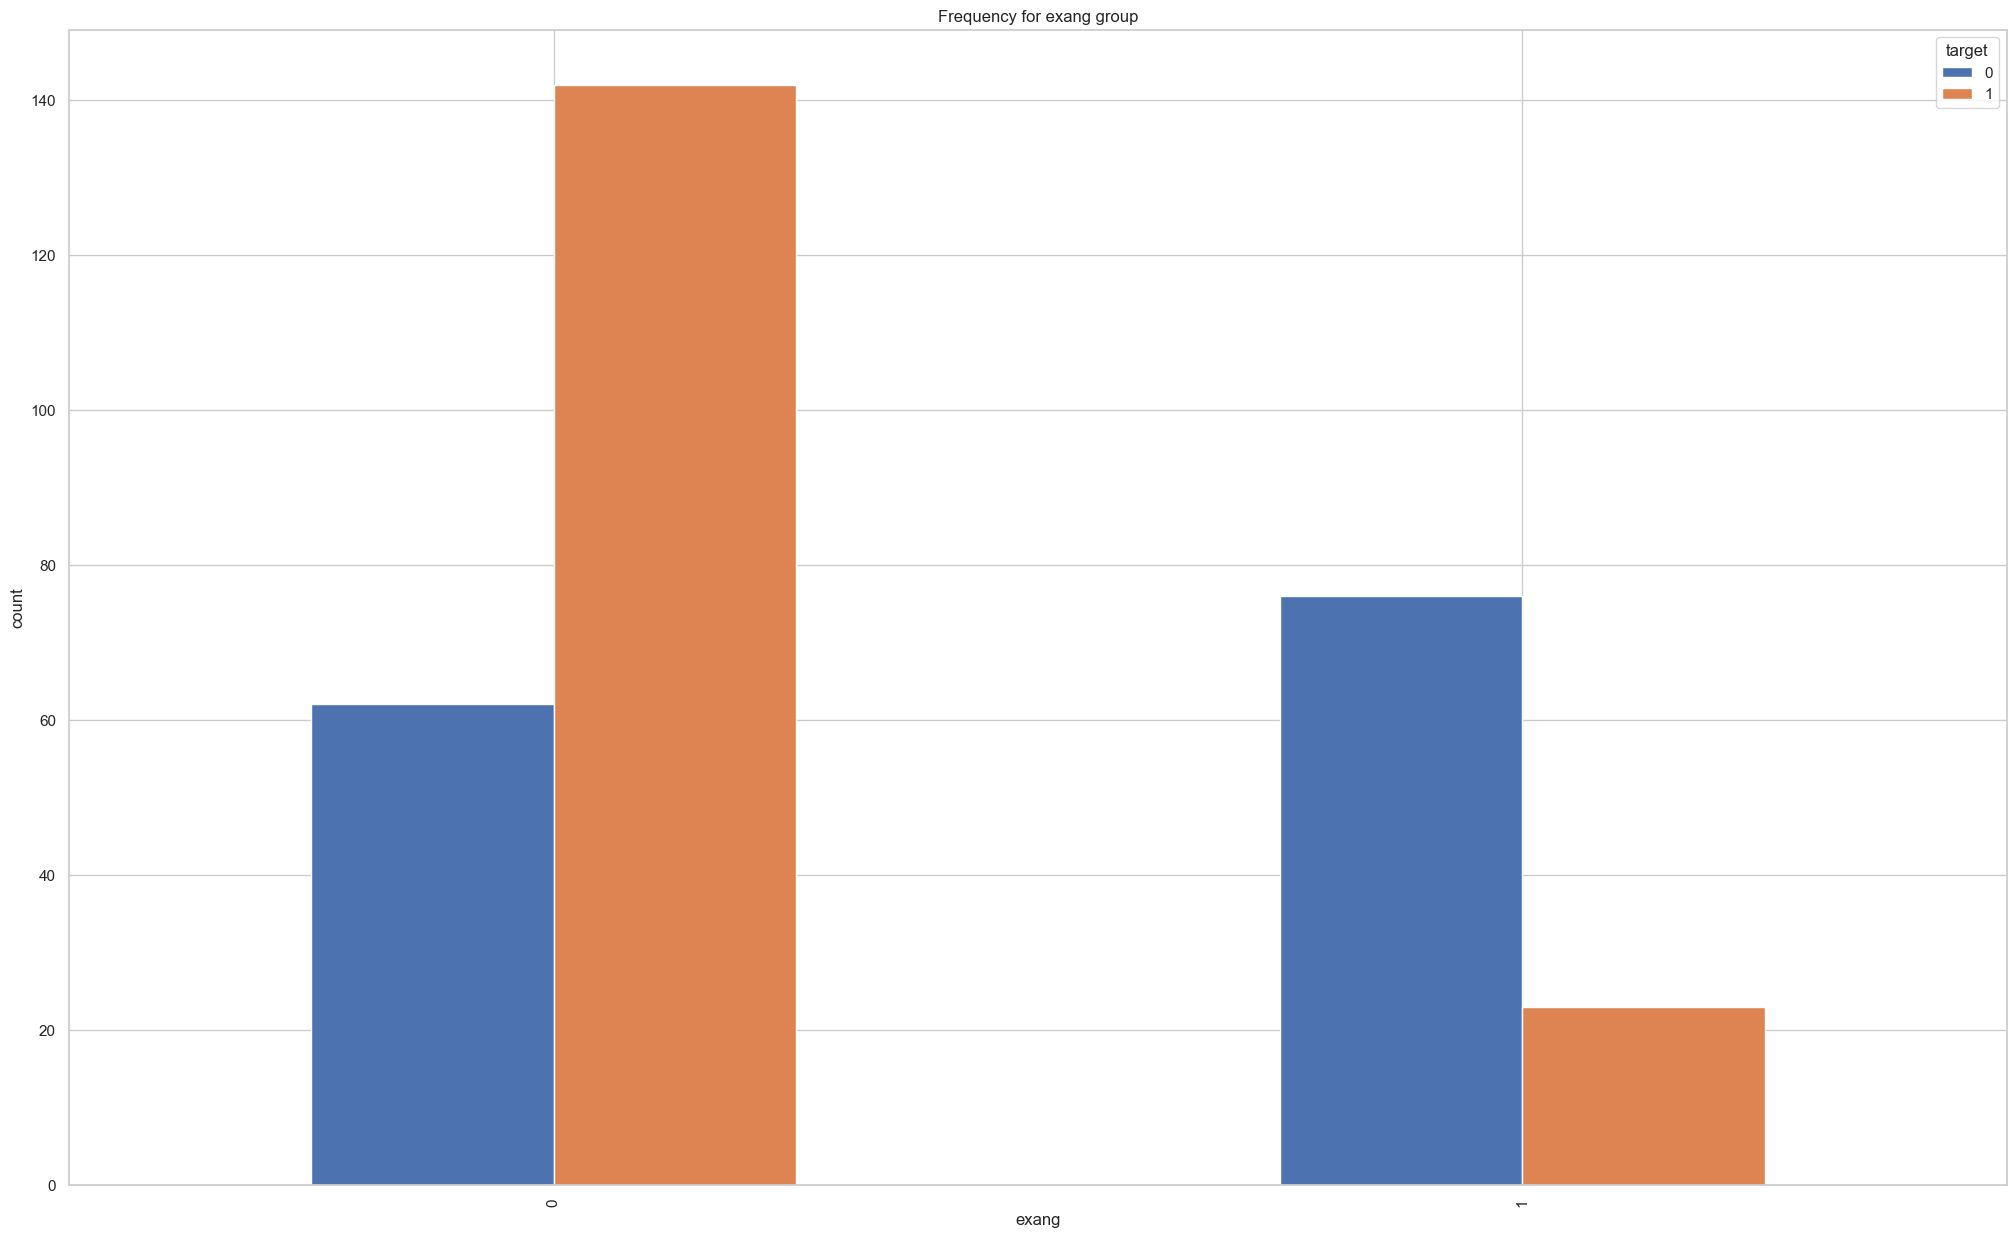

In [33]:
# %matplotlib inline
pd.crosstab(heart_data.exang, heart_data.target).plot(kind='bar')
plt.title('Frequency for exang group')
plt.xlabel('exang')
plt.ylabel('count')
# plt.savefig('exang_frequency')

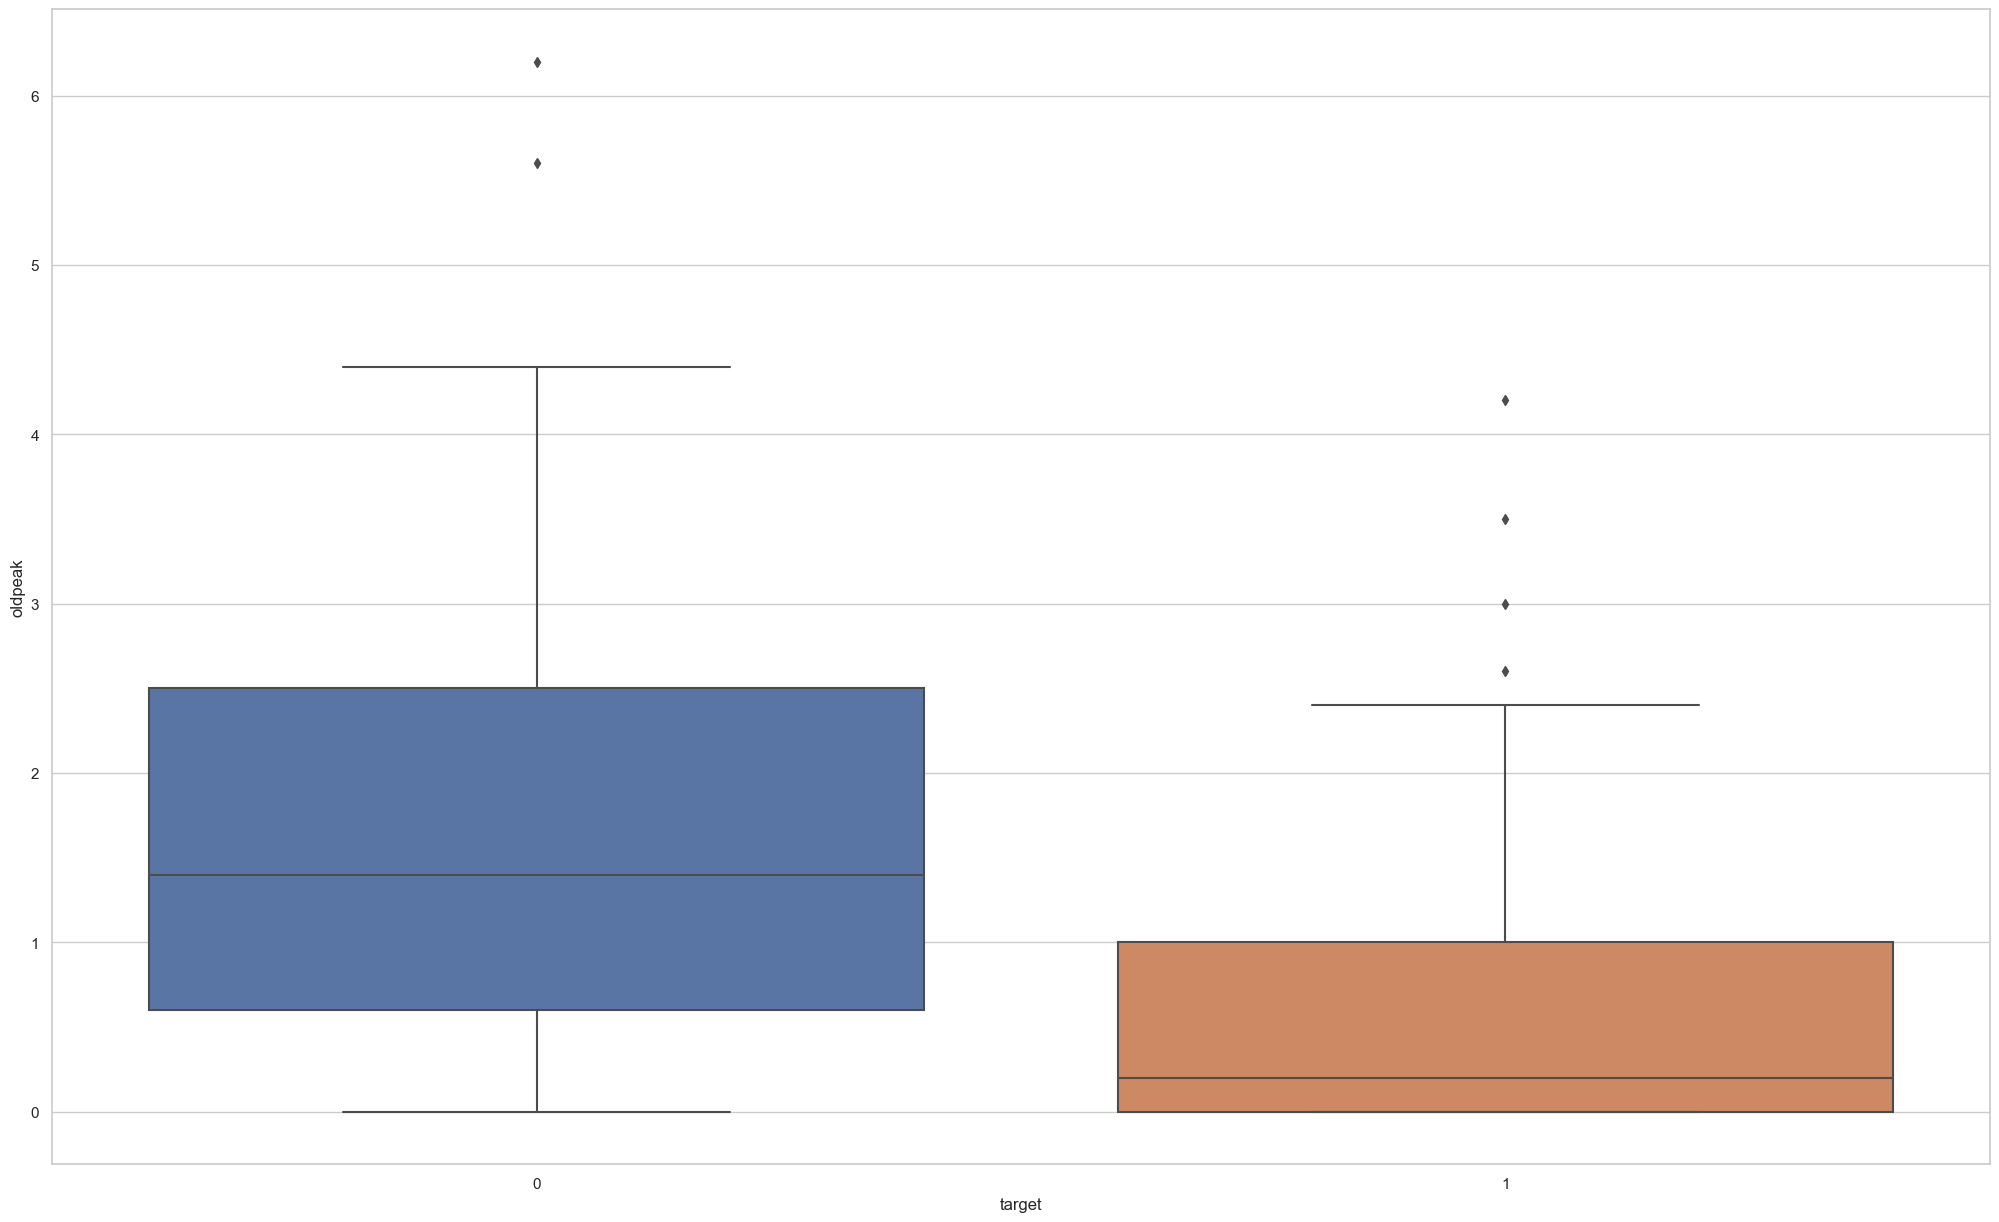

In [34]:
sns.boxplot(data=heart_data,x='target',y='oldpeak')
plt.show()

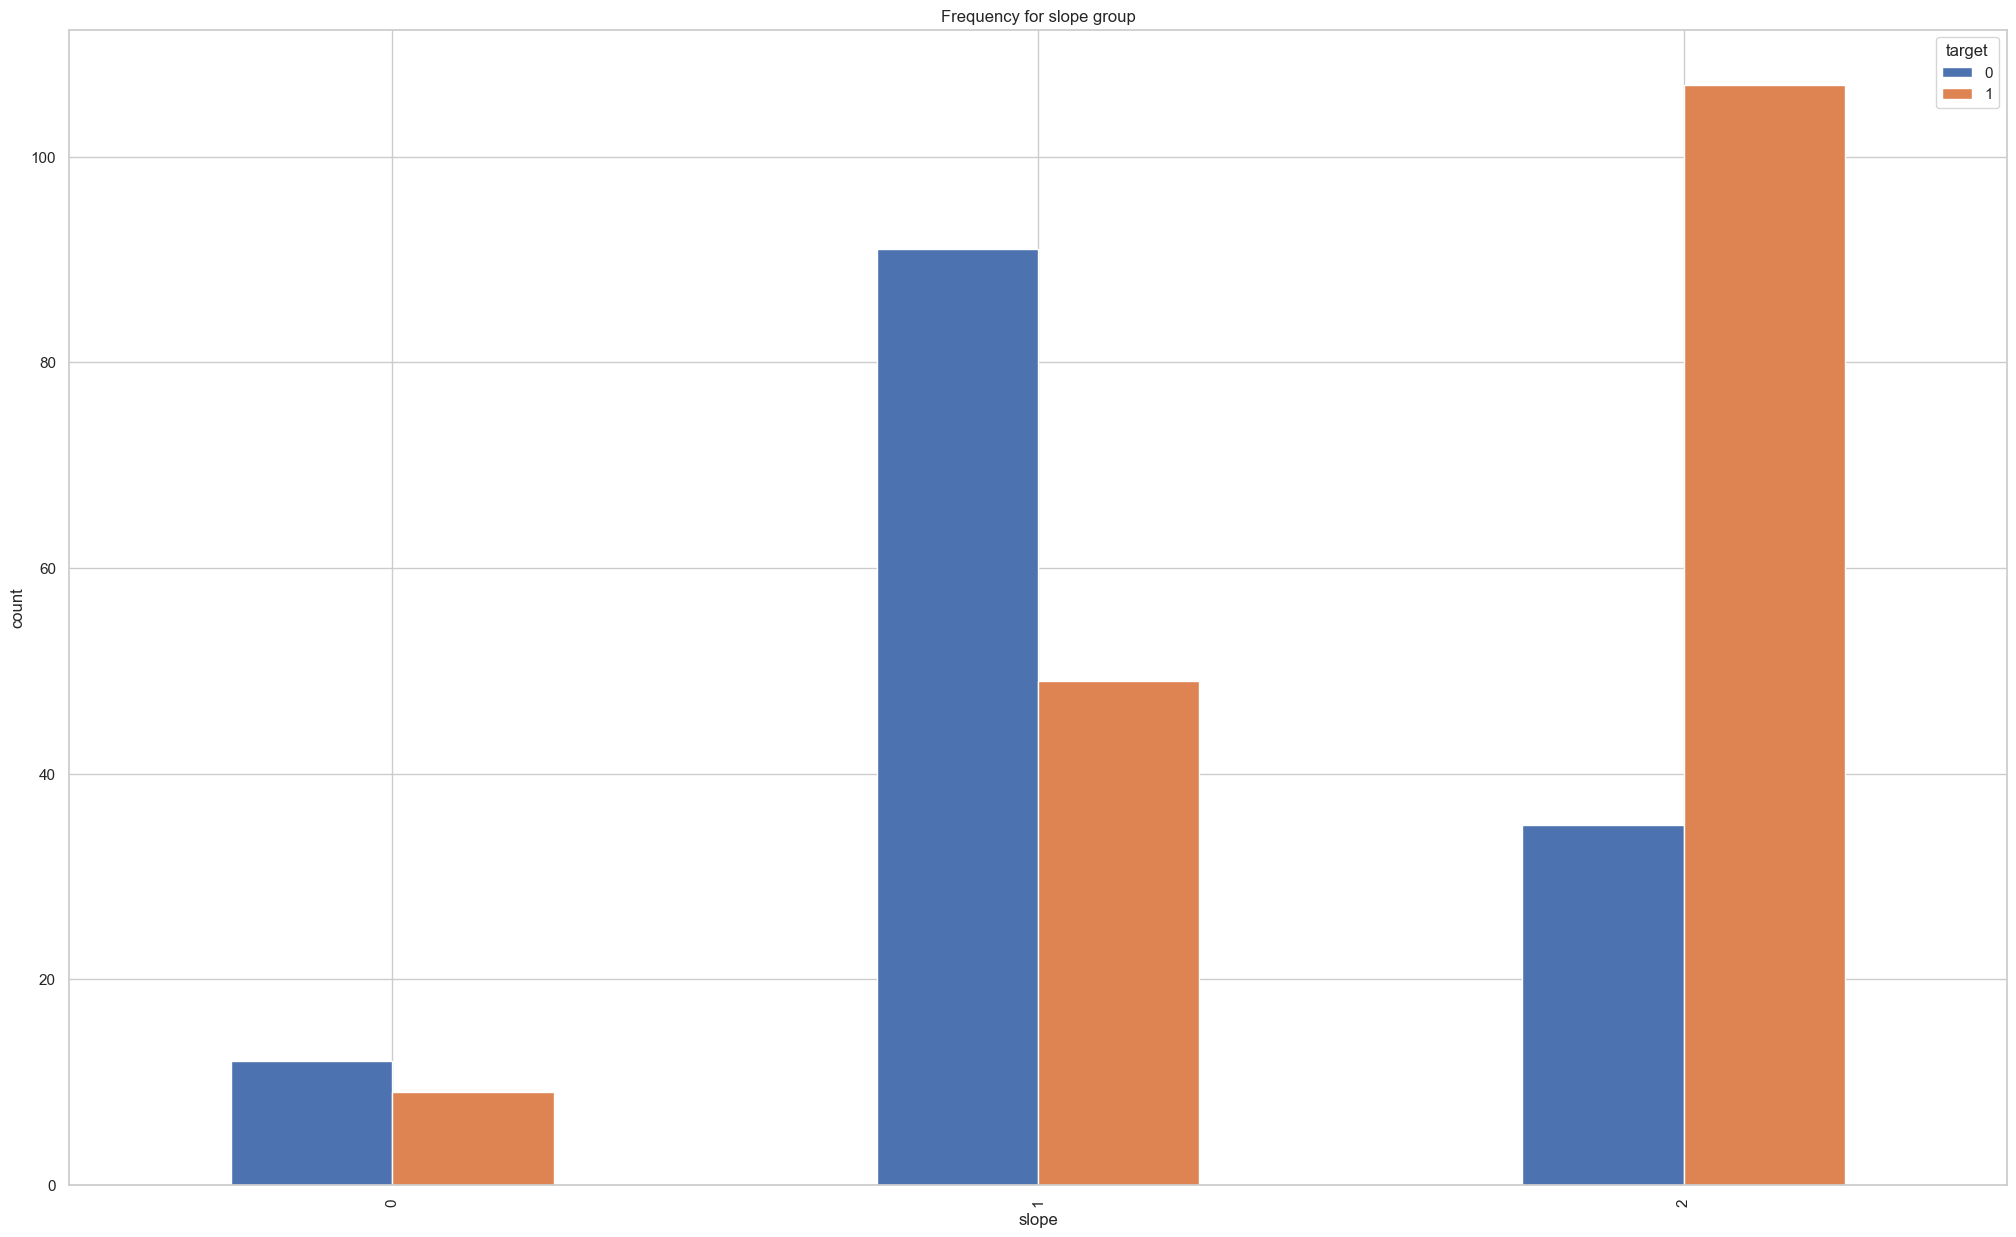

In [35]:
# %matplotlib inline
pd.crosstab(heart_data.slope, heart_data.target).plot(kind='bar')
plt.title('Frequency for slope group')
plt.xlabel('slope')
plt.ylabel('count')
plt.savefig('slope_frequency')

Text(0, 0.5, 'count')

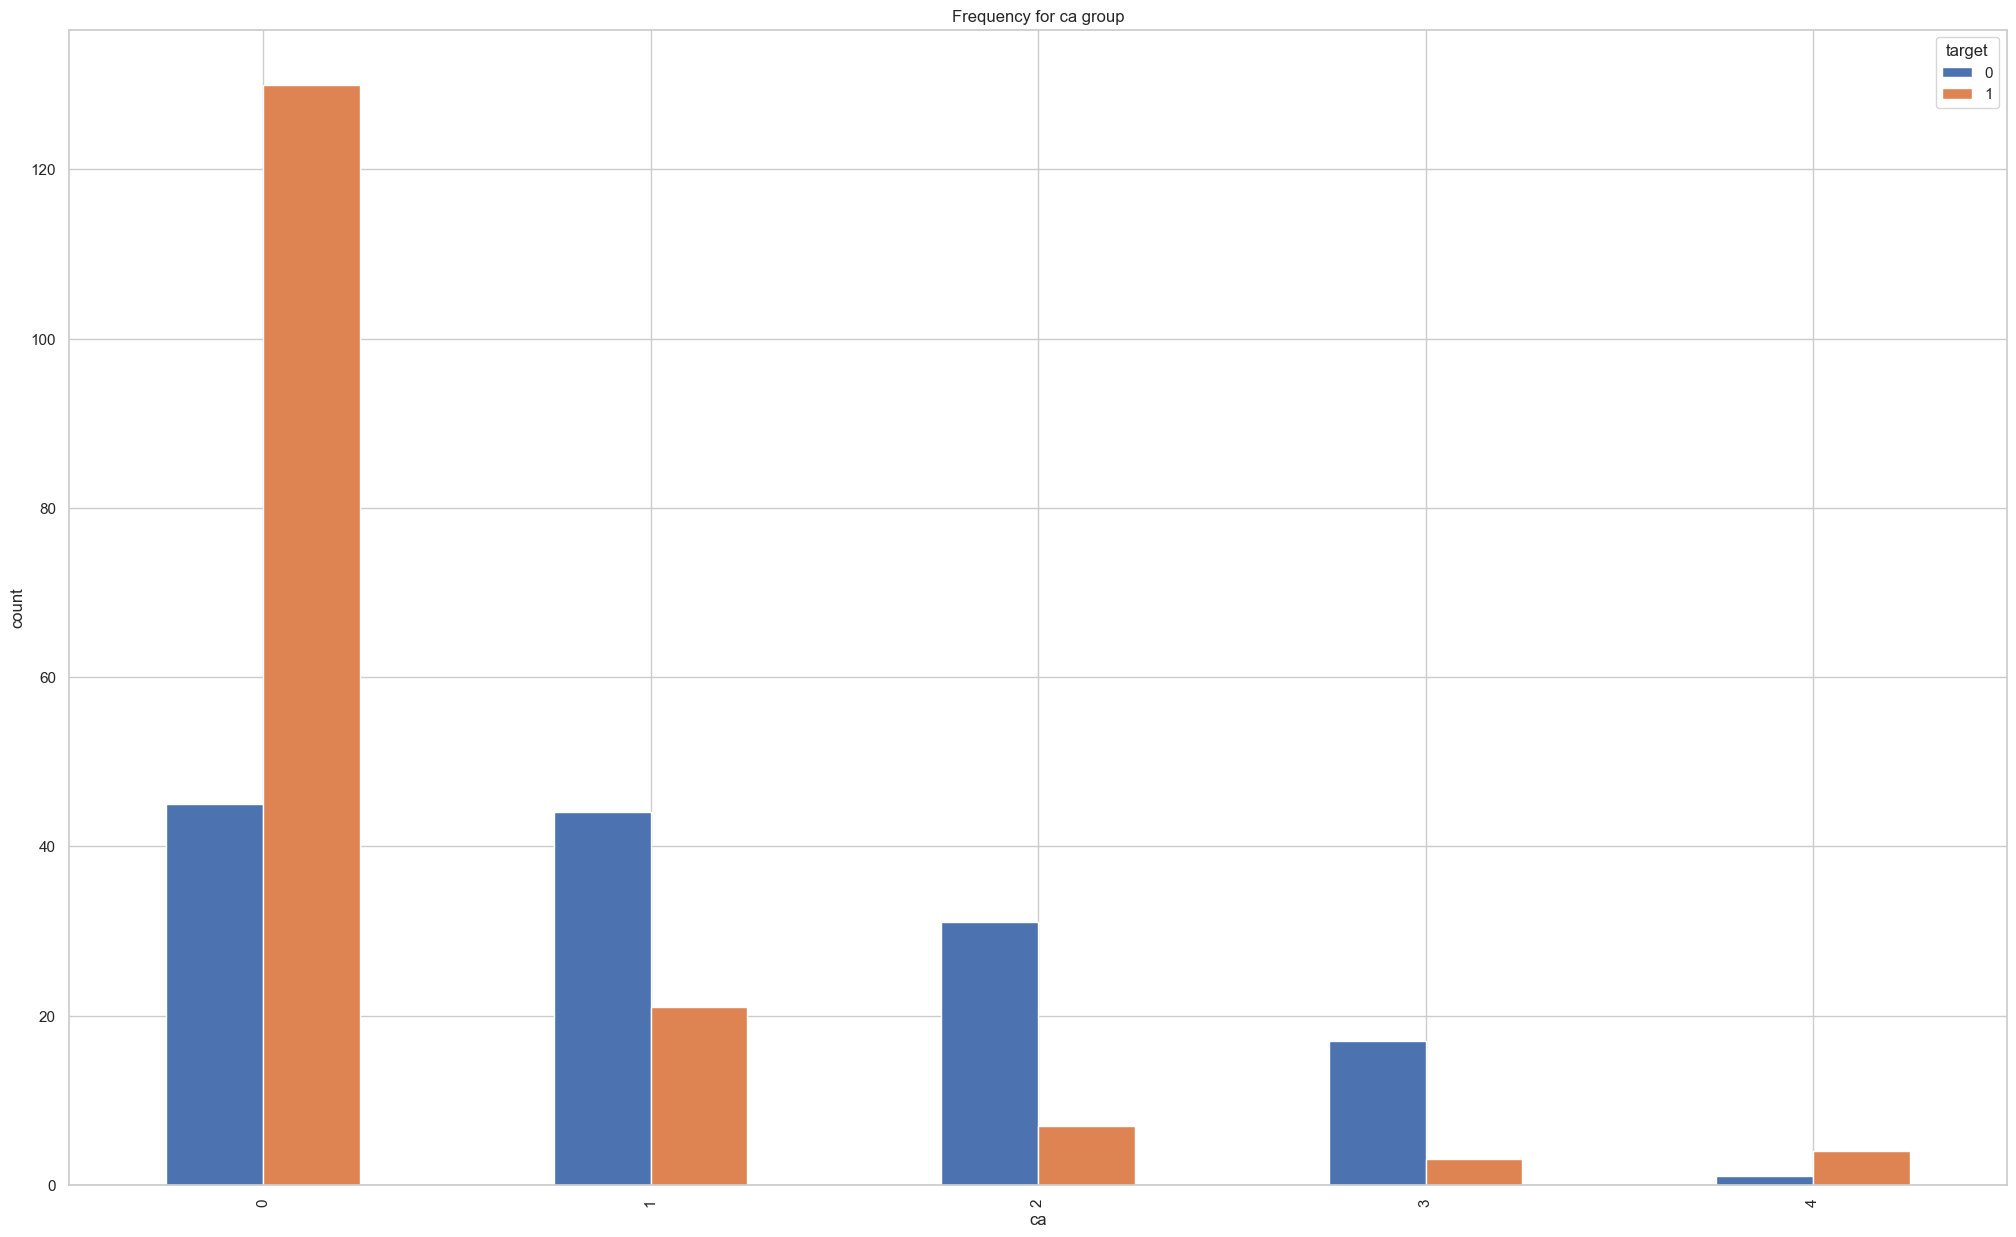

In [36]:
# %matplotlib inline
pd.crosstab(heart_data.ca, heart_data.target).plot(kind='bar')
plt.title('Frequency for ca group')
plt.xlabel('ca')
plt.ylabel('count')
# plt.savefig('ca_frequency')

Text(0, 0.5, 'count')

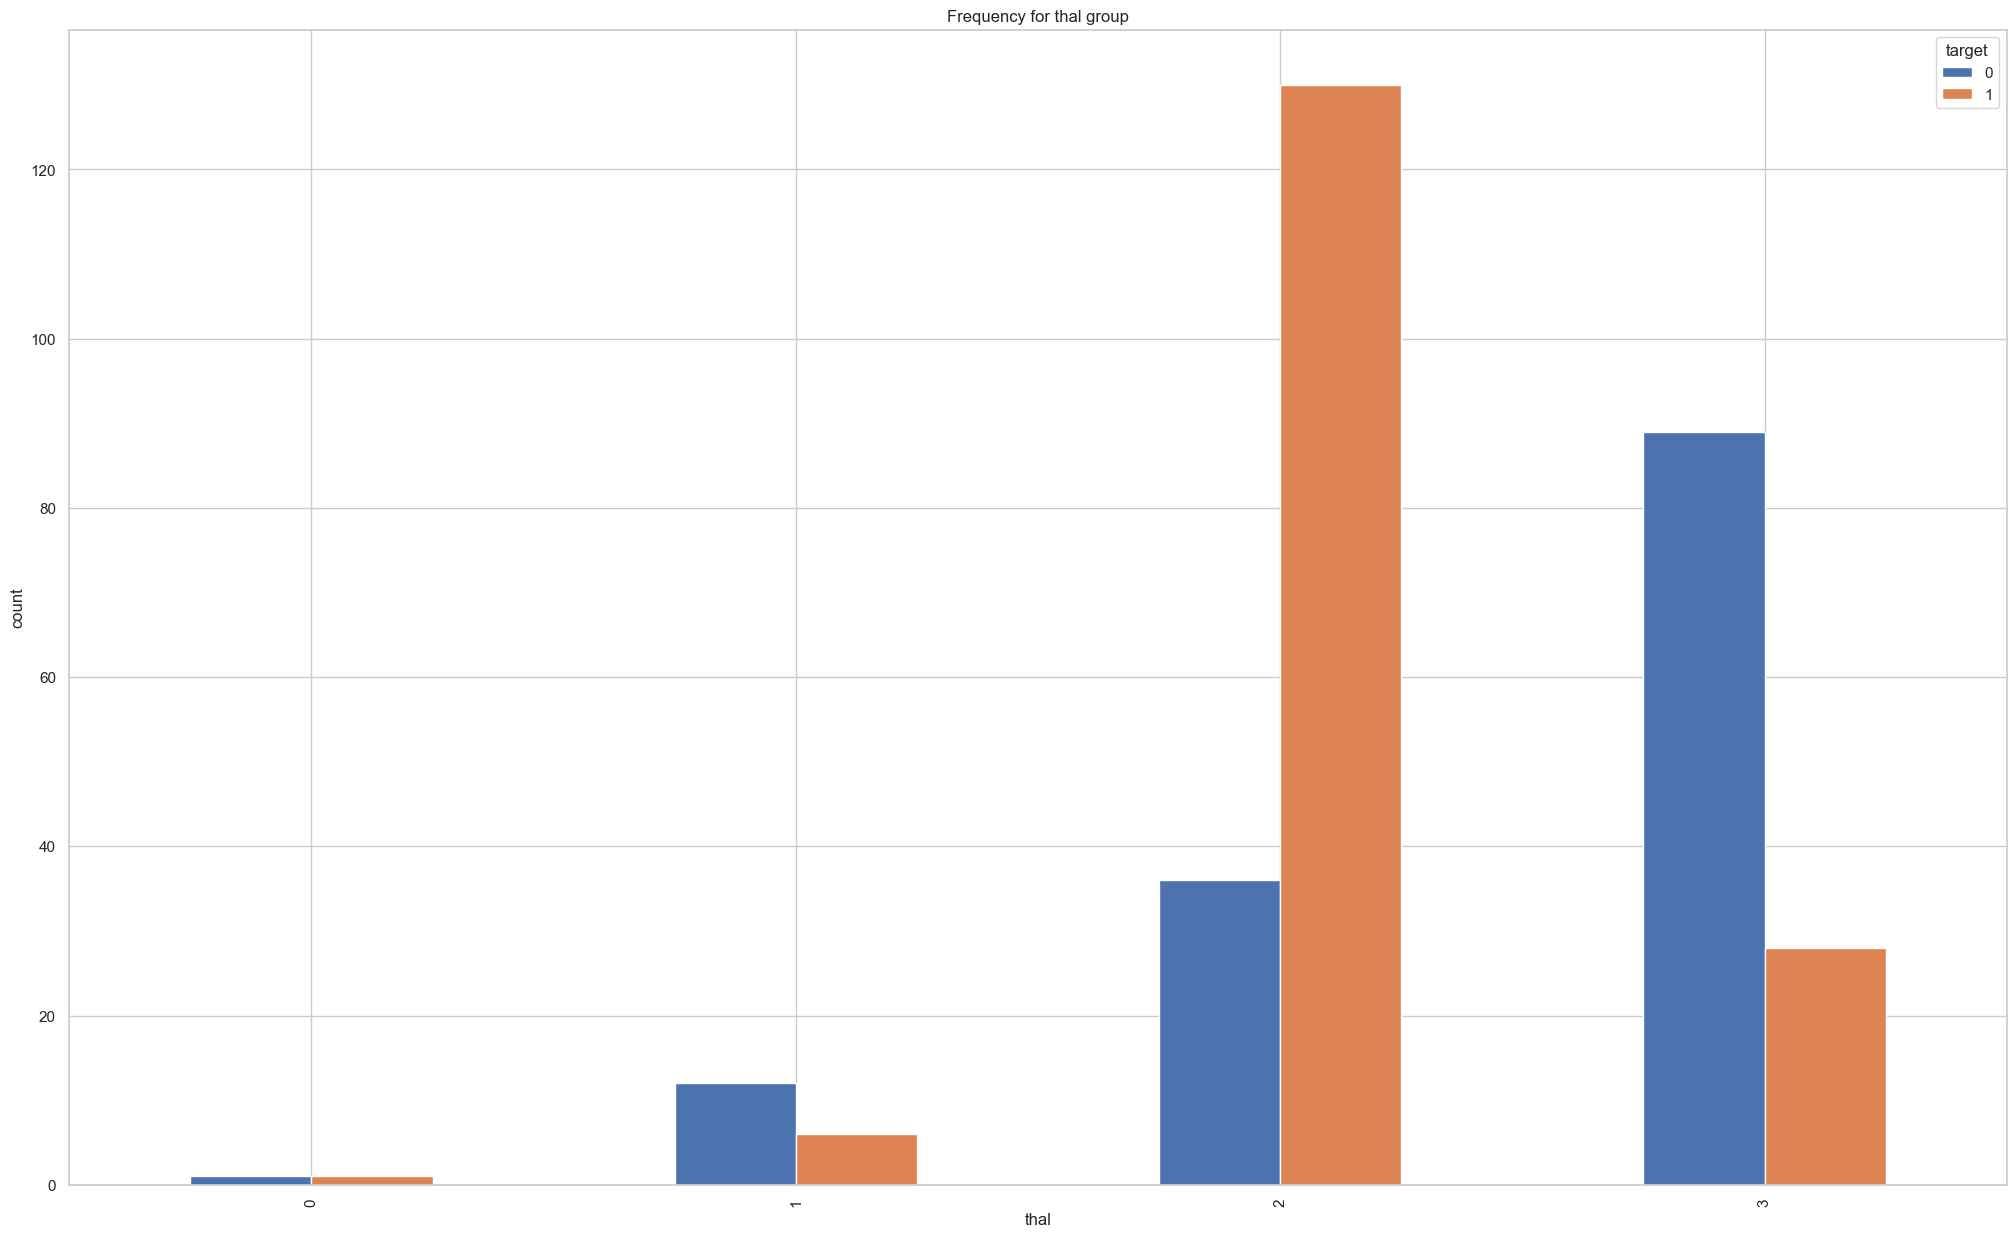

In [37]:
# %matplotlib inline
pd.crosstab(heart_data.thal, heart_data.target).plot(kind='bar')
plt.title('Frequency for thal group')
plt.xlabel('thal')
plt.ylabel('count')
# plt.savefig('thal_frequency')

### Multivariate Analysis

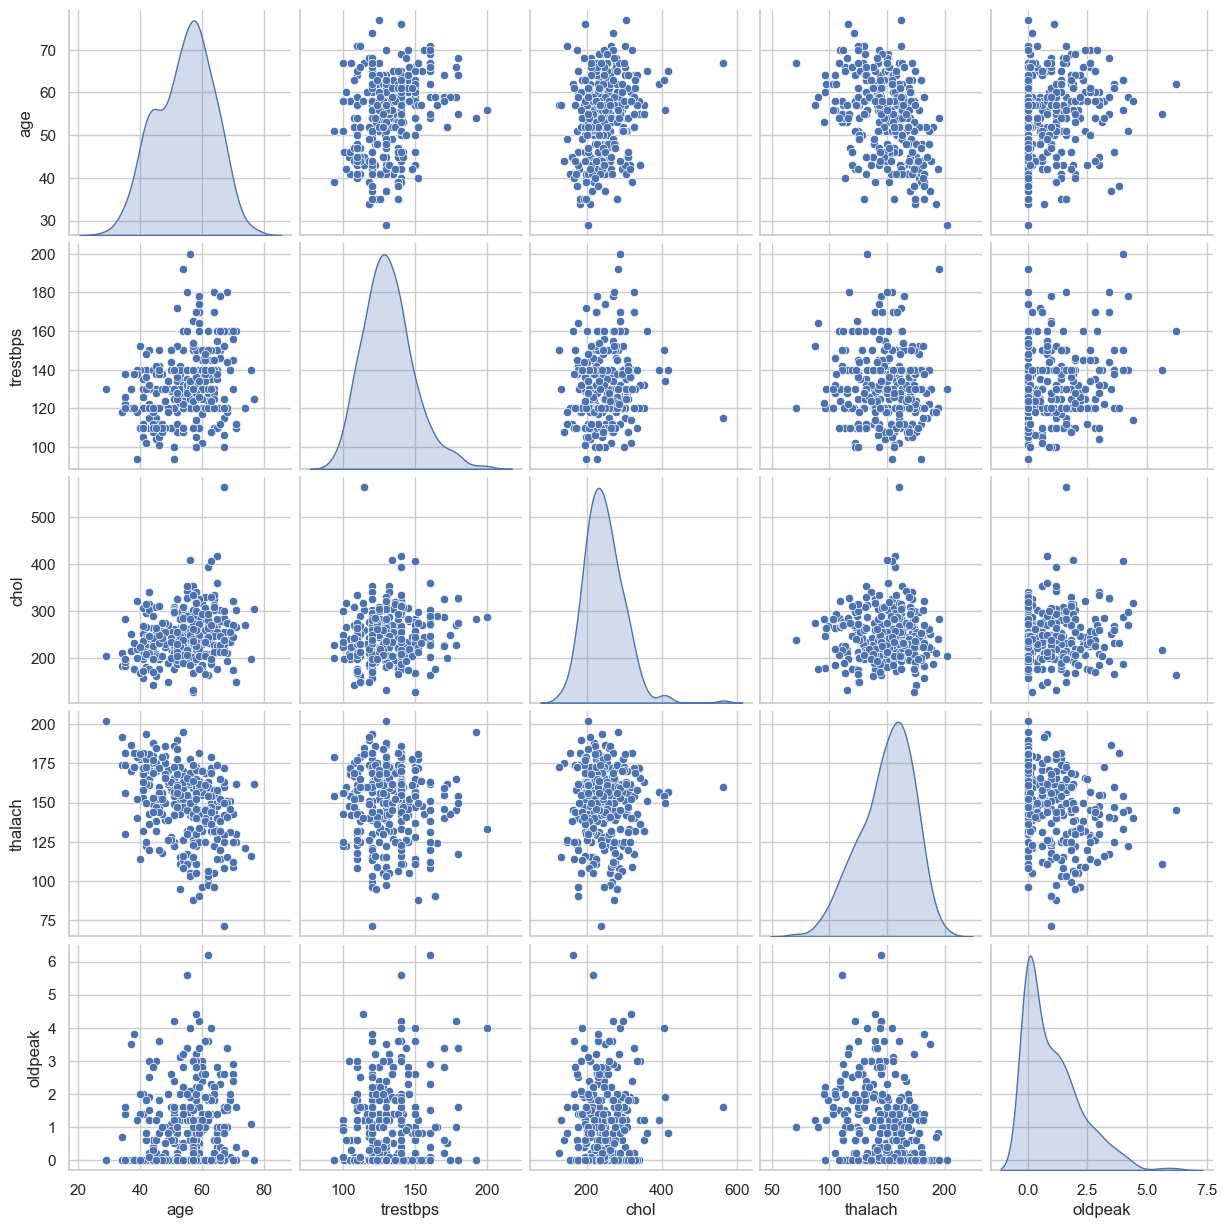

In [38]:
sns.pairplot(num_data,diag_kind='kde')
plt.show()

**Checking for the skewness of the numerical data.**

In [39]:
num_data.skew()

age        -0.202463
trestbps    0.713768
chol        1.143401
thalach    -0.537410
oldpeak     1.269720
dtype: float64

**Interpretation:** 
The `age` variable was slightly negative skewed.`thalach` variable was moderately negative skewed. `trestbps` variable was moderately positive skewed. `chol` and `oldpeak` are highly positive skewed.

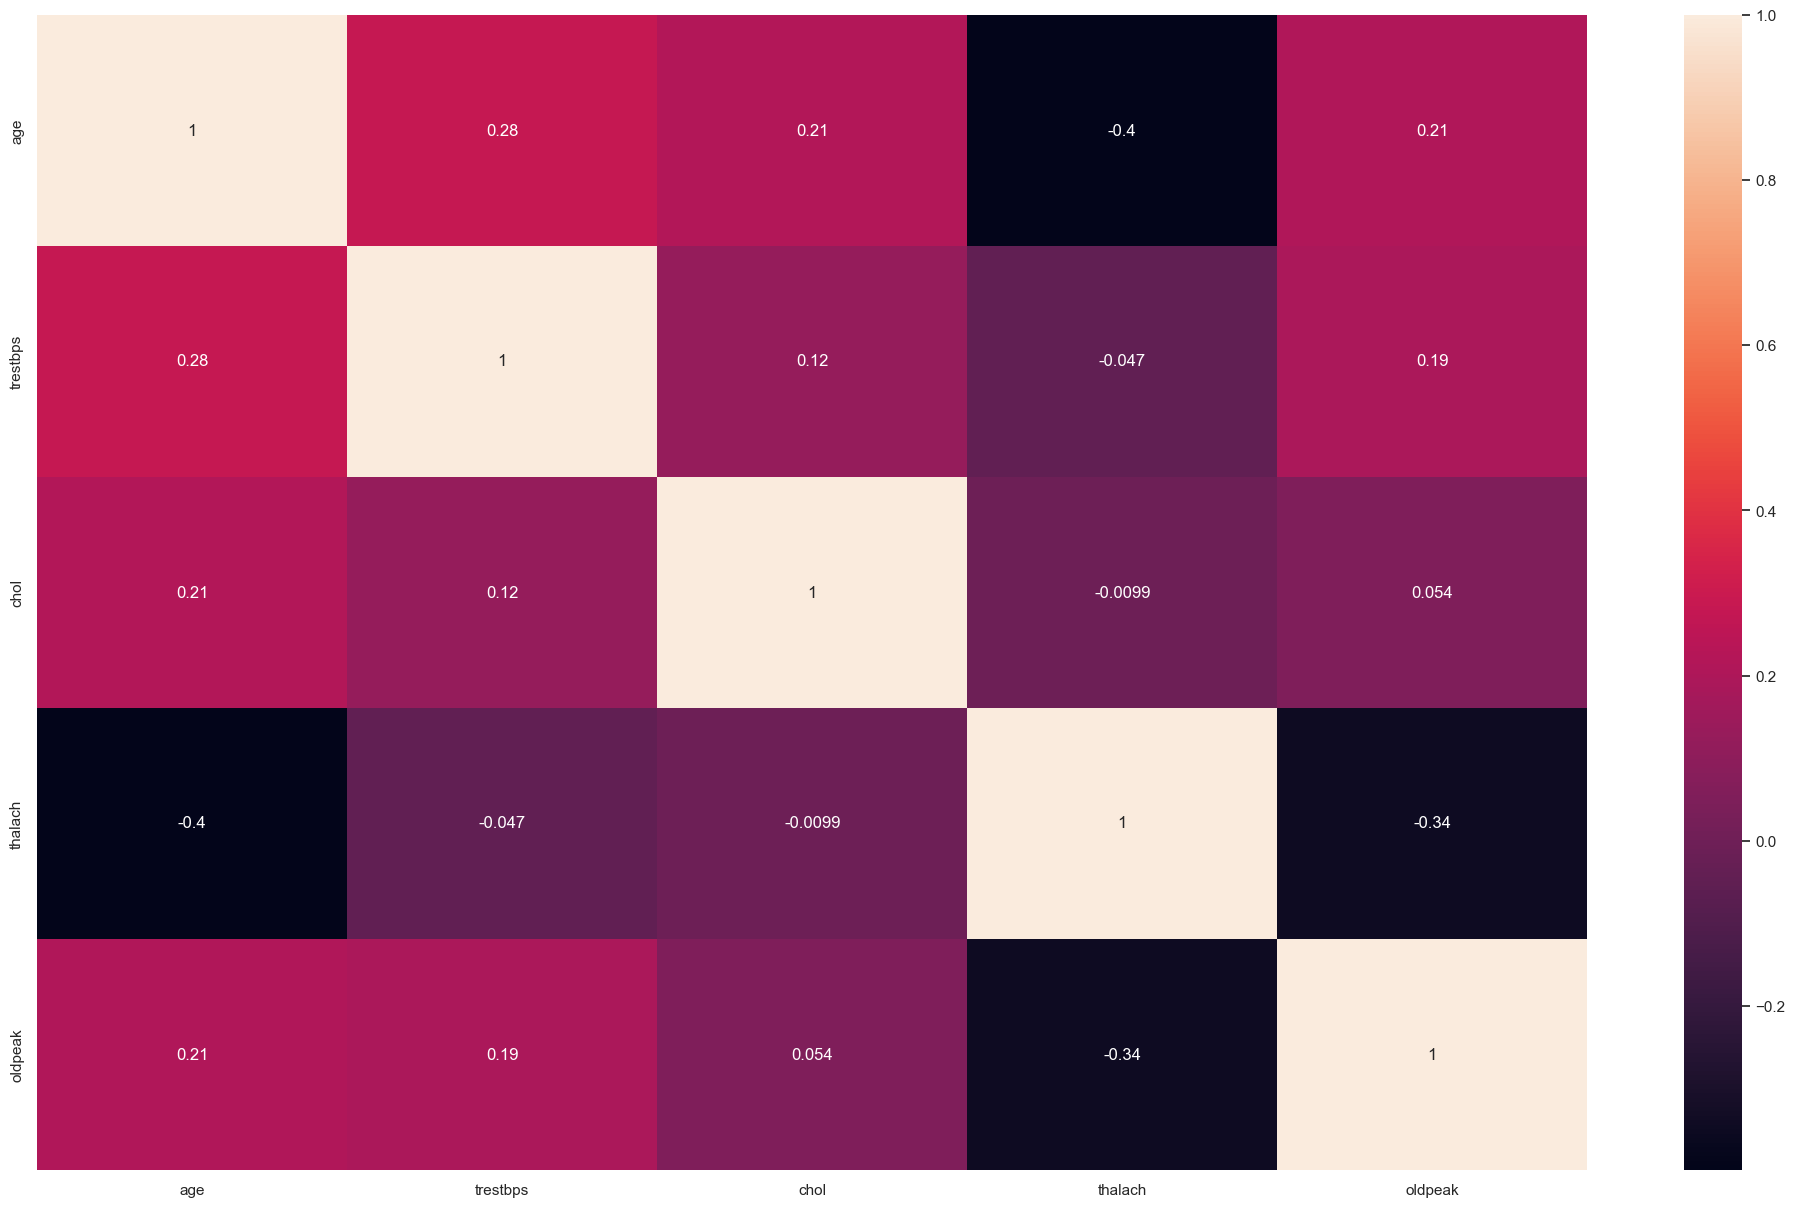

In [40]:
sns.heatmap(num_data.corr(),annot=True)
plt.show()

## 2.5 Outlier Treatment
For identifying the outliers in the dataset,`Interquartile range(IQR)` method is used. IQR is the middle 50% of the dataset.

In [41]:
# calculate the firt quartile
q1=num_data.quantile(0.25)
# calculate the second quartile
q2=num_data.quantile(0.5)
# calculate the third quartile
q3=num_data.quantile(0.75)
# Calculate the interquartile range
iqr=q3-q1
# print the value of IQR
iqr

age        13.500000
trestbps   20.000000
chol       63.500000
thalach    32.500000
oldpeak     1.600000
dtype: float64

In [42]:
outliers=num_data[~((num_data>(q3+1.5*iqr))|(num_data<(q1-1.5*iqr)))]
outliers

,age,trestbps,chol,thalach,oldpeak
0,63,145.000000,233.000000,150.000000,2.300000
1,37,130.000000,250.000000,187.000000,3.500000
2,41,130.000000,204.000000,172.000000,1.400000
3,56,120.000000,236.000000,178.000000,0.800000
4,57,120.000000,354.000000,163.000000,0.600000
5,57,140.000000,192.000000,148.000000,0.400000
6,56,140.000000,294.000000,153.000000,1.300000
7,44,120.000000,263.000000,173.000000,0.000000
8,52,NaN,199.000000,162.000000,0.500000
9,57,150.000000,168.000000,174.000000,1.600000


**Interpretation:** From the above output the values which representing as 'nan' are outliers.


In [43]:
#Finding the number of outliers present in the numerical data
outliers.isna().sum()

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

**Interpretation:** The above output defines the count of outliers in specific variables.
* trestbps - 9
* chol - 5
* thalach - 1
* oldpeak - 5

The outliers are not going to be treated because there must be any chance of value occuring  nearer or same as the outlier value. Model wants to identify the such situations and gives the proper report for the patient.

## 2.6 Train-Test Split

Before applying classification techniques to predict the heart diseased patient, let us split the dataset into train and test set.

In [44]:
X = heart_data.drop('target',axis=1)
Y = heart_data['target']

In [45]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2


In [46]:
Y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

**Splitting the Data into Training data & Test Data.**

In [47]:
# add a constant column to the dataframe
# while using the 'Logit' method in the statsmodel library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant'
X=sm.add_constant(X)
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.25, stratify = Y, random_state=2)

In [48]:

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', Y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', Y_test.shape)

X_train (227, 14)
y_train (227,)
X_test (76, 14)
y_test (76,)


# 3. Logistic Regression (Full Model)

**Build a full logistic model on a training dataset.**

In [49]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
model = sm.Logit(Y_train, X_train).fit()

# print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.343480
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      213
Method:                           MLE   Df Model:                           13
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.5014
Time:                        12:28:02   Log-Likelihood:                -77.970
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 8.736e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8487      3.195      0.892      0.373      -3.413       9.111
age           -0.0004      0.

### Calculate the AIC (Akaike Information Criterion) Value.

In [50]:
print('AIC: ',model.aic)

AIC:  183.94001881389815


#### We can use the AIC value to compare different models createdd on the same dataset.

### Interpret the odds for each variable

In [51]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(model.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,17.266078
age,0.999649
sex,0.157946
cp,2.529620
trestbps,0.984931
chol,0.996068
fbs,0.938193
restecg,1.836085
thalach,1.025146
exang,0.304250


**Interpretation:**
Odds_const: The odds of getting an patient get heart disease is 17.266078, considering all other variables take zero values.

Odds_age = 0.999649, it implies that the odds of getting heart disease by a factor of 0.999649 due to one unit increase in the age, keeping other variables constant.

Odds_sex = 0.157946, it implies that the odds of getting heart diseased by a factor of 0.157946 due to one unit increase in the sex, keeping other variables constant.

Odds_cp = 2.529620, it implies that the odds of getting heart diseased by a factor of 2.529620 due to one unit increase in the cp, keeping other variables constant.

Odds_trestbps = 0.984931, it implies that the odds of getting heart diseased by a factor of 0.984931 due to one unit increase in the trestbps, keeping other variables constant.

Odds_chol = 0.996068, it implies that the odds of getting heart diseased by a factor of 0.996068 due to one unit increase in the chol, keeping other variables constant.

Odds_fbs = 0.938193, it implies that the odds of getting heart diseased by a factor of 0.938193 due to one unit increase in the fbs, keeping other variables constant.

Odds_restecg = 1.836085, it implies that the odds of getting heart diseased by a factor of 1.836085 due to one unit increase in the restecg, keeping other variables constant.

Odds_thalach = 1.025146, it implies that the odds of getting heart diseased by a factor of 1.025146 due to one unit increase in the thalach, keeping other variables constant.

Odds_exang = 0.304250, it implies that the odds of getting heart diseased by a factor of 0.304250 due to one unit increase in the exang, keeping other variables constant.

Odds_oldpeak = 0.618541, it implies that the odds of getting heart diseased by a factor of 0.618541 due to one unit increase in the oldpeak, keeping other variables constant.

Odds_slope = 1.418144, it implies that the odds of getting heart diseased by a factor of 1.418144 due to one unit increase in the slope, keeping other variables constant.

Odds_ca = 0.399427, it implies that the odds of getting heart diseased by a factor of 0.399427 due to one unit increase in the ca, keeping other variables constant.

Odds_thal = 0.336686, it implies that the odds of getting heart diseased by a factor of 0.336686 due to one unit increase in the thal, keeping other variables constant.

In [52]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(Y_test, y_pred),
                                    'Precision Score': metrics.precision_score(Y_test, y_pred),
                                    'Recall Score': metrics.recall_score(Y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(Y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(Y_test, y_pred),
                                    'f1-score': metrics.f1_score(Y_test, y_pred)}, 
                                    ignore_index = True)

In [53]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(model, value)

In [54]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.777700,0.745098,0.926829,0.789474,0.567260,0.826087
1,0.200000,0.808362,0.787234,0.902439,0.815789,0.624559,0.840909
2,0.300000,0.836934,0.822222,0.902439,0.842105,0.679550,0.860465
3,0.400000,0.853310,0.857143,0.878049,0.855263,0.708101,0.867470
4,0.500000,0.816725,0.846154,0.804878,0.815789,0.630812,0.825000
5,0.600000,0.861672,0.941176,0.780488,0.855263,0.712912,0.853333
6,0.700000,0.812892,0.933333,0.682927,0.802632,0.611717,0.788732
7,0.800000,0.756098,1.000000,0.512195,0.736842,0.491639,0.677419
8,0.900000,0.695122,1.000000,0.390244,0.671053,0.370861,0.561404


**Interpretation:** As we can see that the optimal cut-off probability is approximately 0.6. Let us consider this cut-off to predict the target value. i.e. if 'y_pred_prob' is less than 0.6, then consider it to be 0 else consider it to be 1.

In [80]:
y_pred = model.predict(X_test)
prediction=[0 if i<0.6 else 1 for i in y_pred]

In [81]:
confusion_matrix(Y_test, prediction)

array([[33,  2],
       [ 9, 32]], dtype=int64)

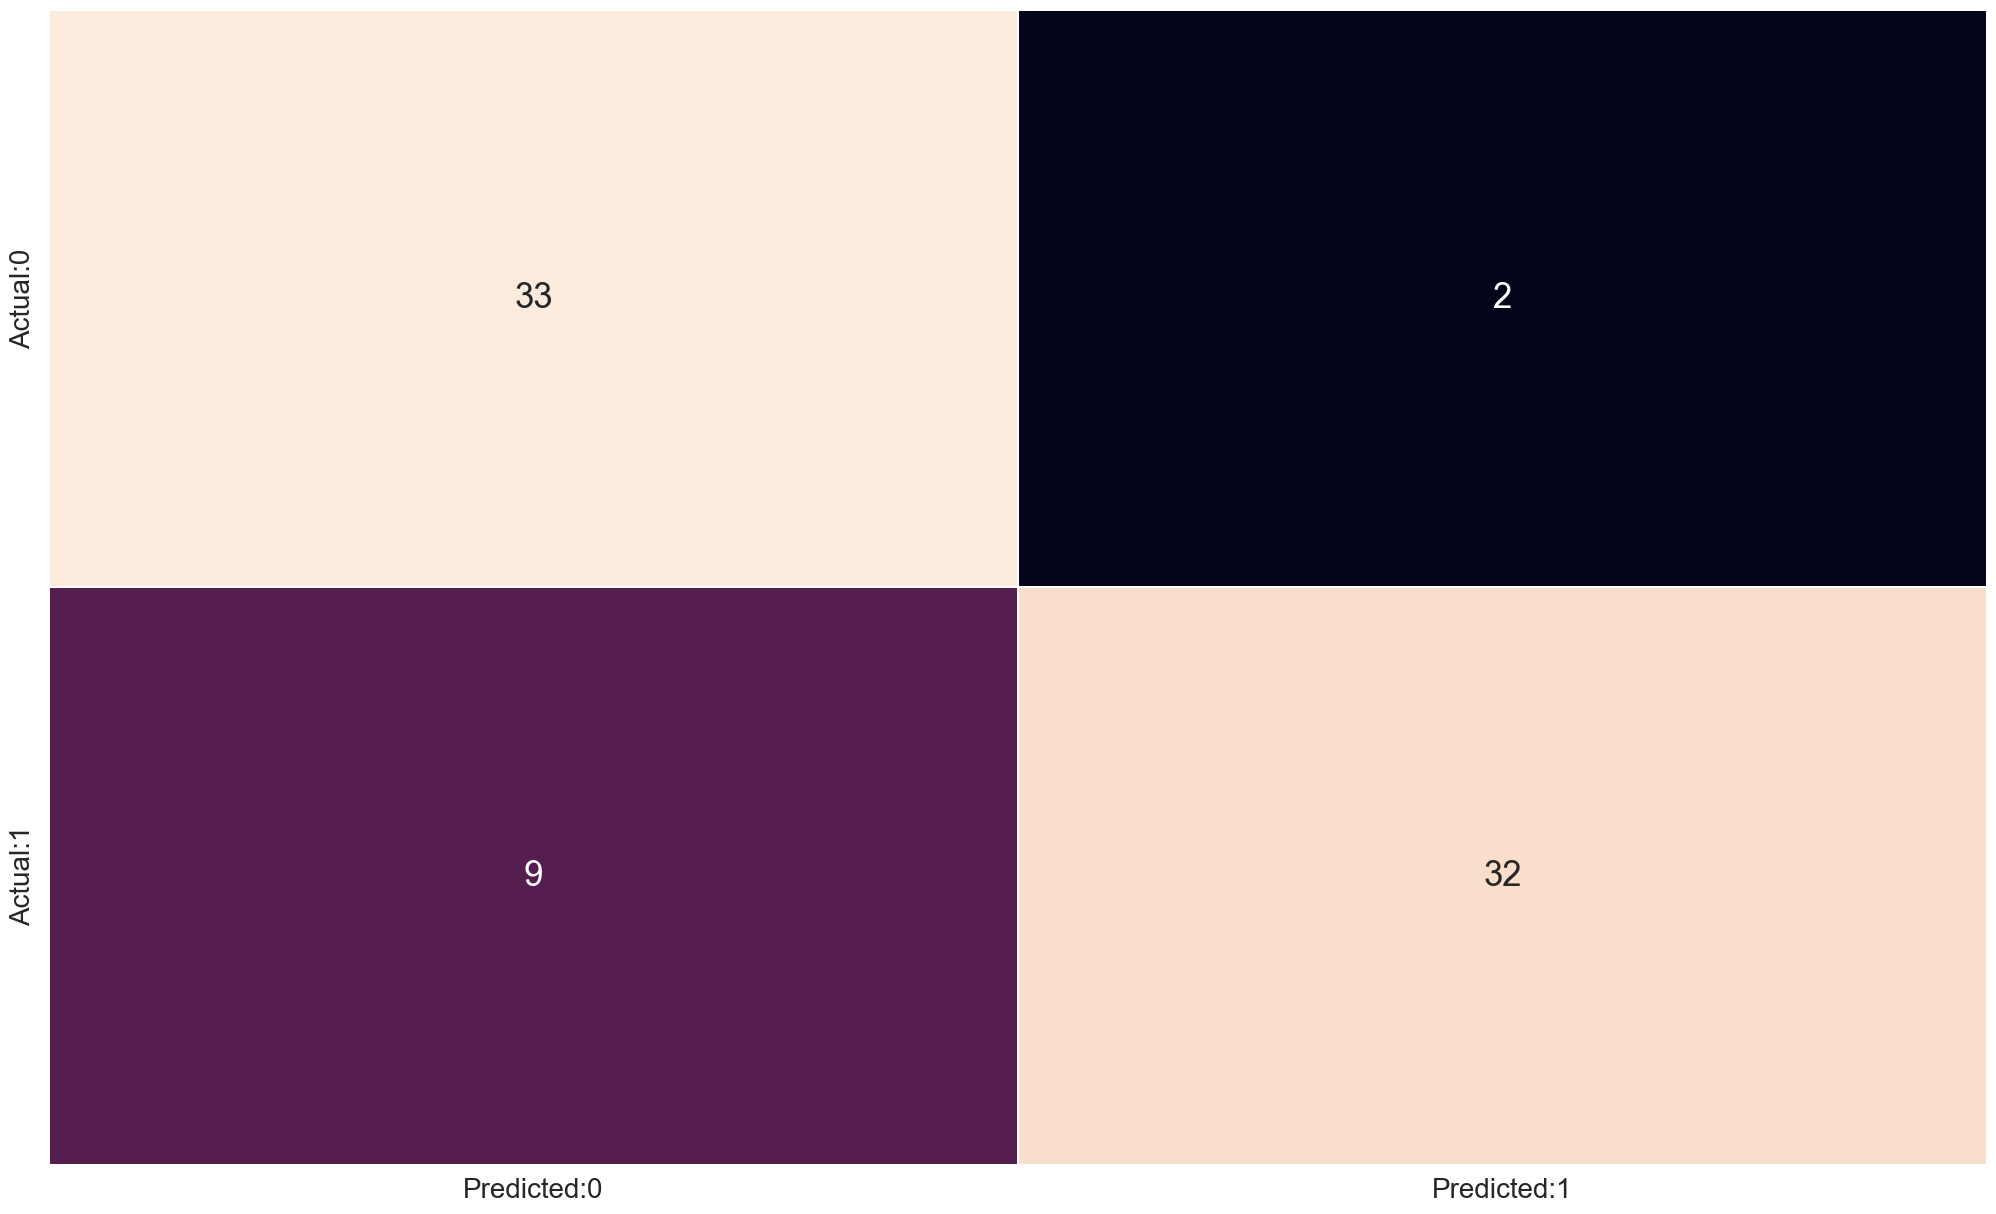

In [56]:
cm=confusion_matrix(Y_test, prediction)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd',  cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [57]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        35
           1       0.94      0.78      0.85        41

    accuracy                           0.86        76
   macro avg       0.86      0.86      0.86        76
weighted avg       0.87      0.86      0.86        76



In [58]:
kappa = cohen_kappa_score(Y_test,prediction)
print('Kappa value: ', kappa)

Kappa value:  0.7129120879120879


**Interpretation:** As the kappa score for the full model (with cut-off probability 0.5) is 0.6308, we can say that there is substantial agreement between the actual and predicted values.

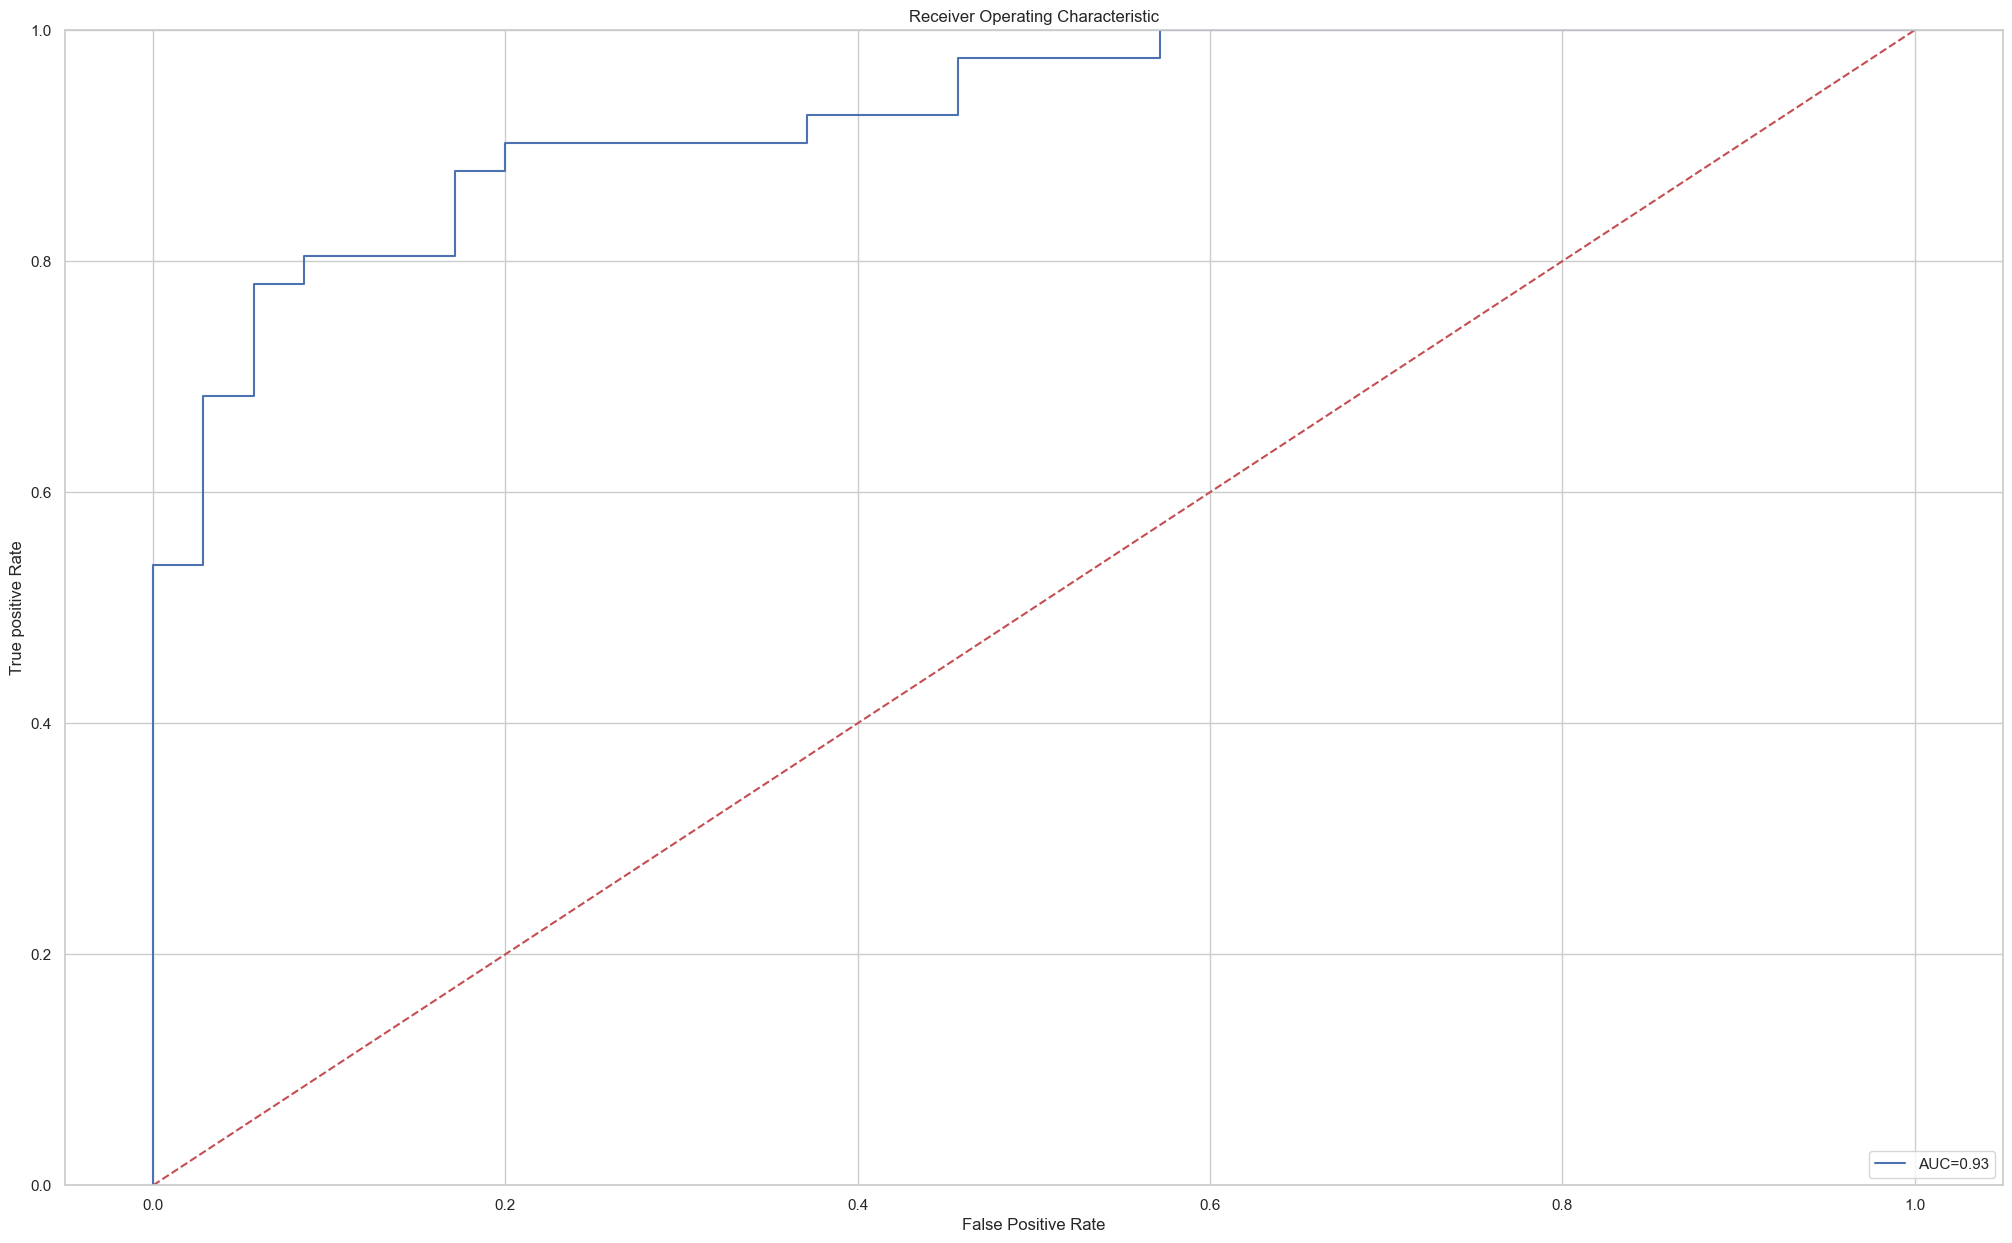

In [59]:

fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred)
roc_auc = metrics.auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC=%0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

From the above plot, we can see that our classifier (logisitic regression) is away from the dotted line; with the AUC score is 0.93

In [60]:
x1=X.drop(['age','chol','fbs','restecg','trestbps','slope'],axis=1)
y=Y

In [61]:
x1_train, x1_test, y1_train, y1_test  = train_test_split(x1, y, test_size=0.25, stratify =y, random_state=2)

In [75]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model

final_model = sm.Logit(y1_train, x1_train).fit()

# print the summary of the model
print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.358823
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.4791
Time:                        12:36:34   Log-Likelihood:                -81.453
converged:                       True   LL-Null:                       -156.37
Covariance Type:            nonrobust   LLR p-value:                 4.391e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6147      1.849      0.332      0.740      -3.010       4.239
sex           -1.5005      0.

In [78]:
final_model.deviance

AttributeError: 'LogitResults' object has no attribute 'deviance'

In [63]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(final_model.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,1.849121
sex,0.223023
cp,2.277366
thalach,1.024443
exang,0.321035
oldpeak,0.541002
ca,0.391816
thal,0.358536


In [64]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(final_model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = final_model.predict(x1_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y1_test, y_pred),
                                    'Precision Score': metrics.precision_score(y1_test, y_pred),
                                    'Recall Score': metrics.recall_score(y1_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y1_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y1_test, y_pred),
                                    'f1-score': metrics.f1_score(y1_test, y_pred)}, 
                                    ignore_index = True)

In [65]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(final_model, value)

In [66]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])


Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.736934,0.711538,0.902439,0.750000,0.485021,0.795699
1,0.200000,0.808362,0.787234,0.902439,0.815789,0.624559,0.840909
2,0.300000,0.798258,0.795455,0.853659,0.802632,0.600281,0.823529
3,0.400000,0.841115,0.853659,0.853659,0.842105,0.682230,0.853659
4,0.500000,0.833101,0.888889,0.780488,0.828947,0.659310,0.831169
5,0.600000,0.847387,0.914286,0.780488,0.842105,0.686167,0.842105
6,0.700000,0.812892,0.933333,0.682927,0.802632,0.611717,0.788732
7,0.800000,0.729617,0.952381,0.487805,0.710526,0.440803,0.645161
8,0.900000,0.607666,0.909091,0.243902,0.578947,0.202623,0.384615


In [67]:
y_pred = final_model.predict(x1_test)
prediction=[0 if i<0.6 else 1 for i in y_pred]

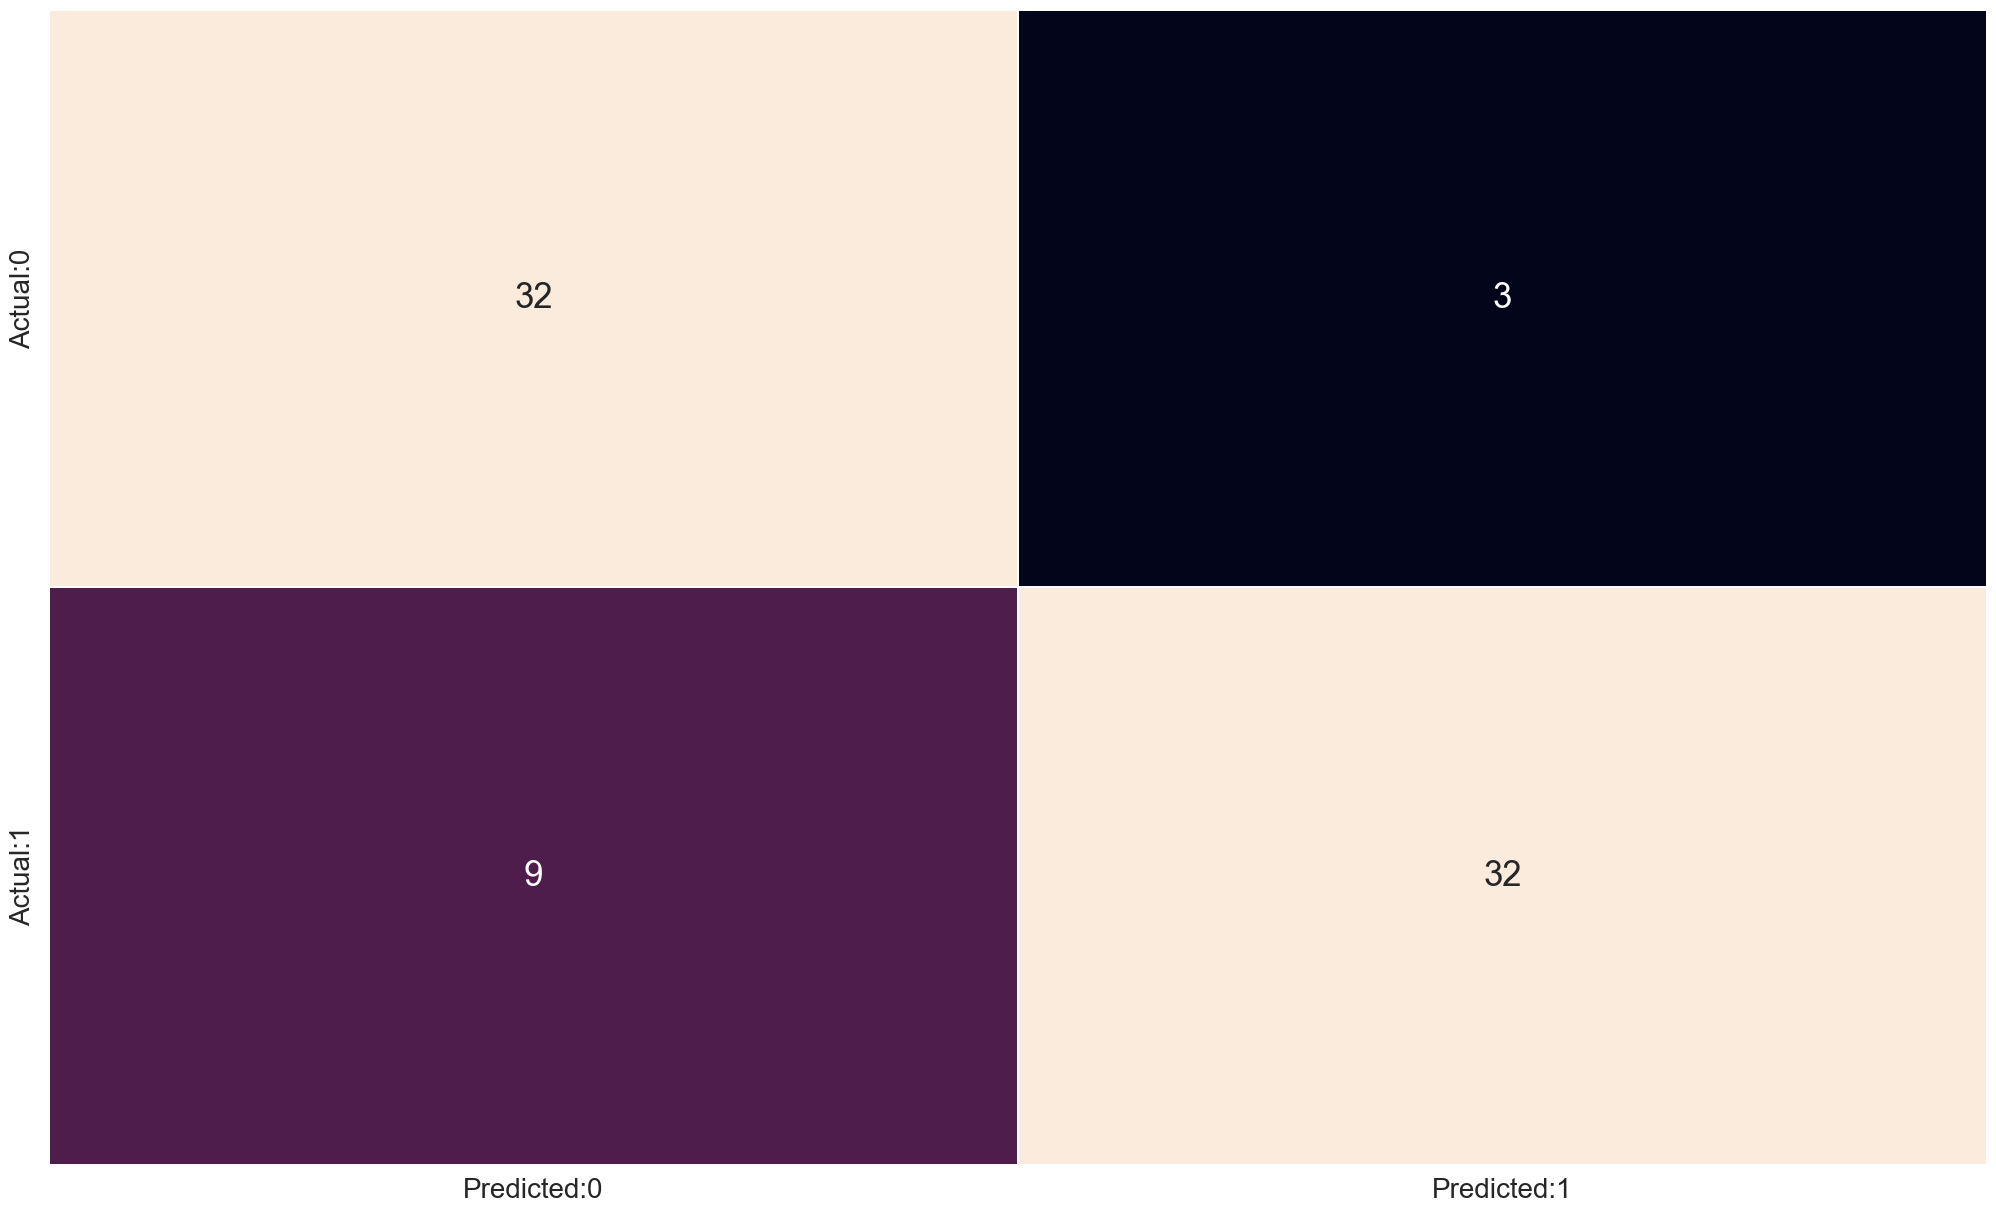

In [68]:
cm=confusion_matrix(y1_test, prediction)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd',  cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# display the plot
plt.show()

In [69]:
kappa = cohen_kappa_score(y1_test,prediction)
print('Kappa value: ', kappa)

Kappa value:  0.686166551961459


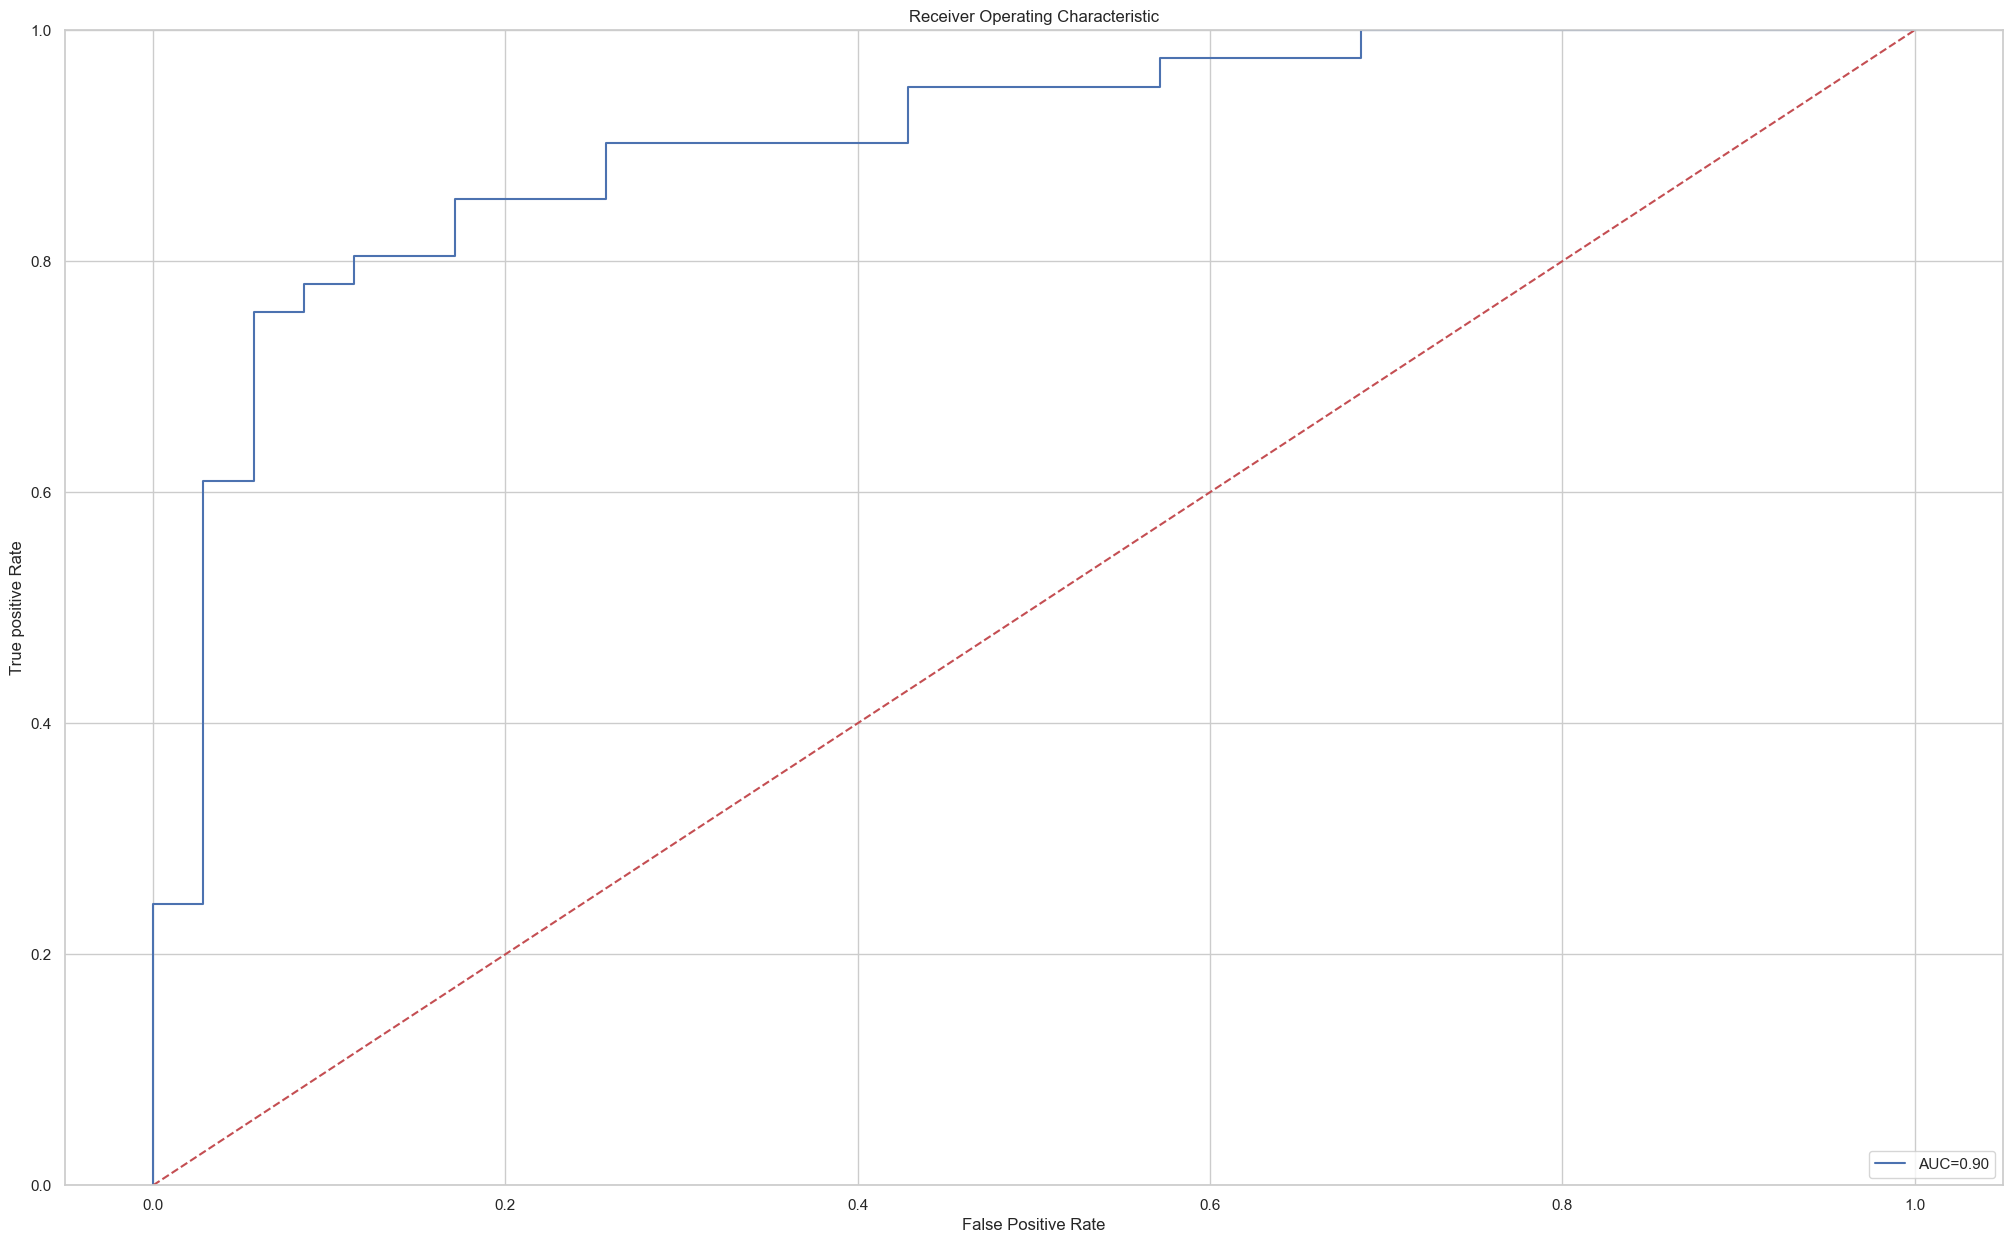

In [70]:
probs = final_model.predict(x1_test)
fpr, tpr, threshold = metrics.roc_curve(y1_test, probs)
roc_auc = metrics.auc(fpr,tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC=%0.2f' % roc_auc)
plt.legend(loc= 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([0,1])
plt.ylabel('True positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
y_pred = final_model.predict(x1_test)
prediction=[0 if i<0.5 else 1 for i in y_pred]

In [72]:
print(classification_report(y1_test, prediction))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        35
           1       0.89      0.78      0.83        41

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



Building a Predictive System

In [73]:
 
input_data = ( 1,1,0,158,0,0,0,3)

#Change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy array as we are predicting for only one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
y_pred = final_model.predict(input_data_reshaped)

prediction=[0 if i<0.5 else 1 for i in y_pred]
print(prediction)
if (prediction[0]==0):
    print ('The person does not have a heart disease')
else:
    print('The person has a heart disease')


[0]
The person does not have a heart disease
